# ***PROJECT-B3TA***
## **notebook 02 | Pre-Processing and In Depth EDA**  

---

### 1. **Dataset Loading**

**Imports.**

In [1]:
import numpy as np
import pandas as pd
## Pandas has a depedency on NumPy so loads automatically but best practice to load full NumPy package
print(f"Numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.renderers.default = 'notebook'

# sklearn
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
print(f"skLearn version: {sk.__version__}")

# scipy
import scipy
from scipy.stats import norm

# statsmodels
import statsmodels.api as sm

# b3ta functions
import b3tafunc as b3


Numpy version: 1.24.3
pandas version: 2.1.4
skLearn version: 1.3.0
Numpy version: 1.24.3
pandas version: 2.1.4
skLearn version: 1.3.0


**Load main datasets.**

In [2]:
# full df
df = pd.read_csv("../data/b3ta_df_comp_1.csv")
df.head(3)

Unnamed: 0    artist_name        track_name     genre  year  duration_ms  \
0           0     Jason Mraz   I Won't Give Up  acoustic  2012       240166   
1           1     Jason Mraz  93 Million Miles  acoustic  2012       216387   
2           2  Joshua Hyslop  Do Not Let Me Go  acoustic  2012       158960   

     tempo  time_signature  key   mode  ...  popularity  liveness  \
0  133.406               3    4  Major  ...          68    0.1150   
1  140.182               4    3  Major  ...          50    0.0974   
2  139.832               4    3  Major  ...          57    0.0895   

   acousticness  speechiness  instrumentalness  energy  valence  danceability  \
0         0.694       0.0429          0.000000   0.303    0.139         0.483   
1         0.477       0.0258          0.000014   0.454    0.515         0.572   
2         0.338       0.0323          0.000050   0.234    0.145         0.409   

                 track_id sound_profile  
0  53QF56cjZA9RTuuMZDrSA6    no_profile  
1  1s8tP3jP4GZcyHDsjvw218    no_profile  
2  7BRCa8MPiyuvr2VU3O9W0F    no_profile  

[3 rows x 21 columns]

In [3]:
# samp20 df
df20 = pd.read_csv("../data/b3ta_df_samp20_comp_1.csv")
df20.head(3)

Unnamed: 0             artist_name         track_name      genre  year  \
0           0       The Academy Is...  Unexpected Places        emo  2007   
1           1  Eddy and the Backfires   Hot Rods On Main     german  2007   
2           2              David Myhr         Never Mine  power-pop  2012   

   duration_ms    tempo  time_signature  key   mode  ...  popularity  \
0       254773  125.024               4    1  Minor  ...          19   
1       137133   94.793               4    4  Major  ...          13   
2       235307  120.080               4    1  Major  ...           0   

   liveness  acousticness  speechiness  instrumentalness  energy  valence  \
0     0.320       0.00309       0.0538            0.0000   0.910    0.523   
1     0.205       0.75100       0.0450            0.0359   0.983    0.584   
2     0.280       0.08830       0.0271            0.0000   0.602    0.472   

   danceability                track_id sound_profile  
0         0.474  76XIfZlNduQtecnblkuTcE    no_profile  
1         0.606  2BEIA5BtJqXKBRi366NDkO    no_profile  
2         0.586  7AA6dtKdnro1Sf0XygKOdK    no_profile  

[3 rows x 21 columns]

In [4]:
# df
df.drop(columns="Unnamed: 0", inplace=True)
# df20
df20.drop(columns="Unnamed: 0", inplace=True)

In [5]:
# df
df.reset_index(inplace=True, drop=True)
# df20
df20.reset_index(inplace=True, drop=True)

In [6]:
df

artist_name                          track_name  \
0                   Jason Mraz                     I Won't Give Up   
1                   Jason Mraz                    93 Million Miles   
2                Joshua Hyslop                    Do Not Let Me Go   
3                 Boyce Avenue                            Fast Car   
4                 Andrew Belle                    Sky's Still Blue   
...                        ...                                 ...   
1160373  Red Hot Chili Peppers                     Californication   
1160374        Vampire Weekend                  California English   
1160375   A Tribe Called Quest      I Left My Wallet in El Segundo   
1160376           Tony Bennett  (I Left My Heart) In San Francisco   
1160377           Led Zeppelin      Going to California - Remaster   

                     genre  year  duration_ms    tempo  time_signature  key  \
0                 acoustic  2012       240166  133.406               3    4   
1                 acoustic  2012       216387  140.182               4    3   
2                 acoustic  2012       158960  139.832               4    3   
3                 acoustic  2012       304293  204.961               4   10   
4                 acoustic  2012       244320  171.864               4    6   
...                    ...   ...          ...      ...             ...  ...   
1160373   alternative rock  1999       329733   96.483               4    9   
1160374        baroque pop  2010       150240  164.464               4    0   
1160375  conscious hip hop  1990       246827   99.032               4    7   
1160376    adult standards  1962       170960  128.065               4    0   
1160377         album rock  1971       212161   78.044               4    2   

          mode  loudness  popularity  liveness  acousticness  speechiness  \
0        Major   -10.058          68    0.1150        0.6940       0.0429   
1        Major   -10.286          50    0.0974        0.4770       0.0258   
2        Major   -13.711          57    0.0895        0.3380       0.0323   
3        Major    -9.845          58    0.0797        0.8070       0.0363   
4        Minor    -5.419          54    0.1100        0.0726       0.0302   
...        ...       ...         ...       ...           ...          ...   
1160373  Minor    -2.788          84    0.1270        0.0021       0.0270   
1160374  Major    -8.334           0    0.3850        0.0827       0.3210   
1160375  Major    -6.481          49    0.0866        0.3830       0.2380   
1160376  Major   -17.583          60    0.1690        0.9550       0.0332   
1160377  Major   -15.913          71    0.0867        0.9430       0.0333   

         instrumentalness  energy  valence  danceability  \
0                0.000000   0.303    0.139         0.483   
1                0.000014   0.454    0.515         0.572   
2                0.000050   0.234    0.145         0.409   
3                0.000000   0.251    0.508         0.392   
4                0.019300   0.791    0.217         0.430   
...                   ...     ...      ...           ...   
1160373          0.001650   0.767    0.328         0.592   
1160374          0.000005   0.642    0.646         0.615   
1160375          0.000000   0.825    0.881         0.817   
1160376          0.000004   0.078    0.125         0.313   
1160377          0.045000   0.265    0.522         0.503   

                       track_id sound_profile  
0        53QF56cjZA9RTuuMZDrSA6    no_profile  
1        1s8tP3jP4GZcyHDsjvw218    no_profile  
2        7BRCa8MPiyuvr2VU3O9W0F    no_profile  
3        63wsZUhUZLlh1OsyrZq7sz    no_profile  
4        6nXIYClvJAfi6ujLiKqEq8    no_profile  
...                         ...           ...  
1160373  48UPSzbZjgc449aqz8bxox            la  
1160374  616yWUonrccM3bckt85yC5            la  
1160375  15Xdlu0QaiEy3YFTf4xpUA            la  
1160376  1bYItjcPRtxZs6Ir71O5RB            la  
1160377  70gbuMqwNBE2Y5rkQJE9By            la  

[11603

In [7]:
df20

artist_name               track_name              genre  \
0            The Academy Is...        Unexpected Places                emo   
1       Eddy and the Backfires         Hot Rods On Main             german   
2                   David Myhr               Never Mine          power-pop   
3              Anuradha Sriram  Naan Oru Pombala Rajini           pop-film   
4                Tom Rosenthal                P.A.S.T.A  singer-songwriter   
...                        ...                      ...                ...   
232819                  Burial                     Moth         electronic   
232820                Overmono                     Is U            electro   
232821                Overmono                 So U Kno            electro   
232822                Overmono                      Bby         electronic   
232823                Overmono                     Gunk         electronic   

        year  duration_ms    tempo  time_signature  key   mode  loudness  \
0       2007       254773  125.024               4    1  Minor    -3.818   
1       2007       137133   94.793               4    4  Major    -4.612   
2       2012       235307  120.080               4    1  Major    -5.246   
3       2000       316000   85.217               4   10  Minor    -5.547   
4       2017       134485   99.295               4    5  Major   -10.861   
...      ...          ...      ...             ...  ...    ...       ...   
232819  2022       560681  117.458               4    6  Minor   -13.917   
232820  2023       228514  131.039               4    5  Minor    -5.335   
232821  2021       343506  129.980               4    0  Major    -8.357   
232822  2021       343342  130.009               4    2  Major    -8.792   
232823  2022       314185  129.023               4    6  Minor    -6.539   

        popularity  liveness  acousticness  speechiness  instrumentalness  \
0               19    0.3200       0.00309       0.0538          0.000000   
1               13    0.2050       0.75100       0.0450          0.035900   
2                0    0.2800       0.08830       0.0271          0.000000   
3                1    0.7290       0.46600       0.4400          0.000143   
4               25    0.0890       0.95800       0.0322          0.000009   
...            ...       ...           ...          ...               ...   
232819          42    0.1180       0.68100       0.2400          0.850000   
232820          57    0.1150       0.02320       0.0416          0.409000   
232821          51    0.0398       0.10000       0.0482          0.213000   
232822          46    0.0697       0.03270       0.0432          0.867000   
232823          45    0.1210       0.02610       0.0526          0.348000   

        energy  valence  danceability                track_id sound_profile  
0        0.910   0.5230         0.474  76XIfZlNduQtecnblkuTcE    no_profile  
1        0.983   0.5840         0.606  2BEIA5BtJqXKBRi366NDkO    no_profile  
2        0.602   0.4720         0.586  7AA6dtKdnro1Sf0XygKOdK    no_profile  
3        0.741   0.7870         0.612  0JHLSiDskwpffNaZeGQtQ5    no_profile  
4        0.159   0.3230         0.483  3RizmvN7BSmiLy19bTWmzF    no_profile  
...        ...      ...           ...                     ...           ...  
232819   0.607   0.4740         0.915  6zil6cE61Yo8fKkw9yxpz5        london  
232820   0.746   0.3970         0.719  4Z3RGx7Be5plLoIw7i83wX        london  
232821   0.605   0.5590         0.820  2oduSSwaKsqkOJssJo9Gxd        london  
232822   0.601   0.0944         0.561  7kAJWULoQUsWiiTJp2951Y        london  
232823   0.941   0.7630         0.751  4Nv1liSp522fuF1AGu6Yxs        london  

[232824 rows x 20 columns]

In [8]:
# Checks - df
df.isna().sum()

artist_name         0
track_name          0
genre               0
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
sound_profile       0
dtype: int64

In [9]:
# Checks - df
df20.isna().sum()

artist_name         0
track_name          0
genre               0
year                0
duration_ms         0
tempo               0
time_signature      0
key                 0
mode                0
loudness            0
popularity          0
liveness            0
acousticness        0
speechiness         0
instrumentalness    0
energy              0
valence             0
danceability        0
track_id            0
sound_profile       0
dtype: int64

In [10]:
df.shape

(1160378, 20)

In [11]:
df20.shape

(232824, 20)

**Load soundprofile indexes.**
- lon_snd_index (60 tracks)
- man_snd_index (50 tracks)
- bza_snd_index (432 tracks)
- ber_snd_index (200 tracks)
- kng_snd_index (76 tracks)
- nyc_snd_index (50 tracks)
- la_snd_index (66 tracks)
- comb_snd_index (934 tracks)

- lon_snd_index_samp (60 tracks)
- man_snd_index_samp (50 tracks)
- bza_snd_index_samp (432 tracks)
- ber_snd_index_samp (200 tracks)
- kng_snd_index_samp (76 tracks)
- nyc_snd_index_samp (50 tracks)
- la_snd_index_samp (66 tracks)
- comb_snd_index_samp (934 tracks)

In [12]:
# full df
lon_snd_index_df = pd.read_csv("../data/b3ta_lon_snd_index.csv", index_col=0)
man_snd_index_df = pd.read_csv("../data/b3ta_man_snd_index.csv", index_col=0)
bza_snd_index_df = pd.read_csv("../data/b3ta_bza_snd_index.csv", index_col=0)
ber_snd_index_df = pd.read_csv("../data/b3ta_ber_snd_index.csv", index_col=0)
kng_snd_index_df = pd.read_csv("../data/b3ta_kng_snd_index.csv", index_col=0)
nyc_snd_index_df = pd.read_csv("../data/b3ta_nyc_snd_index.csv", index_col=0)
la_snd_index_df = pd.read_csv("../data/b3ta_la_snd_index.csv", index_col=0)
comb_snd_index_df = pd.read_csv("../data/b3ta_combined_snd_index.csv", index_col=0)
# samp20 df
lon_snd_index_samp_df = pd.read_csv("../data/b3ta_lon_snd_index_samp.csv", index_col=0)
man_snd_index_samp_df = pd.read_csv("../data/b3ta_man_snd_index_samp.csv", index_col=0)
bza_snd_index_samp_df = pd.read_csv("../data/b3ta_bza_snd_index_samp.csv", index_col=0)
ber_snd_index_samp_df = pd.read_csv("../data/b3ta_ber_snd_index_samp.csv", index_col=0)
kng_snd_index_samp_df = pd.read_csv("../data/b3ta_kng_snd_index_samp.csv", index_col=0)
nyc_snd_index_samp_df = pd.read_csv("../data/b3ta_nyc_snd_index_samp.csv", index_col=0)
la_snd_index_samp_df = pd.read_csv("../data/b3ta_la_snd_index_samp.csv", index_col=0)
comb_snd_index_samp_df = pd.read_csv("../data/b3ta_combined_snd_index_samp.csv", index_col=0)

In [13]:
# create index lists

# full df
lon_snd_index = list(lon_snd_index_df['london'])
man_snd_index = list(man_snd_index_df['manchester'])
bza_snd_index = list(bza_snd_index_df['ibiza'])
ber_snd_index = list(ber_snd_index_df['berlin'])
kng_snd_index = list(kng_snd_index_df['kingston'])
nyc_snd_index = list(nyc_snd_index_df['nyc'])
la_snd_index = list(la_snd_index_df['la'])
comb_snd_index = list(comb_snd_index_df['combined_sp'])
# samp20 df
lon_snd_index_samp = list(lon_snd_index_samp_df['london'])
man_snd_index_samp = list(man_snd_index_samp_df['manchester'])
bza_snd_index_samp = list(bza_snd_index_samp_df['ibiza'])
ber_snd_index_samp = list(ber_snd_index_samp_df['berlin'])
kng_snd_index_samp = list(kng_snd_index_samp_df['kingston'])
nyc_snd_index_samp = list(nyc_snd_index_samp_df['nyc'])
la_snd_index_samp = list(la_snd_index_samp_df['la'])
comb_snd_index_samp = list(comb_snd_index_samp_df['combined_sp'])

In [14]:
comb_snd_index_df

combined_sp
0         623662
1         623880
2         752168
3         623900
4         752370
..           ...
929      1160374
930       214917
931      1160375
932      1160376
933      1160377

[934 rows x 1 columns]

In [15]:
comb_snd_index_samp_df

combined_sp
0         232781
1         232782
2         232783
3         232784
4         232785
..           ...
929       232776
930       232777
931       232778
932       232779
933       232780

[934 rows x 1 columns]

In [16]:
df20.loc[comb_snd_index_samp]

artist_name                          track_name  \
232781                  Blur                        Girls & Boys   
232782                  Blur                            Parklife   
232783                  Blur                           Good Song   
232784                  Blur                       Country House   
232785                  Blur                         Out of Time   
...                      ...                                 ...   
232776       Vampire Weekend                  California English   
232777                Weezer                     California Kids   
232778  A Tribe Called Quest      I Left My Wallet in El Segundo   
232779          Tony Bennett  (I Left My Heart) In San Francisco   
232780          Led Zeppelin      Going to California - Remaster   

                    genre  year  duration_ms    tempo  time_signature  key  \
232781           alt-rock  2000       259387  120.048               4    7   
232782           alt-rock  2000       187040  138.391               4    4   
232783           alt-rock  2003       187680  168.544               4    5   
232784           alt-rock  2000       237733  174.987               4    9   
232785           alt-rock  2003       233373  138.650               4    0   
...                   ...   ...          ...      ...             ...  ...   
232776        baroque pop  2010       150240  164.464               4    0   
232777   alternative rock  2016       205427  152.009               4    3   
232778  conscious hip hop  1990       246827   99.032               4    7   
232779    adult standards  1962       170960  128.065               4    0   
232780         album rock  1971       212161   78.044               4    2   

         mode  loudness  popularity  liveness  acousticness  speechiness  \
232781  Minor    -8.354          67    0.0601       0.00986       0.0315   
232782  Major    -6.905          55    0.3280       0.15400       0.0606   
232783  Major    -9.113          53    0.1880       0.21300       0.0286   
232784  Major    -6.660          51    0.0741       0.14700       0.0760   
232785  Major    -8.581          50    0.3640       0.04240       0.0275   
...       ...       ...         ...       ...           ...          ...   
232776  Major    -8.334           0    0.3850       0.08270       0.3210   
232777  Major    -5.927          42    0.5750       0.00351       0.1230   
232778  Major    -6.481          49    0.0866       0.38300       0.2380   
232779  Major   -17.583          60    0.1690       0.95500       0.0332   
232780  Major   -15.913          71    0.0867       0.94300       0.0333   

        instrumentalness  energy  valence  danceability  \
232781          0.000000   0.875    0.899         0.693   
232782          0.000000   0.877    0.749         0.632   
232783          0.538000   0.493    0.719         0.651   
232784          0.000000   0.895    0.677         0.341   
232785          0.003730   0.456    0.319         0.528   
...                  ...     ...      ...           ...   
232776          0.000005   0.642    0.646         0.615   
232777          0.000001   0.953    0.200         0.422   
232778          0.000000   0.825    0.881         0.817   
232779          0.000004   0.078    0.125         0.313   
232780          0.045000   0.265    0.522         0.503   

                      track_id sound_profile  
232781  5CeL9C3bsoe4yzYS1Qz8cw        london  
232782  3mqRLlD9j92BBv1ueFhJ1l        london  
232783  75WFyYrXPMAWyN6jOBB7IC        london  
232784  4vnYwFOZCVl0bmerWyuzRw        london  
232785  79PrPZu9zWyc1qwUwXchVl        london  
...                        ...           ...  
232776  616yWUonrccM3bckt85yC5            la  
232777  0UbS4oWIo2nUXeTxsvFaN1            la  
232778  15Xdlu0QaiEy3YFTf4xpUA            la  
232779  1bYItjcPRtxZs6Ir71O5RB            la  
232780  70gbuMqwNBE2Y5rkQJE9By            la  

[934 rows x 20 columns]

In [17]:
# Check correct length - full df
print(len(lon_snd_index))
print(len(man_snd_index))
print(len(bza_snd_index))
print(len(ber_snd_index))
print(len(kng_snd_index))
print(len(nyc_snd_index))
print(len(la_snd_index))
print(len(comb_snd_index))

60
50
432
200
76
50
66
934


In [18]:
# Check correct length - samp20 df
print(len(lon_snd_index_samp))
print(len(man_snd_index_samp))
print(len(bza_snd_index_samp))
print(len(ber_snd_index_samp))
print(len(kng_snd_index_samp))
print(len(nyc_snd_index_samp))
print(len(la_snd_index_samp))
print(len(comb_snd_index_samp))

60
50
432
200
76
50
66
934


**Create sound profile dfs**.

In [19]:
# full df
london_snd = df.loc[lon_snd_index]
manchester_snd = df.loc[man_snd_index]
ibiza_snd = df.loc[bza_snd_index]
berlin_snd = df.loc[ber_snd_index]
kingston_snd = df.loc[kng_snd_index]
nyc_snd = df.loc[nyc_snd_index]
la_snd = df.loc[la_snd_index]
combined_snd = df.loc[comb_snd_index]

In [20]:
# samp20 df
london_snd_samp = df20.loc[lon_snd_index_samp]
manchester_snd_samp = df20.loc[man_snd_index_samp]
ibiza_snd_samp = df20.loc[bza_snd_index_samp]
berlin_snd_samp = df20.loc[ber_snd_index_samp]
kingston_snd_samp = df20.loc[kng_snd_index_samp]
nyc_snd_samp = df20.loc[nyc_snd_index_samp]
la_snd_samp = df20.loc[la_snd_index_samp]
combined_snd_samp = df20.loc[comb_snd_index_samp]

In [21]:
# full df
print(len(london_snd))
print(len(manchester_snd))
print(len(ibiza_snd))
print(len(berlin_snd))
print(len(kingston_snd))
print(len(nyc_snd))
print(len(la_snd))
print(len(combined_snd))

60
50
432
200
76
50
66
934


In [22]:
# samp20 df
print(len(london_snd_samp))
print(len(manchester_snd_samp))
print(len(ibiza_snd_samp))
print(len(berlin_snd_samp))
print(len(kingston_snd_samp))
print(len(nyc_snd_samp))
print(len(la_snd_samp))
print(len(combined_snd_samp))

60
50
432
200
76
50
66
934


### *Data Summary*;

**Dataframes**
- df (1,160,378 tracks) - all tracks
- df20 (232,824 tracks) - 20% sample
- ==
- london_snd (60 tracks)
- manchester_snd (50 tracks)
- ibiza_snd (432 tracks)
- berlin_snd (200 tracks)
- kingston_snd (76 tracks)
- nyc_snd (50 tracks)
- la_snd (66 tracks)
- combined_snd (934 tracks)
- ==
- london_snd_samp (60 tracks)
- manchester_snd_samp (50 tracks)
- ibiza_snd_samp (432 tracks)
- berlin_snd_samp (200 tracks)
- kingston_snd_samp (76 tracks)
- nyc_snd_samp (50 tracks)
- la_snd_samp (66 tracks)
- combined_snd_samp (934 tracks)

**Main DF (df) Index lists for sound profiles**
- lon_snd_index
- man_snd_index
- bza_snd_index
- ber_snd_index
- kng_snd_index
- nyc_snd_index
- la_snd_index
- comb_snd_index

**Samp20 DF (df) Index lists for sound profiles**
- lon_snd_index_samp
- man_snd_index_samp
- bza_snd_index_samp
- ber_snd_index_samp
- kng_snd_index_samp
- nyc_snd_index_samp
- la_snd_index_samp
- comb_snd_index_samp

**Data dictionary update**:
(see below for details on columns marked for removal)
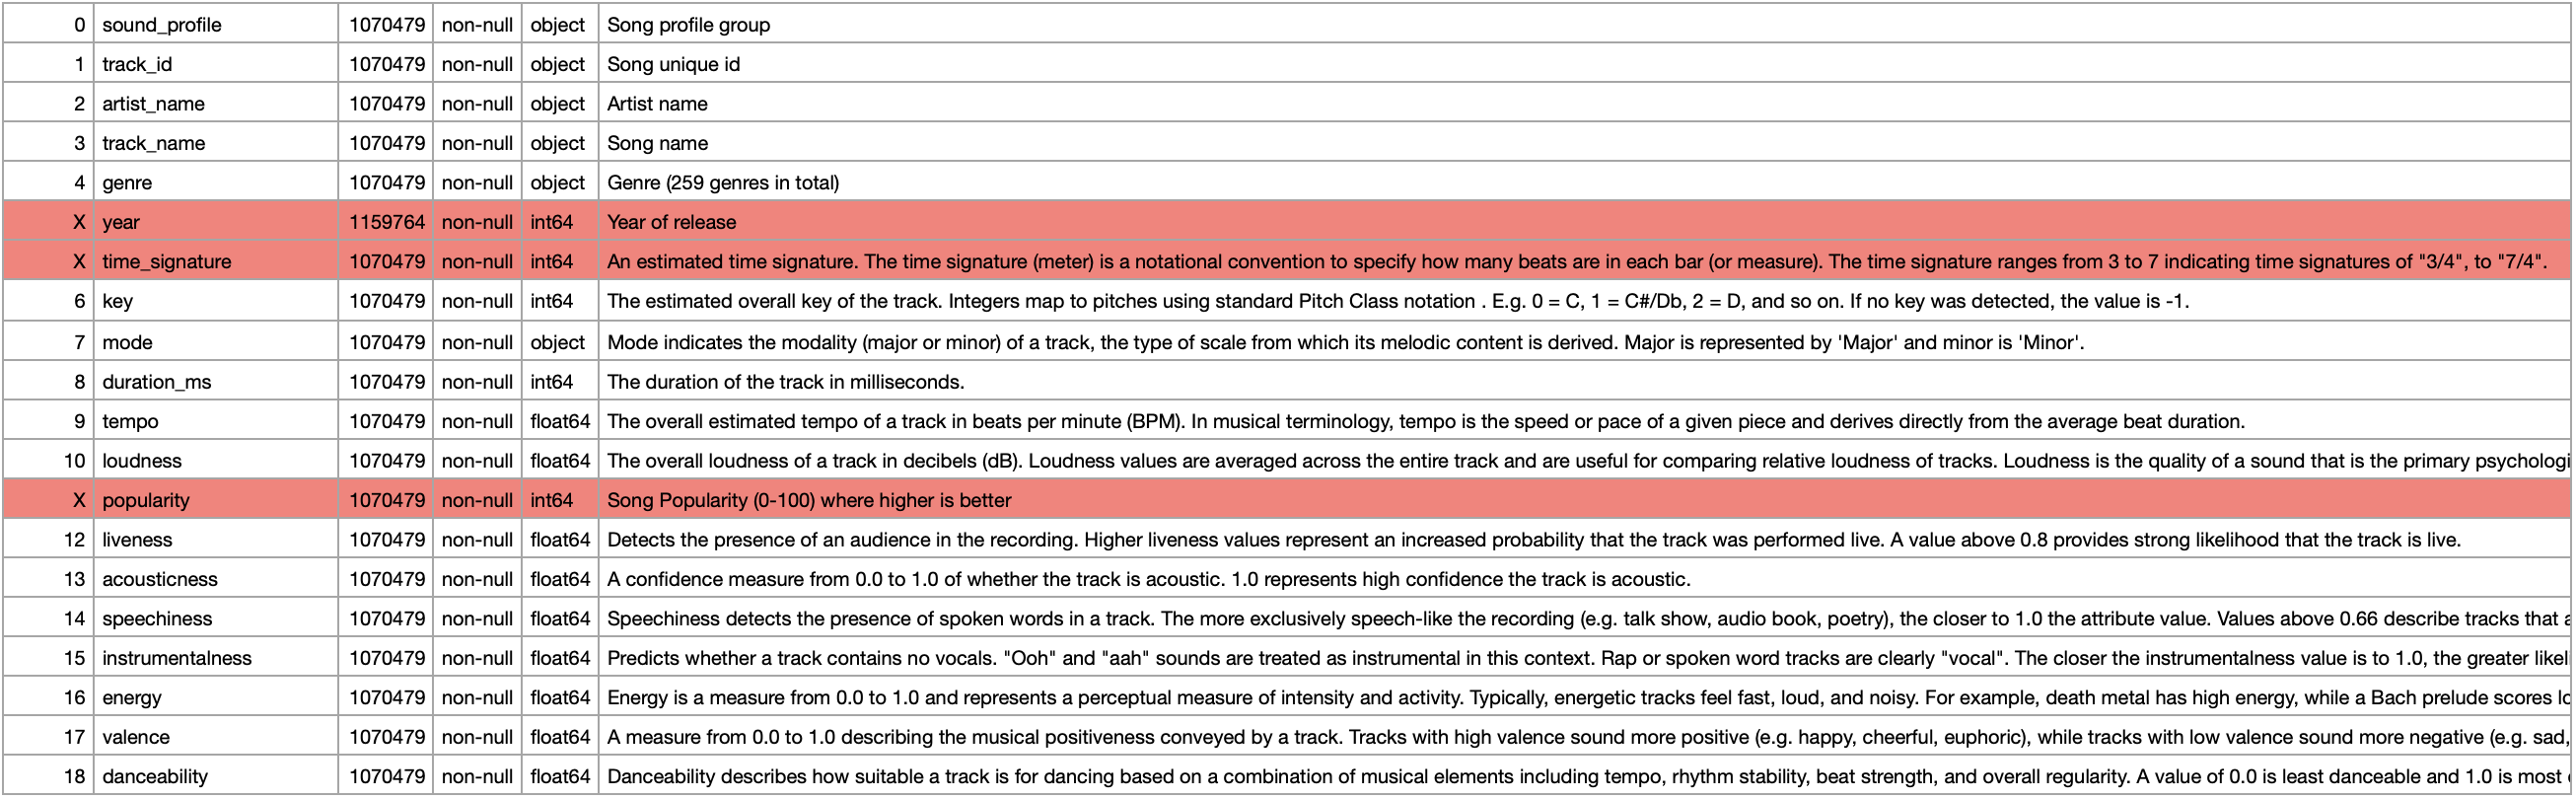

### 2. **Further Cleaning and EDA** (with the exception of pre-processing, from here on we proceed with the 20% sample dataset only)

#### Reorder columns, cols that won't be fed into the model at the front.

In [23]:
df20 = df20.reindex(columns=['sound_profile',
                         'track_id',
                         'artist_name',
                         'track_name',
                         'genre',
                         'year',
                         'time_signature',
                         'key',
                         'mode',
                         'duration_ms',
                         'tempo',
                         'loudness',
                         'popularity',
                         'energy',
                         'valence',
                         'danceability',
                         'speechiness',
                         'instrumentalness',
                         'acousticness',
                         'liveness'
                        ])

df20.head(1)

sound_profile                track_id        artist_name         track_name  \
0    no_profile  76XIfZlNduQtecnblkuTcE  The Academy Is...  Unexpected Places   

  genre  year  time_signature  key   mode  duration_ms    tempo  loudness  \
0   emo  2007               4    1  Minor       254773  125.024    -3.818   

   popularity  energy  valence  danceability  speechiness  instrumentalness  \
0          19    0.91    0.523         0.474       0.0538               0.0   

   acousticness  liveness  
0       0.00309      0.32

In [24]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232824 entries, 0 to 232823
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     232824 non-null  object 
 1   track_id          232824 non-null  object 
 2   artist_name       232824 non-null  object 
 3   track_name        232824 non-null  object 
 4   genre             232824 non-null  object 
 5   year              232824 non-null  int64  
 6   time_signature    232824 non-null  int64  
 7   key               232824 non-null  int64  
 8   mode              232824 non-null  object 
 9   duration_ms       232824 non-null  int64  
 10  tempo             232824 non-null  float64
 11  loudness          232824 non-null  float64
 12  popularity        232824 non-null  int64  
 13  energy            232824 non-null  float64
 14  valence           232824 non-null  float64
 15  danceability      232824 non-null  float64
 16  speechiness       23

#### Duration (ms) - removed irregular timelengths.
- As we saw during the initial EDA in 01-b3-loading-cleaning-initial-eda, there were some clear outliers that needed to be removed.
- 2.5 standard deviations above the mean is around the 10min mark. We dropped tracks above 10 mins and also tracks below 2 min in length. Minimal tracks were lost from our sound profiles as a result (3). (See code blocks below for tracks from our sound profiles to be dropped)

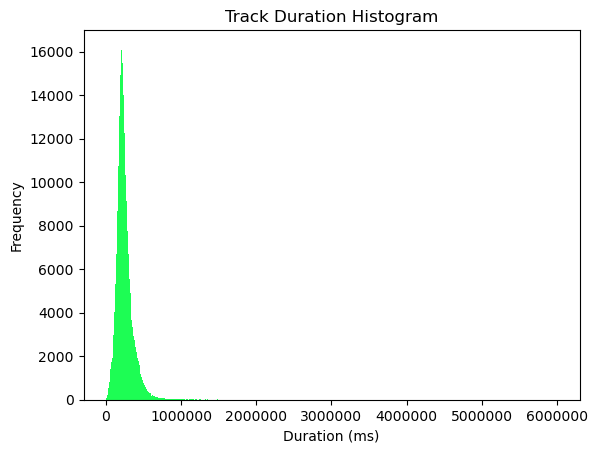

In [25]:
plt.hist(df20['duration_ms'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Track Duration Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

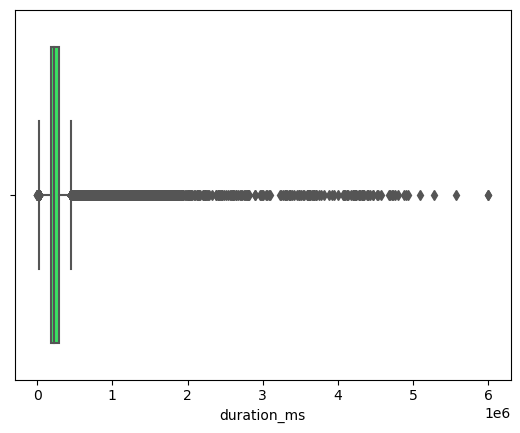

In [26]:
sns.boxplot(data=df20, x=df20['duration_ms'], color='#1DFD54');

In [27]:
b3.df_numstats(df20[['duration_ms']])

DURATION_MS
MEAN: 250300.25
MEDIAN: 226053.0
RANGE: 5996826
IQR: 106386.0
STANDARDDEVIATION: 148722.88
MAX: 6000461
MIN: 3635





In [28]:
# 2.5 std above the mean
250300.25 + (148722.88*2.5)

622107.45

**2.5 standard deviations above the mean is around the 10min mark, let's drop tracks above 10. Let's also drop tracks below 2 min in length. We'll lose minimal tracks from our sound profiles.** (See code blocks below for tracks from our sound profiles to be dropped)

//nb;
- 600000ms = 10mins
- 60000ms = 1min


In [29]:
combined_snd[combined_snd['duration_ms'] < 120000] # [1104389, 935647, 1160335, 328073]

artist_name       track_name                 genre  year  \
1104389     Sex Pistols           My Way             punk-rock  2010   
935647           Burial               UK                 dance  2007   
1160335  Connie Stevens  Sixteen Reasons  deep adult standards  2005   

         duration_ms    tempo  time_signature  key   mode  loudness  \
1104389        53213  166.990               4    0  Major    -4.601   
935647        100227  134.839               1   11  Minor   -14.582   
1160335       118133  109.783               3   10  Major    -8.955   

         popularity  liveness  acousticness  speechiness  instrumentalness  \
1104389          20    0.1550      0.000021       0.0471          0.969000   
935647           43    0.0953      0.965000       0.0381          0.939000   
1160335          41    0.1100      0.865000       0.0319          0.000011   

         energy  valence  danceability                track_id sound_profile  
1104389   0.917   0.6900         0.169  4a2bRijLuT8sr9uvDtLh88        london  
935647    0.250   0.0409         0.180  3HfdHW1mSYNOaBmQHVUHpg        london  
1160335   0.406   0.6190         0.339  0oI0ekrSQ3aHiHcMi1B2gK            la

In [30]:
combined_snd_samp[combined_snd_samp['duration_ms'] < 120000] # [232811, 200890, 232732, 232534]

artist_name       track_name                 genre  year  \
232811     Sex Pistols           My Way             punk-rock  2010   
200890          Burial               UK                 dance  2007   
232732  Connie Stevens  Sixteen Reasons  deep adult standards  2005   

        duration_ms    tempo  time_signature  key   mode  loudness  \
232811        53213  166.990               4    0  Major    -4.601   
200890       100227  134.839               1   11  Minor   -14.582   
232732       118133  109.783               3   10  Major    -8.955   

        popularity  liveness  acousticness  speechiness  instrumentalness  \
232811          20    0.1550      0.000021       0.0471          0.969000   
200890          43    0.0953      0.965000       0.0381          0.939000   
232732          41    0.1100      0.865000       0.0319          0.000011   

        energy  valence  danceability                track_id sound_profile  
232811   0.917   0.6900         0.169  4a2bRijLuT8sr9uvDtLh88        london  
200890   0.250   0.0409         0.180  3HfdHW1mSYNOaBmQHVUHpg        london  
232732   0.406   0.6190         0.339  0oI0ekrSQ3aHiHcMi1B2gK            la

In [31]:
combined_snd[combined_snd['duration_ms'] > 600000] # [328073]

artist_name              track_name    genre  year  duration_ms  \
328073         NTO  Trauma - Worakls Remix  electro  2018       600122   

          tempo  time_signature  key   mode  loudness  popularity  liveness  \
328073  128.006               4    2  Minor   -10.484          54    0.0863   

        acousticness  speechiness  instrumentalness  energy  valence  \
328073         0.564       0.0409              0.93   0.484    0.136   

        danceability                track_id sound_profile  
328073         0.799  1uXUZfJykefWuwj9VtyxIq        berlin

In [32]:
combined_snd_samp[combined_snd_samp['duration_ms'] > 600000] # [232534]

artist_name              track_name            genre  year  \
232534         NTO  Trauma - Worakls Remix  deep euro house  2018   

        duration_ms    tempo  time_signature  key   mode  loudness  \
232534       600122  128.006               4    2  Minor   -10.484   

        popularity  liveness  acousticness  speechiness  instrumentalness  \
232534          55    0.0863         0.564       0.0409              0.93   

        energy  valence  danceability                track_id sound_profile  
232534   0.484    0.136         0.799  1uXUZfJykefWuwj9VtyxIq        berlin

In [33]:
twomin_lowfilt = df20['duration_ms'] < 120000
tenmin_highfilt = df20['duration_ms'] > 600000

In [34]:
df20[twomin_lowfilt].shape

(14658, 20)

In [35]:
df20[tenmin_highfilt].shape

(3210, 20)

In [36]:
df20.shape

(232824, 20)

In [37]:
# Get index of short tracks to drop
twominfilt_drop_index = df20[twomin_lowfilt].index

# Drop short tracks
df20.drop(index=twominfilt_drop_index, inplace=True)
df20.shape

(218166, 20)

In [38]:
# Check correct no. dropped
232824-218166

14658

In [39]:
# Get index of long tracks to drop
tenminfilt_drop_index = df20[tenmin_highfilt].index

# Drop long tracks
df20.drop(index=tenminfilt_drop_index, inplace=True)
df20.shape

/var/folders/p8/pddtg5cd5pxb9gdb791sg3nm0000gp/T/ipykernel_22749/3957287573.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(214956, 20)

In [40]:
# Check correct no. dropped
218166-214956

3210

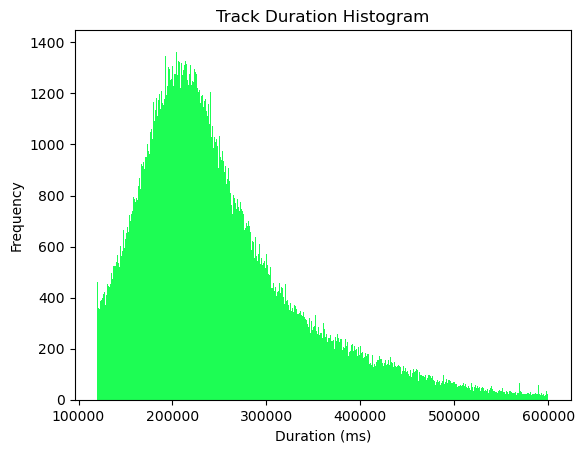

In [41]:
plt.hist(df20['duration_ms'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Track Duration Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

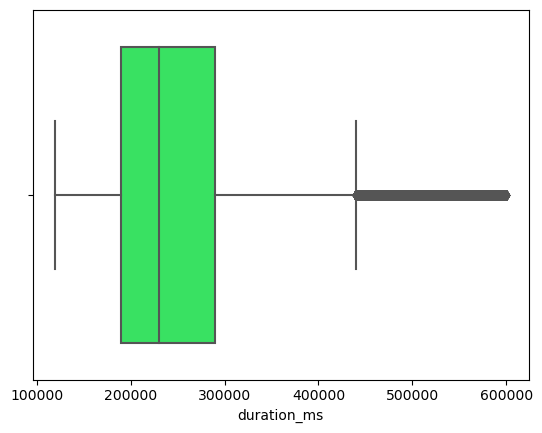

In [42]:
sns.boxplot(data=df20, x=df20['duration_ms'], color='#1DFD54');

In [43]:
b3.df_numstats(df20[['duration_ms']])

DURATION_MS
MEAN: 250649.35
MEDIAN: 230571.0
RANGE: 480000
IQR: 99942.0
STANDARDDEVIATION: 87273.87
MAX: 600000
MIN: 120000





#### Genres - re-mapped and reduced down.
- Here we have 259 genres in total, this is a huge number. First we'll manually remap to a more realistic selection before one hot encoding during preprocessing. Whilst this may be time-consuming to do manually, this is an important task given the close relationship genre has to location.
- Here we're able to reduce columns down to a total of 61.

In [44]:
df20['genre'].value_counts()

genre
alt-rock              4238
gospel                4056
acoustic              3959
black-metal           3886
k-pop                 3850
                      ... 
deep soul house          1
bristol electronic       1
finnish edm              1
swedish electronic       1
british invasion         1
Name: count, Length: 259, dtype: int64

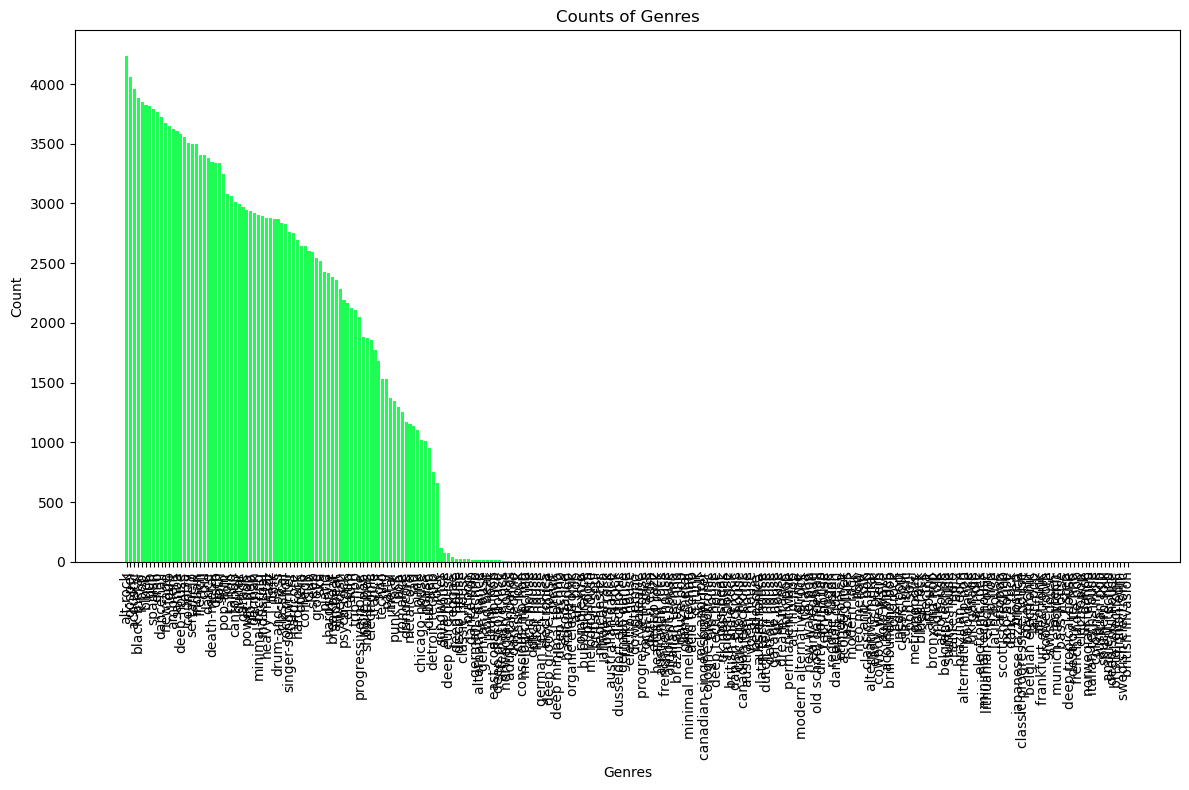

In [45]:
genre_counts = df20['genre'].value_counts()

# Convert NumPy array to dictionary
genre_counts = dict(genre_counts)

# Create lists for genre labels and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='#1DFD54')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Counts of Genres')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [46]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df20['genre'].value_counts())

genre
alt-rock                      4238
gospel                        4056
acoustic                      3959
black-metal                   3886
k-pop                         3850
blues                         3824
dub                           3820
spanish                       3789
emo                           3769
dancehall                     3728
new-age                       3672
forro                         3649
ambient                       3623
samba                         3611
deep-house                    3578
salsa                         3559
country                       3504
sertanejo                     3494
indian                        3494
french                        3410
chill                         3406
dance                         3378
death-metal                   3350
disco                         3343
goth                          3342
pop-film                      3247
folk                          3078
tango                         3062
cantopop      

In [47]:
# Manual genre mapping
df20['genre_map_v1'] = df20['genre'].map({
    'alt-rock' : 'alt-rock',
    'gospel' : 'gospel',
    'acoustic' : 'acoustic',
    'black-metal' : 'black-metal',
    'k-pop' : 'k-pop',
    'blues' : 'blues',
    'dub' : 'dub',
    'spanish' : 'spanish',
    'emo' : 'emo',
    'dancehall' : 'dancehall',
    'new-age' : 'new-age',
    'forro' : 'forro',
    'ambient' : 'ambient',
    'samba' : 'samba',
    'deep-house' : 'deep-house',
    'salsa' : 'salsa',
    'country' : 'country',
    'sertanejo' : 'sertanejo',
    'indian' : 'indian',
    'french' : 'french',
    'chill' : 'downtempo',
    'dance' : 'dance',
    'death-metal' : 'metal',
    'disco' : 'disco',
    'goth' : 'goth',
    'pop-film' : 'pop',
    'folk' : 'folk',
    'tango' : 'tango',
    'cantopop' : 'cantopop',
    'guitar' : 'guitar',
    'garage' : 'garage',
    'power-pop' : 'pop',
    'hip-hop' : 'hip-hop',
    'german' : 'german',
    'minimal-techno' : 'minimal-techno',
    'industrial' : 'industrial',
    'heavy-metal' : 'metal',
    'jazz' : 'jazz',
    'funk' : 'funk&soul',
    'drum-and-bass' : 'drum-and-bass',
    'classical' : 'classical',
    'rock-n-roll' : 'rock',
    'singer-songwriter' : 'singer-songwriter', 
    'hardcore' : 'hardcore',
    'hard-rock' : 'metal',
    'opera' : 'classical',
    'comedy' : 'other',
    'club' : 'dance',
    'sleep' : 'other',
    'groove' : 'dance',
    'ska' : 'reggae&ska',
    'piano' : 'piano',
    'hardstyle' : 'hardcore',
    'breakbeat' : 'breakbeat',
    'afrobeat' : 'afrobeat',
    'swedish' : 'swedish',
    'psych-rock' : 'rock',
    'electro' : 'electro',
    'edm' : 'edm',
    'trip-hop' : 'trip-hop',
    'progressive-house' : 'progressive-house',
    'indie-pop' : 'indie',
    'show-tunes' : 'other',
    'electronic' : 'electronic',
    'trance' : 'trance',
    'soul' : 'funk&soul',
    'techno' : 'techno',
    'party' : 'party',
    'metal' : 'metal',
    'punk-rock' : 'punk',
    'pop' : 'pop',
    'romance' : 'other',
    'grindcore' : 'metal',
    'metalcore' : 'metal',
    'sad' : 'other',
    'punk' : 'punk',
    'chicago-house' : 'house',
    'house' : 'house',
    'dubstep' : 'dubstep',
    'detroit-techno' : 'techno',
    'rock' : 'rock',
    'songwriter' : 'singer-songwriter',
    'diva house' : 'house',
    'deep euro house' : 'house',
    'reggae' : 'reggae&ska',    
    'deep house' : 'deep-house',
    'disco house' : 'house',
    'classic house' : 'house',
    'britpop' : 'indie',
    'dance pop' : 'pop',
    'german techno' : 'techno',
    'alternative dance' : 'dance',
    'german house' : 'house',
    'big beat' : 'trip-hop',
    'album rock' : 'rock',
    'east coast hip hop' : 'hip-hop',
    'deep disco house' : 'house',
    'alternative rock' : 'alt-rock',
    'norwegian house' : 'house',
    'adult standards' : 'other',
    'dark techno' : 'techno',
    'classic rock' : 'rock',
    'conscious hip hop' : 'hip-hop',
    'melodic techno' : 'techno',
    'acid house' : 'house',
    'dutch house' : 'house',
    'filter house' : 'house',
    'german tech house' : 'tech-house',
    'electronica' : 'electronic',
    'deep groove house' : 'house',
    'circuit' : 'other',
    'deep minimal techno' : 'techno',
    'deep techno' : 'techno',
    'eurodance' : 'dance',
    'baroque pop' : 'pop',
    'organic electronic' : 'electronic',
    'art pop' : 'pop',
    'complextro' : 'other',
    'bubble trance' : 'trance',
    'big room' : 'edm',
    'melodic house' : 'house',
    'british soul' : 'funk&soul',
    'madchester' : 'house',
    'jamaican ska' : 'reggae&ska',
    'lovers rock' : 'rock',
    'australian dance' : 'dance',
    'irish rock' : 'rock',
    'dusseldorf electronic' : 'electronic',
    'german dance' : 'dance',
    'funky house' : 'house',    
    'electro house' : 'electro',
    'downtempo' : 'downtempo',
    'balearic' : 'house',
    'progressive house' : 'progressive-house',
    'vocal trance' : 'trance',
    'dutch edm' : 'edm',
    'electro jazz' : 'jazz',
    'heartland rock' : 'rock',
    'australian rock' : 'rock',
    'french tech house' : 'tech-house',
    'ambient house' : 'house',
    'italian techno' : 'techno',
    'brazilian techno' : 'techno',
    'gauze pop' : 'pop',
    'glam metal' : 'metal',   
    'minimal melodic techno' : 'techno',    
    'acid techno' : 'techno',
    'g funk' : 'funk&soul',
    'rock-and-roll' : 'rock',
    'canadian singer-songwriter' : 'singer-songwriter',
    'cologne electronic' : 'electronic',
    'hip house' : 'house',    
    'deep tech house' : 'tech-house',
    'bossbeat' : 'other',
    'uk post-punk' : 'indie',    
    'fidget house' : 'house',
    'british indie rock' : 'indie',
    'danish electronic' : 'electronic',
    'chicago house' : 'house',
    'canadian electronic' : 'electronic',
    'australian house' : 'house',
    'vocal house' : 'house',    
    'beatlesque' : 'rock',
    'aussietronica' : 'electronic',
    'latin tech house' : 'tech-house',
    'dutch tech house' : 'tech-house',
    'detroit house' : 'house',
    'garage house' : 'house',
    'uk house' : 'house',
    'dream trance' : 'trance',
    'folk-pop' : 'pop',  
    'permanent wave' : 'other',
    'atl hip hop' : 'hip-hop',   
    'grime' : 'hip-hop',
    'modern alternative rock' : 'rock',
    'funana' : 'other',
    'new wave pop' : 'pop',    
    'early reggae' : 'reggae&ska',
    'old school dancehall' : 'dancehall',
    'dirty south rap' : 'hip-hop',
    'tech house' : 'tech-house',
    'uk reggae' : 'reggae&ska',
    'reggae fusion' : 'reggae&ska',
    'dancehall queen' : 'dancehall',
    'ethnotronica' : 'other',
    'acoustic rock' : 'rock',    
    'jazz blues' : 'blues',
    'modern rock' : 'rock',
    'r&b' : 'funk&soul',
    'neo mellow' : 'other',
    'anti-folk' : 'other',
    'classic uk pop' : 'pop',
    'alternative metal' : 'metal',
    'early us punk' : 'punk',
    'cowboy western' : 'other',
    'solo wave' : 'other',
    'acoustic blues' : 'blues',
    'brill building pop' : 'pop',    
    'folk rock' : 'rock',
    'nederpop' : 'pop',
    'classic soul' : 'funk&soul',
    'surf music' : 'rock',    
    'pop soul' : 'funk&soul',
    'metropopolis' : 'pop',
    'pop rock' : 'pop',
    'blues rock' : 'rock',
    'electra' : 'electronic',
    'art punk' : 'punk',
    'bronx hip hop' : 'hip-hop',
    'indie folk' : 'indie',
    'afro house' : 'house',
    'belgian techno' : 'techno',
    'stutter house' : 'house',
    'nantes indie' : 'indie',
    'alt z' : 'other',
    'brazilian edm' : 'edm',
    'alternative hip hop' : 'hip-hop',
    'pop dance' : 'pop',
    'uk garage' : 'garage',    
    'la indie' : 'indie',
    'electronic rock' : 'rock',
    'minimal tech house' : 'tech-house',
    'lithuanian electronic' : 'electronic',    
    'trip hop' : 'trip-hop',
    'latin house' : 'house',
    'afropop' : 'afrobeat',
    'scottish techno' : 'techno',    
    'pop house' : 'pop',
    'dance rock' : 'rock',
    'brostep' : 'dubstep',
    'japanese jazztronica' : 'other',
    'classic progressive house' : 'progressive-house',   
    'coverchill' : 'other',
    'belgian electronic' : 'electronic',
    'latin pop' : 'pop',
    'afro-funk' : 'funk&soul',
    'frankfurt electronic' : 'electronic',
    'groove room' : 'other',    
    'swiss house' : 'house',
    'psytech' : 'other',
    'munich electronic' : 'electronic',
    'bass house' : 'house',    
    '2-step' : 'garage',
    'deep tropical house' : 'deep-house',
    'destroy techno' : 'techno',
    'french indie pop' : 'pop',
    'electropop' : 'electro',
    'uk dance' : 'dance',
    'norwegian techno' : 'techno',
    'italian tech house' : 'tech-house',
    'cologne indie' : 'indie',
    'austrian pop' : 'pop',
    'southern soul' : 'funk&soul',
    'ambient techno' : 'techno',   
    'deep soul house' : 'house',
    'bristol electronic' : 'electronic',
    'finnish edm' : 'edm',
    'swedish electronic' : 'electronic',
    'british invasion' : 'rock'
})


In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df20['genre_map_v1'].value_counts())

genre_map_v1
metal                12626
other                 9531
dance                 8551
pop                   7529
rock                  5731
classical             5479
hardcore              5172
funk&soul             4565
alt-rock              4248
gospel                4056
acoustic              3959
black-metal           3886
k-pop                 3850
blues                 3826
dub                   3820
spanish               3789
emo                   3769
dancehall             3730
new-age               3672
forro                 3649
ambient               3623
samba                 3611
deep-house            3605
salsa                 3559
country               3504
indian                3494
sertanejo             3494
french                3410
downtempo             3409
disco                 3343
goth                  3342
folk                  3078
tango                 3062
cantopop              3010
guitar                2995
garage                2970
hip-hop        

In [49]:
df20['genre_map_v1'].value_counts().count()

61

In [50]:
# Let's check how this has affected our histogram
genre_counts = df20['genre_map_v1'].value_counts()
genre_counts_nmlz = df20['genre_map_v1'].value_counts(normalize=True)
genre_counts_nmlz = round(genre_counts_nmlz * 100, 2)

# Calculate total count
total_count = genre_counts.sum()

# Calculate percentage of total count for each genre
percentages = (genre_counts / total_count) * 100

# genres by counts 
fig = go.Figure()

genres = genre_counts.index
counts = genre_counts.values

# Generate hover text with count and percentage
hover_text = [f'Count: {count}<br>Percentage of Total: {percent:.2f}%' 
              for count, percent in zip(counts, percentages)]

genre_cnts = go.Bar(
    x=genres,
    y=counts,
    name='Genre',
    marker_color="#1DFD54",
    opacity=0.9,
    hovertext=hover_text  # Set hover text
)

fig.add_trace(genre_cnts)

chart_layout = go.Layout(
    width=1500,
    height=600,
    title='Genres',
    xaxis_title='Genre',
    yaxis_title='Count',
    xaxis_tickangle=65
)

fig.update_layout(chart_layout)

fig.show()


In [51]:
df20['genre_map_v1'].value_counts()

genre_map_v1
metal         12626
other          9531
dance          8551
pop            7529
rock           5731
              ...  
electronic     1887
trance         1783
party          1527
dubstep         956
tech-house       18
Name: count, Length: 61, dtype: int64

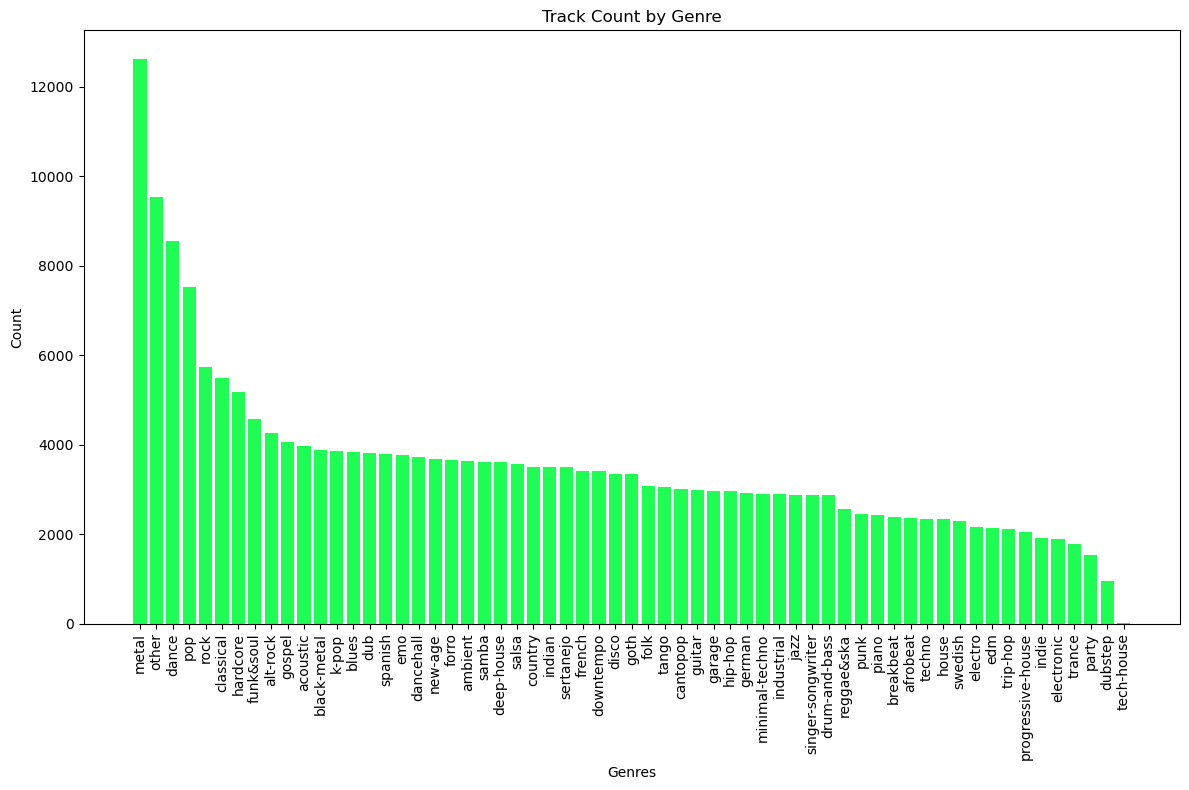

In [52]:
genre_counts = df20['genre_map_v1'].value_counts()

# Convert NumPy array to dictionary
genre_counts = dict(genre_counts)

# Create lists for genre labels and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='#1DFD54')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Track Count by Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [53]:
df20.drop(columns='genre', inplace=True)

In [54]:
df20.columns

Index(['sound_profile', 'track_id', 'artist_name', 'track_name', 'year',
       'time_signature', 'key', 'mode', 'duration_ms', 'tempo', 'loudness',
       'popularity', 'energy', 'valence', 'danceability', 'speechiness',
       'instrumentalness', 'acousticness', 'liveness', 'genre_map_v1'],
      dtype='object')

In [55]:
# Reorder cols
df20 = df20.reindex(columns=['sound_profile',
                         'track_id',
                         'artist_name',
                         'track_name',
                         'genre_map_v1',
                         'year',
                         'time_signature',
                         'key',
                         'mode',
                         'duration_ms',
                         'tempo',
                         'loudness',
                         'popularity',
                         'energy',
                         'valence',
                         'danceability',
                         'speechiness',
                         'instrumentalness',
                         'acousticness',
                         'liveness'
                        ])

df20.head(1)

sound_profile                track_id        artist_name         track_name  \
0    no_profile  76XIfZlNduQtecnblkuTcE  The Academy Is...  Unexpected Places   

  genre_map_v1  year  time_signature  key   mode  duration_ms    tempo  \
0          emo  2007               4    1  Minor       254773  125.024   

   loudness  popularity  energy  valence  danceability  speechiness  \
0    -3.818          19    0.91    0.523         0.474       0.0538   

   instrumentalness  acousticness  liveness  
0               0.0       0.00309      0.32

In [56]:
# Rename
df20.rename(columns = {'genre_map_v1': 'genre'}, inplace=True)

In [57]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214956 entries, 0 to 232823
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     214956 non-null  object 
 1   track_id          214956 non-null  object 
 2   artist_name       214956 non-null  object 
 3   track_name        214956 non-null  object 
 4   genre             214956 non-null  object 
 5   year              214956 non-null  int64  
 6   time_signature    214956 non-null  int64  
 7   key               214956 non-null  int64  
 8   mode              214956 non-null  object 
 9   duration_ms       214956 non-null  int64  
 10  tempo             214956 non-null  float64
 11  loudness          214956 non-null  float64
 12  popularity        214956 non-null  int64  
 13  energy            214956 non-null  float64
 14  valence           214956 non-null  float64
 15  danceability      214956 non-null  float64
 16  speechiness       214956 

#### Year - remove.

- As we previously noted (01-b3-loading-cleaning-initial-eda) with the exception of our sound profile tracks, the maintain database only includes tracks from 2000 onwards.
- We've also no clarity on what this year relates to, the inclusion of Johann Sebastian Bach & Elvis Presley in our column of artists confirms this is not production date (for the main database tracks at least. Given the lack of real meaning we will drop this column.

In [58]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df20["year"].value_counts())

year
2018    10650
2019    10531
2017    10450
2020    10303
2012    10179
2013     9995
2014     9883
2022     9823
2021     9769
2015     9605
2010     8815
2009     8752
2008     8727
2011     8640
2007     8467
2006     8214
2000     8073
2005     8029
2004     7838
2002     7795
2003     7789
2001     7771
2016     7551
2023     7092
1999       19
1997       16
1994       14
1998       14
1995       13
1990       11
1992       11
1976       10
1993       10
1996        9
1972        6
1978        6
1989        6
1991        6
1988        5
1987        5
1980        5
1970        5
1983        4
1982        4
1986        4
1984        3
1981        3
1962        3
1966        3
1977        2
1979        2
1959        2
1969        2
1975        2
1971        2
1985        1
1956        1
1974        1
1964        1
1958        1
1968        1
1967        1
1965        1
Name: count, dtype: int64


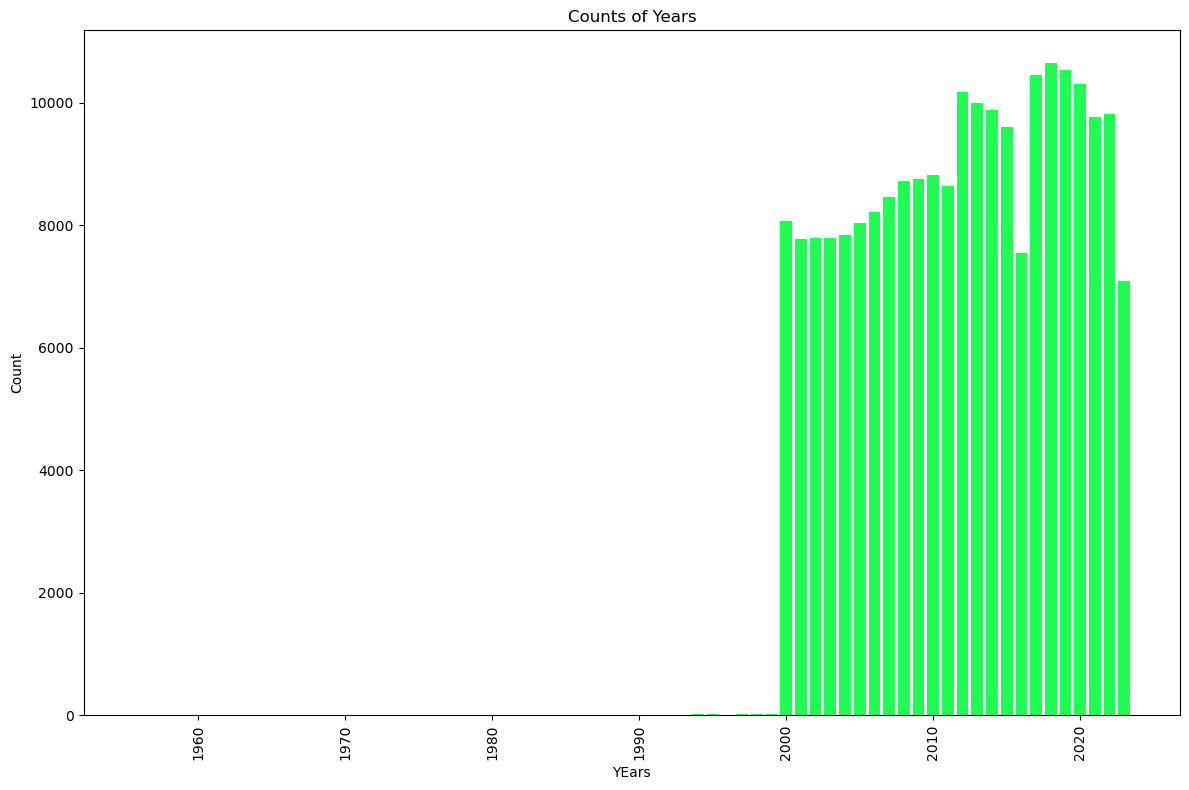

In [59]:
year_counts = df20['year'].value_counts()

# Convert NumPy array to dictionary
year_counts = dict(year_counts)

# Create lists for genre labels and counts
years = list(year_counts.keys())
counts = list(year_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(years, counts, color='#1DFD54')
plt.xlabel('YEars')
plt.ylabel('Count')
plt.title('Counts of Years')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [60]:
df20.drop(columns="year", inplace=True)

In [61]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214956 entries, 0 to 232823
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     214956 non-null  object 
 1   track_id          214956 non-null  object 
 2   artist_name       214956 non-null  object 
 3   track_name        214956 non-null  object 
 4   genre             214956 non-null  object 
 5   time_signature    214956 non-null  int64  
 6   key               214956 non-null  int64  
 7   mode              214956 non-null  object 
 8   duration_ms       214956 non-null  int64  
 9   tempo             214956 non-null  float64
 10  loudness          214956 non-null  float64
 11  popularity        214956 non-null  int64  
 12  energy            214956 non-null  float64
 13  valence           214956 non-null  float64
 14  danceability      214956 non-null  float64
 15  speechiness       214956 non-null  float64
 16  instrumentalness  214956 

#### Time Signature - remove.
- As we saw as part of our initial EDA, the vast majority of music on Spotify is unsurpisingly in 4/4 and whilst time signature is likely to have a close relationship with location (similar types of sound / genre are likely to emmenate from the same place), unfortunately the information online and the numbers we have in our dataset don't seem to correlate. The data dict description explains that; *'the time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".'*, however unfortunately that doesn't give us any more understanding of how that relates to our numbers. 3 = 3/4 and 4 = 4/4 would make sense as these tend to be the more common signatures in modern popular music but how 0, 1, 2 and 5 then relate to the remaining signatures isn't clear. As a result we shall drop this column.

In [62]:
df20['time_signature'].unique()

array([4, 3, 5, 1, 0])

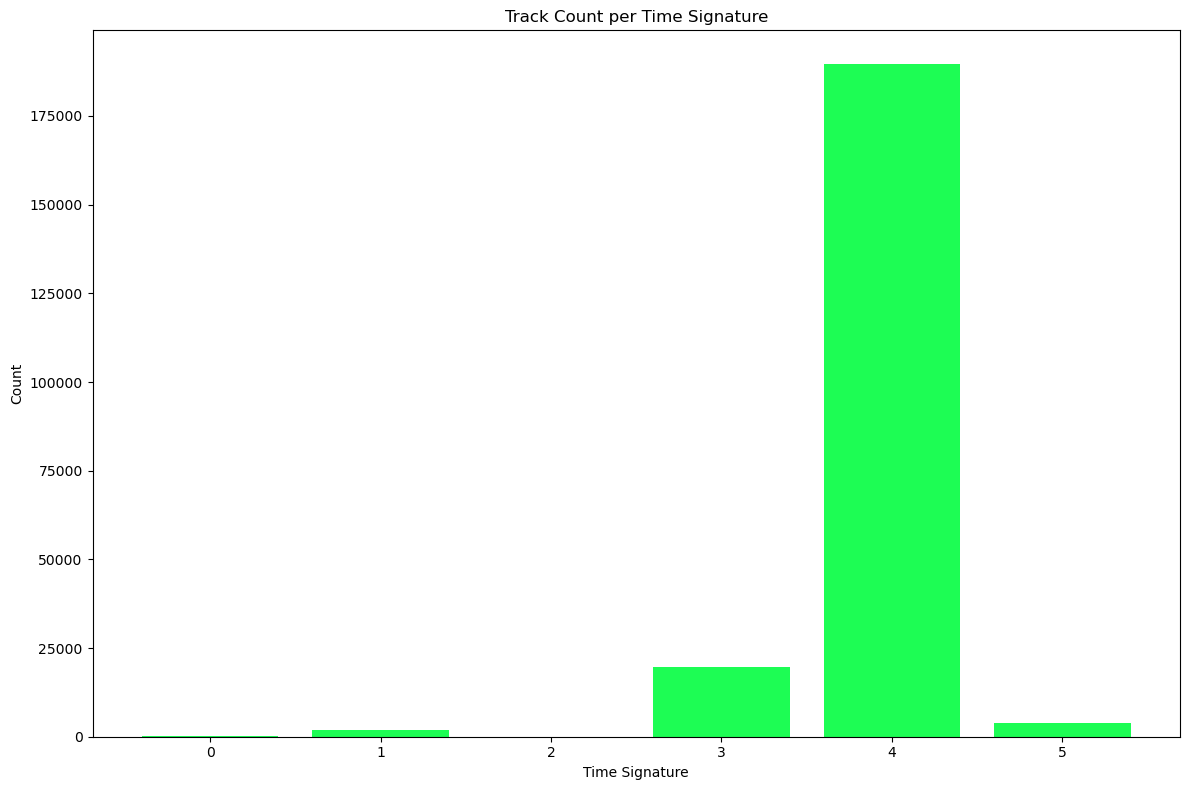

In [63]:
timesig_counts = df20['time_signature'].value_counts()

# Convert NumPy array to dictionary
timesig_counts = dict(timesig_counts)

# Create lists for genre labels and counts
timesigs = list(timesig_counts.keys())
counts = list(timesig_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(timesigs, counts, color='#1DFD54')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.title('Track Count per Time Signature')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [64]:
df20.drop(columns='time_signature', inplace=True)

In [65]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214956 entries, 0 to 232823
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     214956 non-null  object 
 1   track_id          214956 non-null  object 
 2   artist_name       214956 non-null  object 
 3   track_name        214956 non-null  object 
 4   genre             214956 non-null  object 
 5   key               214956 non-null  int64  
 6   mode              214956 non-null  object 
 7   duration_ms       214956 non-null  int64  
 8   tempo             214956 non-null  float64
 9   loudness          214956 non-null  float64
 10  popularity        214956 non-null  int64  
 11  energy            214956 non-null  float64
 12  valence           214956 non-null  float64
 13  danceability      214956 non-null  float64
 14  speechiness       214956 non-null  float64
 15  instrumentalness  214956 non-null  float64
 16  acousticness      214956 

#### Key - map to categorical.
- Here we have a numerical value but will need to convert to categorical then hotone encode to avoid implying order (whilst there is order, no one key is 'greater' than another). Let's map first then encode during preprocessing.
    - 0 : C
    - 1 : C#/Db
    - 2 : D
    - 3 : D#/Eb
    - 4 : E
    - 5 : F
    - 6 : F#/Gb
    - 7 : G
    - 8 : G#/Ab
    - 9 : A
    - 10 : A#/Bb
    - 11 : B

In [66]:
df20["key"].value_counts()

key
7     26000
0     24078
2     23048
9     22074
1     20702
5     17469
11    16933
4     16899
6     14161
10    14084
8     13032
3      6476
Name: count, dtype: int64

In [67]:
df20['key_map'] = df20['key'].map({
    0 : 'C',
    1 : 'C#/Db',
    2 : 'D',
    3 : 'D#/Eb',
    4 : 'E',
    5 : 'F',
    6 : 'F#/Gb',
    7 : 'G',
    8 : 'G#/Ab',
    9 : 'A',
    10 : 'A#/Bb',
    11 : 'B'
})

In [68]:
# Check updated
df20['key_map'].value_counts()

key_map
G        26000
C        24078
D        23048
A        22074
C#/Db    20702
F        17469
B        16933
E        16899
F#/Gb    14161
A#/Bb    14084
G#/Ab    13032
D#/Eb     6476
Name: count, dtype: int64

In [69]:
# Check correct mapping
list(df20['key_map'].value_counts()) == list(df20["key"].value_counts())

True

In [70]:
# Drop old key column
df20.drop(columns="key", inplace=True)

In [71]:
df20.columns

Index(['sound_profile', 'track_id', 'artist_name', 'track_name', 'genre',
       'mode', 'duration_ms', 'tempo', 'loudness', 'popularity', 'energy',
       'valence', 'danceability', 'speechiness', 'instrumentalness',
       'acousticness', 'liveness', 'key_map'],
      dtype='object')

In [72]:
# Reorder cols
df20 = df20.reindex(columns=['sound_profile',
                         'track_id',
                         'artist_name',
                         'track_name',
                         'genre',
                         'key_map',
                         'mode',
                         'duration_ms',
                         'tempo',
                         'loudness',
                         'popularity',
                         'energy',
                         'valence',
                         'danceability',
                         'speechiness',
                         'instrumentalness',
                         'acousticness',
                         'liveness'
                        ])

df20.head(1)

sound_profile                track_id        artist_name         track_name  \
0    no_profile  76XIfZlNduQtecnblkuTcE  The Academy Is...  Unexpected Places   

  genre key_map   mode  duration_ms    tempo  loudness  popularity  energy  \
0   emo   C#/Db  Minor       254773  125.024    -3.818          19    0.91   

   valence  danceability  speechiness  instrumentalness  acousticness  \
0    0.523         0.474       0.0538               0.0       0.00309   

   liveness  
0      0.32

In [73]:
# Rename
df20.rename(columns = {'key_map': 'key'}, inplace=True)

In [74]:
# Check updated
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214956 entries, 0 to 232823
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     214956 non-null  object 
 1   track_id          214956 non-null  object 
 2   artist_name       214956 non-null  object 
 3   track_name        214956 non-null  object 
 4   genre             214956 non-null  object 
 5   key               214956 non-null  object 
 6   mode              214956 non-null  object 
 7   duration_ms       214956 non-null  int64  
 8   tempo             214956 non-null  float64
 9   loudness          214956 non-null  float64
 10  popularity        214956 non-null  int64  
 11  energy            214956 non-null  float64
 12  valence           214956 non-null  float64
 13  danceability      214956 non-null  float64
 14  speechiness       214956 non-null  float64
 15  instrumentalness  214956 non-null  float64
 16  acousticness      214956 

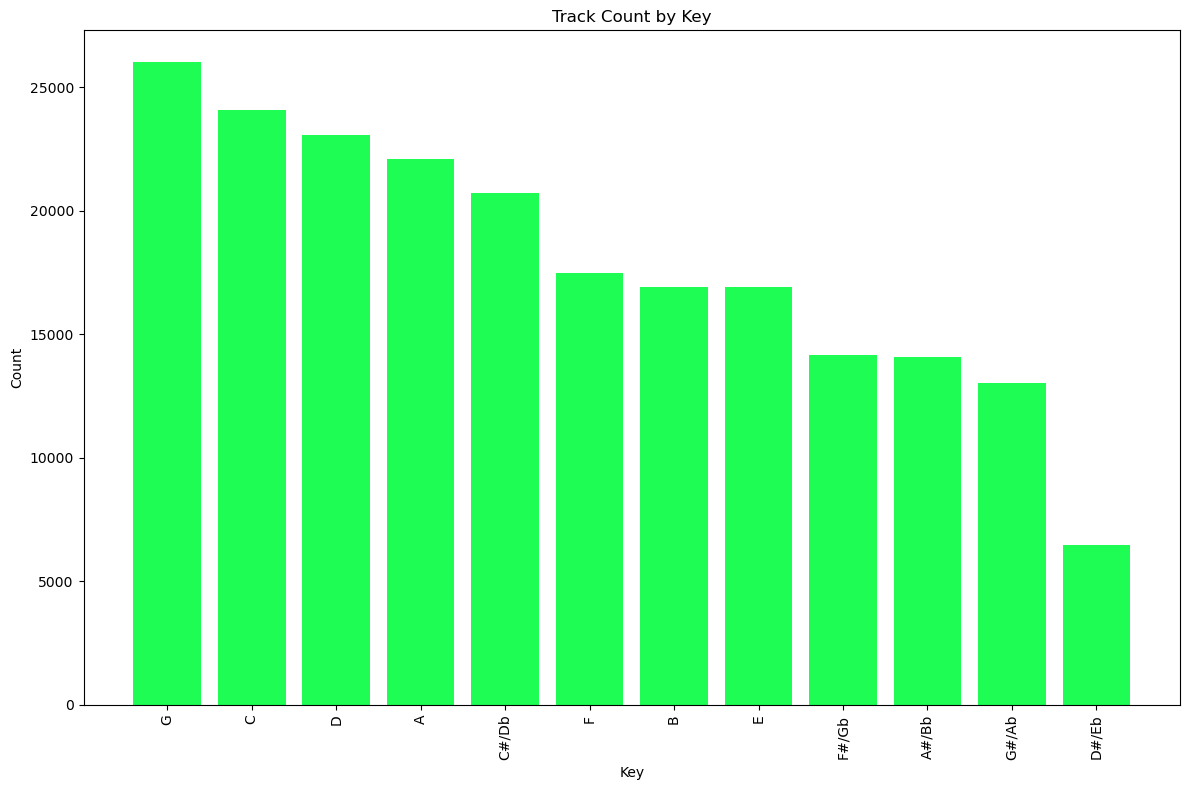

In [75]:
key_counts = df20['key'].value_counts()

# Convert NumPy array to dictionary
key_counts = dict(key_counts)

# Create lists for genre labels and counts
keys = list(key_counts.keys())
counts = list(key_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(keys, counts, color='#1DFD54')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Track Count by Key')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Mode.
- Already mapped to categorical so no further action before one hot encode. 63:37 Major:Minor.

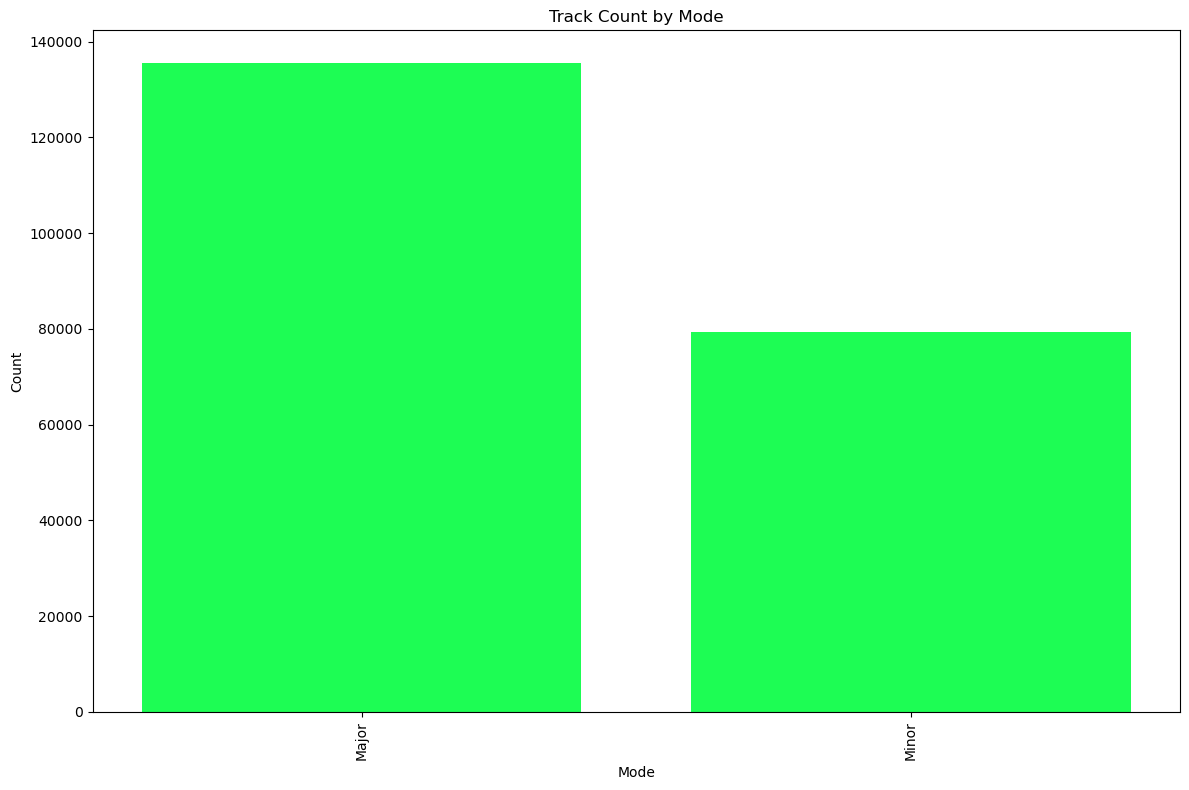

In [76]:
genre_counts = df20['mode'].value_counts()

# Convert NumPy array to dictionary
genre_counts = dict(genre_counts)

# Create lists for genre labels and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='#1DFD54')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Track Count by Mode')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [77]:
df20['mode'].value_counts(normalize=True)

mode
Major    0.630845
Minor    0.369155
Name: proportion, dtype: float64

#### Tempo.
- Tempo looks like it could be normally distributed, whilst it there are tracks at 50bpm and below which isn't so common, some tracks such as ambient genres may not have much in the way of a beat at all. Equally some heavy genres of metal and hardcore could top 200bpm so we'll leave tempo as is.

In [78]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214956 entries, 0 to 232823
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     214956 non-null  object 
 1   track_id          214956 non-null  object 
 2   artist_name       214956 non-null  object 
 3   track_name        214956 non-null  object 
 4   genre             214956 non-null  object 
 5   key               214956 non-null  object 
 6   mode              214956 non-null  object 
 7   duration_ms       214956 non-null  int64  
 8   tempo             214956 non-null  float64
 9   loudness          214956 non-null  float64
 10  popularity        214956 non-null  int64  
 11  energy            214956 non-null  float64
 12  valence           214956 non-null  float64
 13  danceability      214956 non-null  float64
 14  speechiness       214956 non-null  float64
 15  instrumentalness  214956 non-null  float64
 16  acousticness      214956 

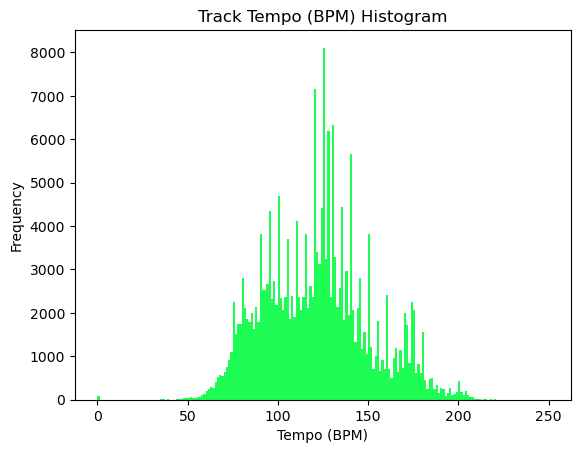

In [79]:
plt.hist(df20['tempo'], bins=200, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.title('Track Tempo (BPM) Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

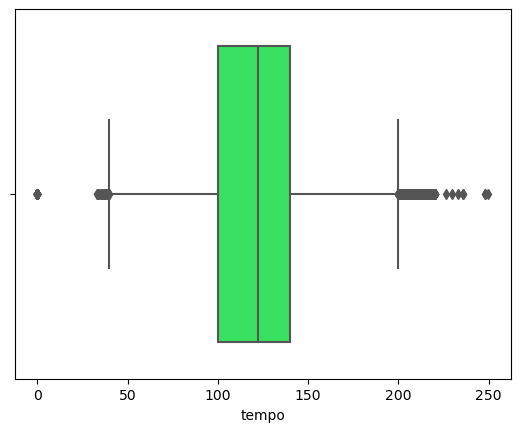

In [80]:
sns.boxplot(data=df20, x=df20['tempo'], color='#1DFD54');

In [81]:
b3.df_numstats(df20[['tempo']])

TEMPO
MEAN: 121.99
MEDIAN: 122.4
RANGE: 249.79
IQR: 40.05
STANDARDDEVIATION: 29.31
MAX: 249.79
MIN: 0.0





#### Loudness - tracks below -30LUFS removed.
- Loudness distribution looks it could be normal with a strong left-skew. Given the loundess wars mentioned in the previous notebook, it's no surprise we see a leaning towards above -10 LUFS.
- Whilst LUFS for classical music masters can range down to c. -25LUFS (https://www.sageaudio.com/articles/how-to-master-dynamic-classical-music) it would be unlikely to drop signifantly below this and would be difficult to appreciate on most typical household speaker systems, as a result we will drop all tracks with an LUFS of less than -30LUFS (around 8.5k tracks in total).

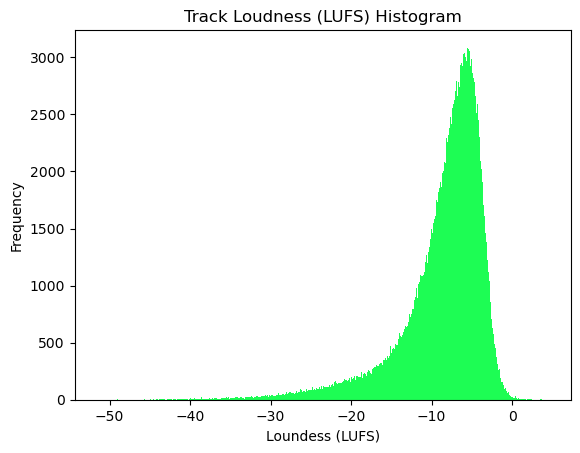

In [82]:
plt.hist(df20['loudness'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Loundess (LUFS)')
plt.ylabel('Frequency')
plt.title('Track Loudness (LUFS) Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [83]:
(df20['loudness'] < -30).value_counts()

loudness
False    213219
True       1737
Name: count, dtype: int64

In [84]:
loudness_to_drop = df20[df20['loudness'] < -30].index
loudness_to_drop

Index([   273,    451,    835,    855,    897,   1031,   1086,   1177,   1313,
         1461,
       ...
       229962, 230070, 230311, 230451, 230647, 230776, 230835, 231230, 231319,
       231590],
      dtype='int64', length=1737)

In [85]:
df20.shape

(214956, 18)

In [86]:
df20.drop(index=loudness_to_drop, inplace=True)

In [87]:
df20.shape

(213219, 18)

In [88]:
# Check correct number dropped
214956-213219

1737

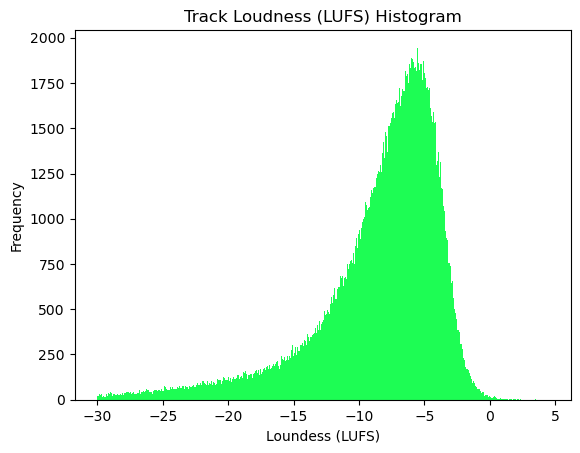

In [89]:
plt.hist(df20['loudness'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Loundess (LUFS)')
plt.ylabel('Frequency')
plt.title('Track Loudness (LUFS) Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

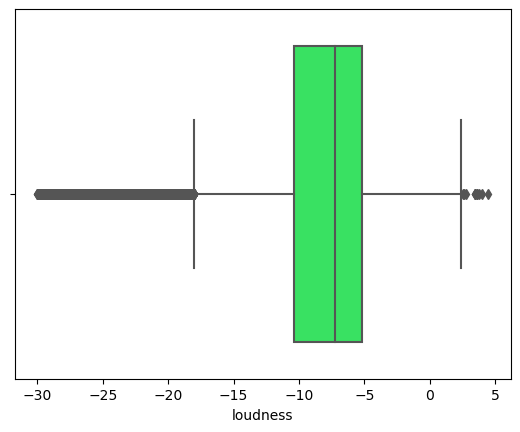

In [90]:
sns.boxplot(data=df20, x=df20['loudness'], color='#1DFD54');

In [91]:
b3.df_numstats(df20[['loudness']])

LOUDNESS
MEAN: -8.49
MEDIAN: -7.28
RANGE: 34.47
IQR: 5.14
STANDARDDEVIATION: 4.85
MAX: 4.47
MIN: -30.0





In [92]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213219 entries, 0 to 232823
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     213219 non-null  object 
 1   track_id          213219 non-null  object 
 2   artist_name       213219 non-null  object 
 3   track_name        213219 non-null  object 
 4   genre             213219 non-null  object 
 5   key               213219 non-null  object 
 6   mode              213219 non-null  object 
 7   duration_ms       213219 non-null  int64  
 8   tempo             213219 non-null  float64
 9   loudness          213219 non-null  float64
 10  popularity        213219 non-null  int64  
 11  energy            213219 non-null  float64
 12  valence           213219 non-null  float64
 13  danceability      213219 non-null  float64
 14  speechiness       213219 non-null  float64
 15  instrumentalness  213219 non-null  float64
 16  acousticness      213219 

#### ***(the following are metrics unique to Spotify...)***

#### Popularity - remove.
- Here we see an obvious anomoly, 0 popularity rating being by far the most numerous rating count across the dataset. The reason? The initial hypothesis was that it would likely be due to lack of listens vs. there being a lot of rubbish on the platform. However, having reviewed our sound profiles it turns out a lot of these tracks also have a zero popularity, pretty odd given that list includes big names ranging from Bob Marley and Frankie Knuckles to Disclosure and Guns N Roses.
- Whilst it feels like a bit of shame to drop popularity in it's entirety, given the calibre of artists and tracks receiving a 0 rating it can't be trusted so it will be removed.
- If time allows we will experiment modelling with it both included and excluded to see how it impacts our results.

In [93]:
df20['popularity'].value_counts()

popularity
0      28359
1       7092
8       5543
2       5528
10      5393
       ...  
88         2
92         1
100        1
87         1
89         1
Name: count, Length: 93, dtype: int64

In [94]:
df20['popularity'].value_counts(normalize=True)

popularity
0      0.133004
1      0.033262
8      0.025997
2      0.025926
10     0.025293
         ...   
88     0.000009
92     0.000005
100    0.000005
87     0.000005
89     0.000005
Name: proportion, Length: 93, dtype: float64

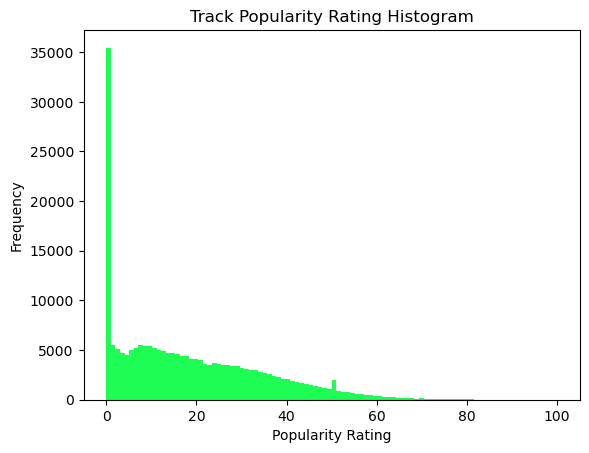

In [95]:
plt.hist(df20['popularity'], bins=98, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Popularity Rating')
plt.ylabel('Frequency')
plt.title('Track Popularity Rating Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


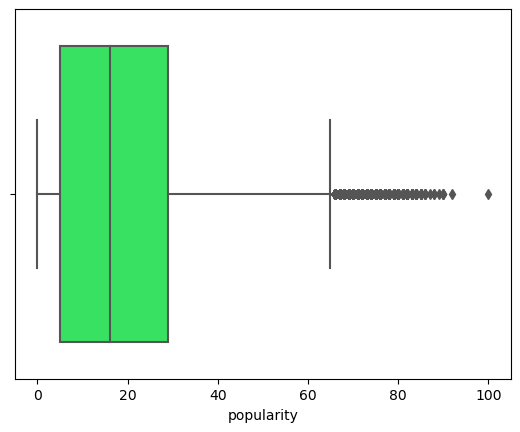

In [96]:
sns.boxplot(data=df20, x=df20['popularity'], color='#1DFD54');

In [97]:
b3.df_numstats(df20[['popularity']])

POPULARITY
MEAN: 18.73
MEDIAN: 16.0
RANGE: 100
IQR: 24.0
STANDARDDEVIATION: 16.04
MAX: 100
MIN: 0





In [98]:
# Check if any tracks featured in our sound profiles have  0 popularity
combined_snd_samp[combined_snd_samp['popularity'] == 0]

artist_name                          track_name  \
232001        Disclosure                               Latch   
232006        Ultra Naté                   Free [Radio Edit]   
232009       Storm Queen  Look Right Through - MK Vocal Edit   
232028       Simon Field                      Shake The Tree   
232038          Route 94                             My Love   
...                  ...                                 ...   
232767       Billy Bragg                    California Stars   
232769             Train              Save Me, San Francisco   
232771  The Decemberists              Los Angeles, I'm Yours   
232773     Guns N' Roses                       Paradise City   
232776   Vampire Weekend                  California English   

                   genre  year  duration_ms    tempo  time_signature  key  \
232001               edm  2013       255632  121.985               4    1   
232006        diva house  1997       233293  124.970               4    8   
232009  deep disco house  2014       150400  119.995               4    0   
232028   norwegian house  2019       184372  123.005               4   11   
232038             house  2014       262000  120.008               4    8   
...                  ...   ...          ...      ...             ...  ...   
232767         anti-folk  1998       298533  110.240               4    9   
232769         dance pop  2009       249427  111.998               4    2   
232771       baroque pop  2003       257640  146.170               4    0   
232773        glam metal  1987       406307  100.346               4   11   
232776       baroque pop  2010       150240  164.464               4    0   

         mode  loudness  popularity  liveness  acousticness  speechiness  \
232001  Major    -5.456           0    0.0895      0.015900       0.1670   
232006  Major    -6.094           0    0.0371      0.004050       0.0371   
232009  Minor    -8.035           0    0.2630      0.003040       0.0810   
232028  Major    -5.698           0    0.3780      0.002150       0.0342   
232038  Major    -7.641           0    0.0636      0.000139       0.0512   
...       ...       ...         ...       ...           ...          ...   
232767  Major    -9.229           0    0.0829      0.422000       0.0292   
232769  Major    -2.694           0    0.6160      0.055800       0.0429   
232771  Major    -8.197           0    0.1280      0.324000       0.0391   
232773  Major    -8.642           0    0.2180      0.021400       0.0896   
232776  Major    -8.334           0    0.3850      0.082700       0.3210   

        instrumentalness  energy  valence  danceability  \
232001          0.000095   0.727    0.521         0.503   
232006          0.000171   0.915    0.741         0.756   
232009          0.005530   0.815    0.519         0.832   
232028          0.000094   0.871    0.237         0.589   
232038          0.611000   0.601    0.729         0.816   
...                  ...     ...      ...           ...   
232767          0.000012   0.736    0.723         0.622   
232769          0.000000   0.946    0.889         0.641   
232771          0.000000   0.360    0.656         0.548   
232773          0.007780   0.949    0.497         0.274   
232776          0.000005   0.642    0.646         0.615   

                      track_id sound_profile  
232001  1BltsyC5W3SAABdxyrDXwi         ibiza  
232006  1codrXpwPN95Jd1EkWnrXW         ibiza  
232009  3WG2XcylOzMxoRNwEpmXSe         ibiza  
232028  4ooxGxWbItZv2pnND3tYZj         ibiza  
232038  2iS2s9oYpEmUzrAHPmqBHy         ibiza  
...                        ...           ...  
232767  38paDDziQ57k1f4VfKTeGk            la  
232769  3IEb6eoUOVEPp4wvGcBbx9            la  
232771  5BYSdRAQ9z91icF1uIXGue            la  
232773  5Q41NLTmGbVPozwHKK7bk2            la  
232776  616yWUonrccM3bckt85yC5            la  

[268 rows x 20 columns]

In [99]:
df20.shape

(213219, 18)

In [100]:
# Drop column
df20.drop(columns='popularity', inplace=True)
df20.shape

(213219, 17)

In [101]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213219 entries, 0 to 232823
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     213219 non-null  object 
 1   track_id          213219 non-null  object 
 2   artist_name       213219 non-null  object 
 3   track_name        213219 non-null  object 
 4   genre             213219 non-null  object 
 5   key               213219 non-null  object 
 6   mode              213219 non-null  object 
 7   duration_ms       213219 non-null  int64  
 8   tempo             213219 non-null  float64
 9   loudness          213219 non-null  float64
 10  energy            213219 non-null  float64
 11  valence           213219 non-null  float64
 12  danceability      213219 non-null  float64
 13  speechiness       213219 non-null  float64
 14  instrumentalness  213219 non-null  float64
 15  acousticness      213219 non-null  float64
 16  liveness          213219 

#### Energy.
- Possibly a normal distribution but heavily left-skewed with a large number of tracks with a higher energy rating.

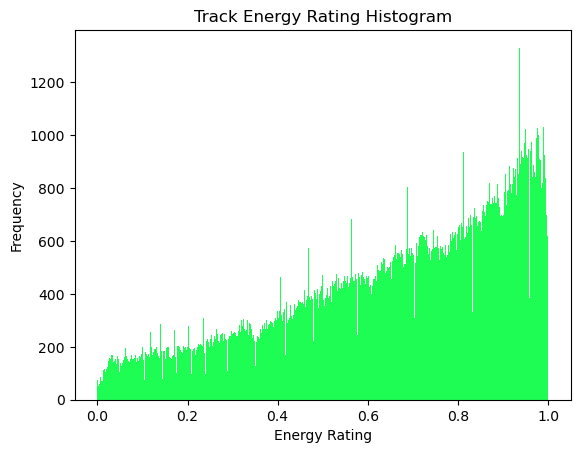

In [102]:
plt.hist(df20['energy'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Energy Rating')
plt.ylabel('Frequency')
plt.title('Track Energy Rating Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


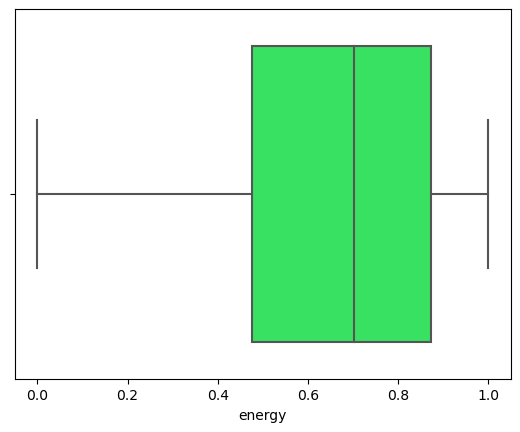

In [103]:
sns.boxplot(data=df20, x=df20['energy'], color='#1DFD54');

In [104]:
b3.df_numstats(df20[['energy']])

ENERGY
MEAN: 0.65
MEDIAN: 0.7
RANGE: 1.0
IQR: 0.4
STANDARDDEVIATION: 0.26
MAX: 1.0
MIN: 0.0





#### Valence
- Possibly normal distribution with a very wide spread. Also some spikes visible, unclear what exactly these are so we will have to leave.

In [105]:
df20['valence'].value_counts()

valence
0.96100    561
0.96200    444
0.96300    428
0.96400    368
0.96000    360
          ... 
0.01810      1
0.00180      1
0.00833      1
0.01930      1
0.00507      1
Name: count, Length: 1801, dtype: int64

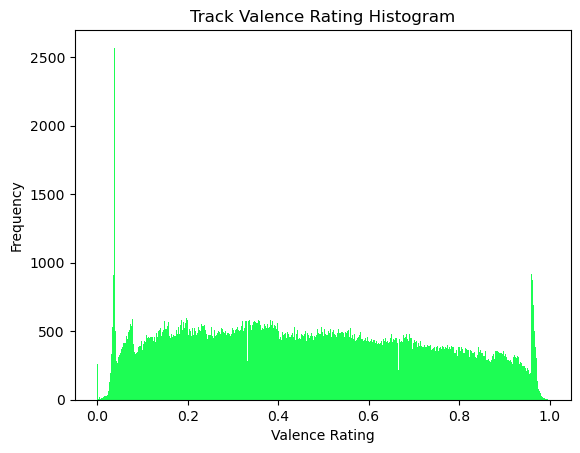

In [106]:
plt.hist(df20['valence'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Valence Rating')
plt.ylabel('Frequency')
plt.title('Track Valence Rating Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


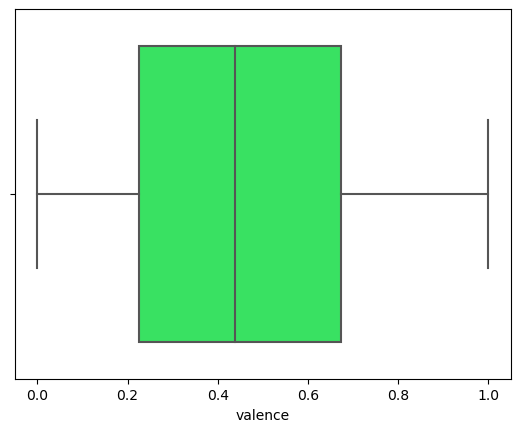

In [107]:
sns.boxplot(data=df20, x=df['valence'], color='#1DFD54');

In [108]:
b3.df_numstats(df20[['valence']])

VALENCE
MEAN: 0.46
MEDIAN: 0.45
RANGE: 1.0
IQR: 0.44
STANDARDDEVIATION: 0.27
MAX: 1.0
MIN: 0.0





#### Danceability.
- Normal distribution with a slight left skew.
- Also a spike around the 0.8 mark present, likely a secondary trend in the data resulting from how Spotify have calculated the danceability rating.

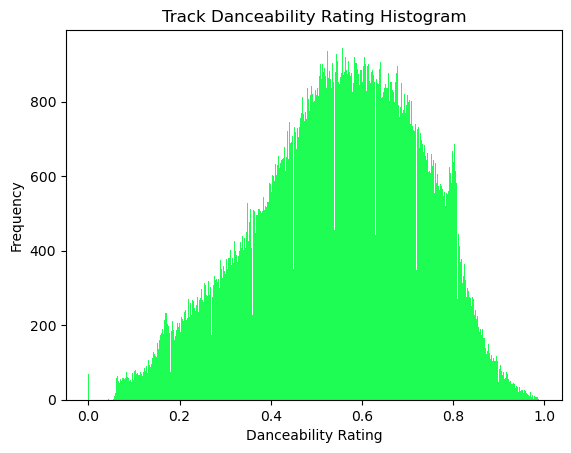

In [109]:
plt.hist(df20['danceability'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Danceability Rating')
plt.ylabel('Frequency')
plt.title('Track Danceability Rating Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

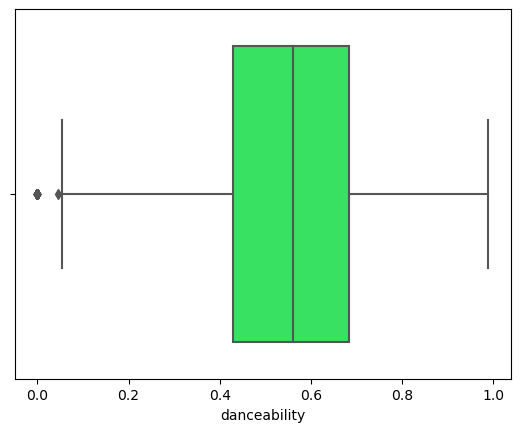

In [110]:
sns.boxplot(data=df20, x=df20['danceability'], color='#1DFD54');

In [111]:
b3.df_numstats(df20[['danceability']])

DANCEABILITY
MEAN: 0.55
MEDIAN: 0.56
RANGE: 0.99
IQR: 0.26
STANDARDDEVIATION: 0.18
MAX: 0.99
MIN: 0.0





#### Speechiness - Log transformed.
- Heavily right-skewed, also a second, much smaller peak at the top end (likely acappella / near acappella tracks). Log transformed to help aid modelling, interpretability not as much an issue here due to speechiness being a custom spotify measure. Possibly further processing needed.

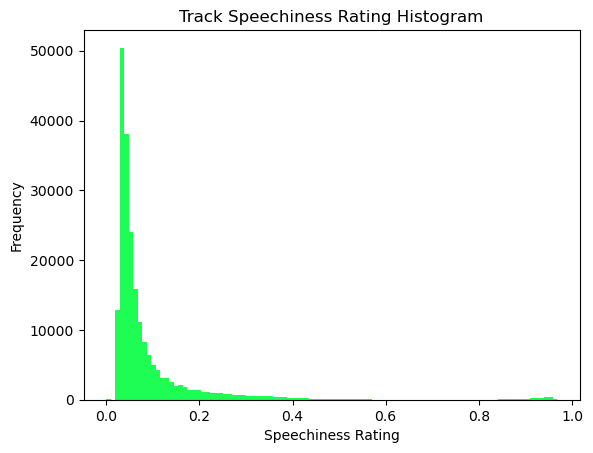

In [112]:
plt.hist(df20['speechiness'], bins=100, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Speechiness Rating')
plt.ylabel('Frequency')
plt.title('Track Speechiness Rating Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


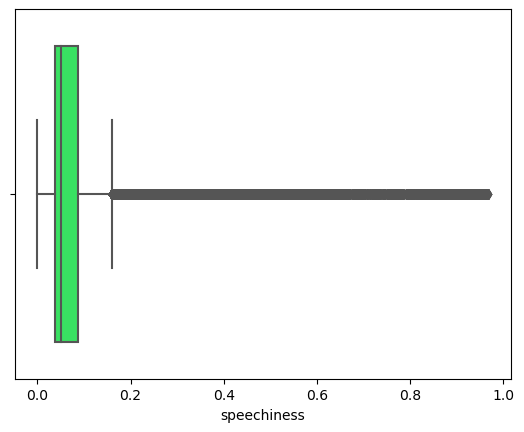

In [113]:
sns.boxplot(data=df20, x=df20['speechiness'], color='#1DFD54');

In [114]:
b3.df_numstats(df20[['speechiness']])

SPEECHINESS
MEAN: 0.09
MEDIAN: 0.05
RANGE: 0.97
IQR: 0.05
STANDARDDEVIATION: 0.12
MAX: 0.97
MIN: 0.0





In [115]:
# Log scale speechiness, add 1 to avoid taking the log of 0
df20['log_speechiness'] = np.log(df20['speechiness'] + 1)

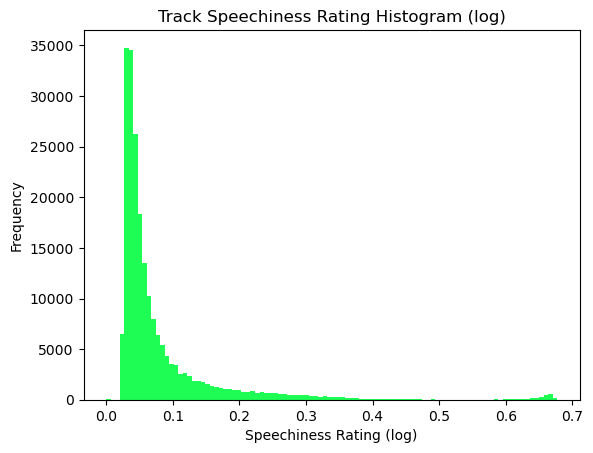

In [116]:
plt.hist(df20['log_speechiness'], bins=100, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Speechiness Rating (log)')
plt.ylabel('Frequency')
plt.title('Track Speechiness Rating Histogram (log)')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


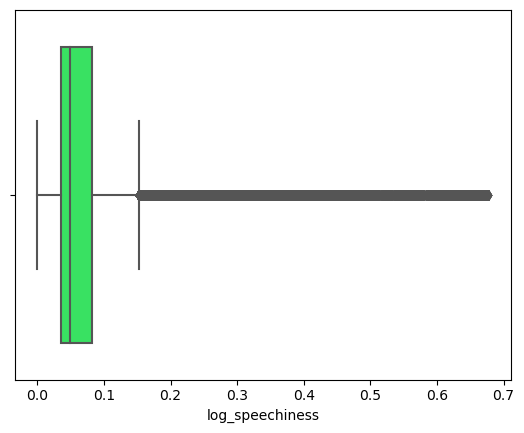

In [117]:
sns.boxplot(data=df20, x=df20['log_speechiness'], color='#1DFD54');

#### Instrumentalness - Log transformed.
- Heavily right-skewed, also secondary (much smaller) peak around 0.8. Log transformed as speechiness above. Potentially needs further processing.

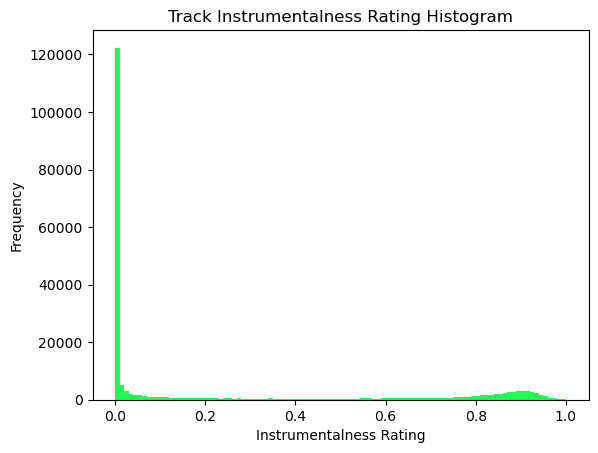

In [118]:
plt.hist(df20['instrumentalness'], bins=100, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Instrumentalness Rating')
plt.ylabel('Frequency')
plt.title('Track Instrumentalness Rating Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


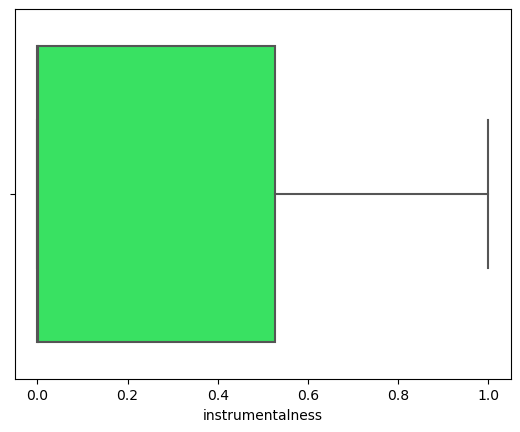

In [119]:
sns.boxplot(data=df20, x=df20['instrumentalness'], color='#1DFD54');

In [120]:
b3.df_numstats(df[['instrumentalness']])

INSTRUMENTALNESS
MEAN: 0.25
MEDIAN: 0.0
RANGE: 1.0
IQR: 0.61
STANDARDDEVIATION: 0.37
MAX: 1.0
MIN: 0.0





In [121]:
# Log scale instrumentalness, add 1 to avoid taking the log of 0
df20['log_instrumentalness'] = np.log(df20['instrumentalness'] + 1)

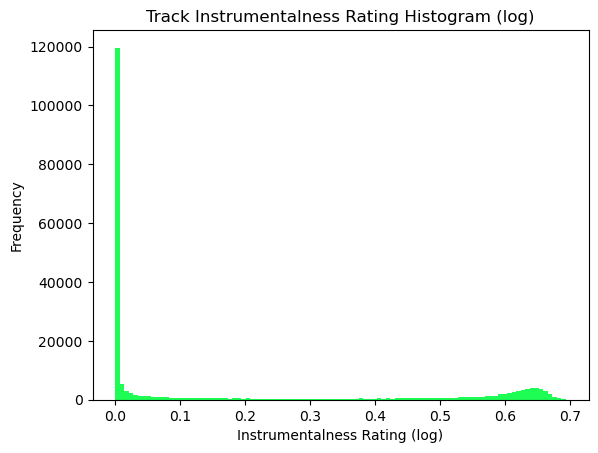

In [122]:
plt.hist(df20['log_instrumentalness'], bins=100, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Instrumentalness Rating (log)')
plt.ylabel('Frequency')
plt.title('Track Instrumentalness Rating Histogram (log)')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


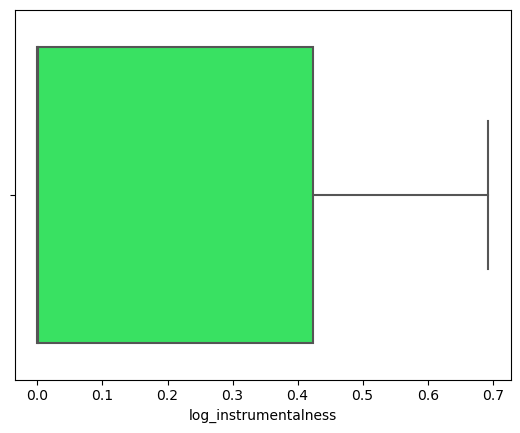

In [123]:
sns.boxplot(data=df20, x=df20['log_instrumentalness'], color='#1DFD54');

#### Acousticness - Log transformed.
- Heavily right-skewed, also secondary (much smaller) peak close to 1 (very acoustic tracks). Log transformed as speechiness above. Potentially needs further processing.

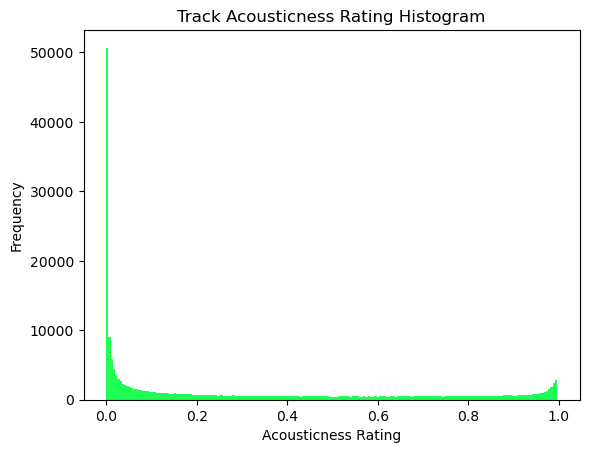

In [124]:
plt.hist(df20['acousticness'], bins=200, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Acousticness Rating')
plt.ylabel('Frequency')
plt.title('Track Acousticness Rating Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


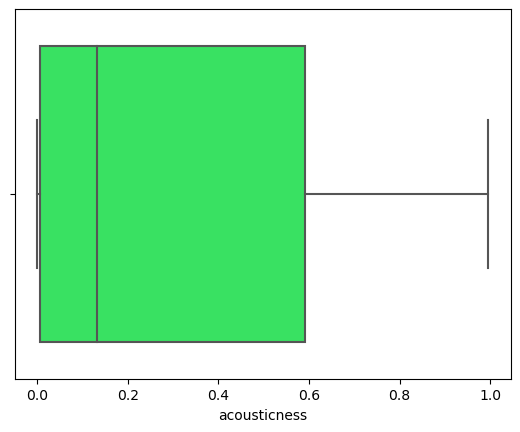

In [125]:
sns.boxplot(data=df20, x=df20['acousticness'], color='#1DFD54');

In [126]:
b3.df_numstats(df20[['acousticness']])

ACOUSTICNESS
MEAN: 0.3
MEDIAN: 0.13
RANGE: 1.0
IQR: 0.59
STANDARDDEVIATION: 0.34
MAX: 1.0
MIN: 0.0





In [127]:
# Log scale acousticness, add 1 to avoid taking the log of 0
df20['log_acousticness'] = np.log(df20['acousticness'] + 1)

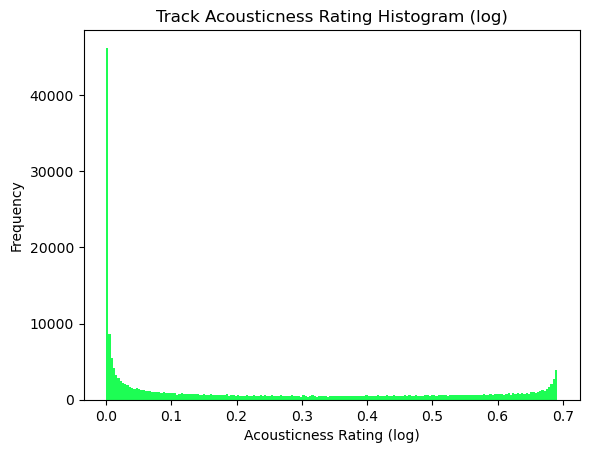

In [128]:
plt.hist(df20['log_acousticness'], bins=200, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Acousticness Rating (log)')
plt.ylabel('Frequency')
plt.title('Track Acousticness Rating Histogram (log)')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


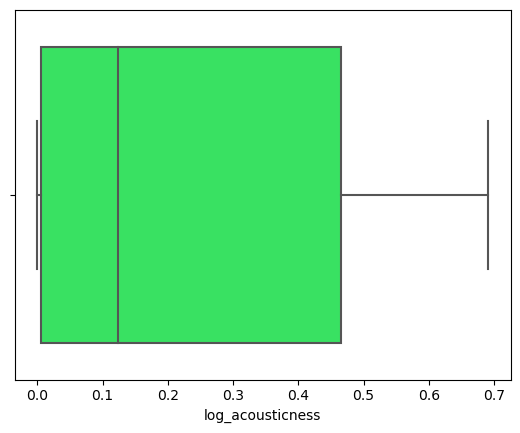

In [129]:
sns.boxplot(data=df20, x=df20['log_acousticness'], color='#1DFD54');

In [130]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213219 entries, 0 to 232823
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sound_profile         213219 non-null  object 
 1   track_id              213219 non-null  object 
 2   artist_name           213219 non-null  object 
 3   track_name            213219 non-null  object 
 4   genre                 213219 non-null  object 
 5   key                   213219 non-null  object 
 6   mode                  213219 non-null  object 
 7   duration_ms           213219 non-null  int64  
 8   tempo                 213219 non-null  float64
 9   loudness              213219 non-null  float64
 10  energy                213219 non-null  float64
 11  valence               213219 non-null  float64
 12  danceability          213219 non-null  float64
 13  speechiness           213219 non-null  float64
 14  instrumentalness      213219 non-null  float64
 15  acous

In [131]:
df20.drop(columns=['log_speechiness', 'log_instrumentalness', 'log_acousticness'], inplace=True)

#### Liveness.
- Right-skewed but with multiple smaller peaks present, likely a result of Spotify's combination of a number of factors to create 'Liveness' score. (Amount of reverb detected? Noise present in signal? Higher speechiness score?) Could be interesting to use ML to distil the different distributions and see if there are any obvious links.

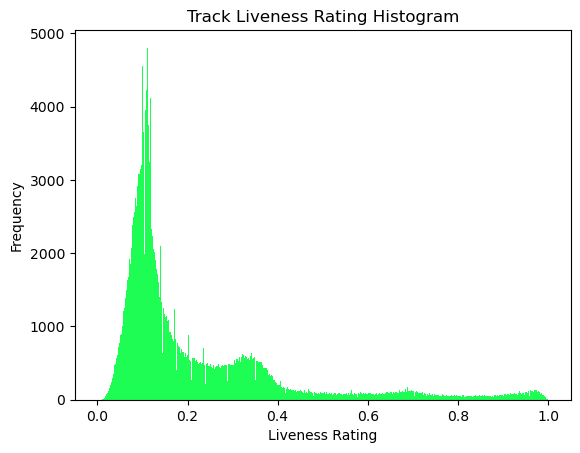

In [132]:
plt.hist(df20['liveness'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Liveness Rating')
plt.ylabel('Frequency')
plt.title('Track Liveness Rating Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

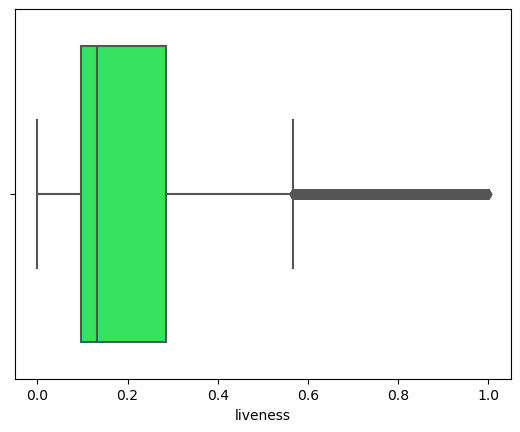

In [133]:
sns.boxplot(data=df20, x=df20['liveness'], color='#1DFD54');



In [134]:
b3.df_numstats(df20[['liveness']])

LIVENESS
MEAN: 0.22
MEDIAN: 0.13
RANGE: 1.0
IQR: 0.19
STANDARDDEVIATION: 0.2
MAX: 1.0
MIN: 0.0





#### Drop unlogged Speechiness, Instrumentalness and Acousticness and reorder

In [135]:
df20.drop(columns=['speechiness', 'instrumentalness', 'acousticness'], inplace=True)

In [136]:
df20 = df20.reindex(columns=['sound_profile',
                         'track_id',
                         'artist_name',
                         'track_name',
                         'genre',
                         'key',
                         'mode',
                         'duration_ms',
                         'tempo',
                         'loudness',
                         'energy',
                         'valence',
                         'danceability',
                         'log_speechiness',
                         'log_instrumentalness',
                         'log_acousticness',
                         'liveness'
                        ])

In [137]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213219 entries, 0 to 232823
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sound_profile         213219 non-null  object 
 1   track_id              213219 non-null  object 
 2   artist_name           213219 non-null  object 
 3   track_name            213219 non-null  object 
 4   genre                 213219 non-null  object 
 5   key                   213219 non-null  object 
 6   mode                  213219 non-null  object 
 7   duration_ms           213219 non-null  int64  
 8   tempo                 213219 non-null  float64
 9   loudness              213219 non-null  float64
 10  energy                213219 non-null  float64
 11  valence               213219 non-null  float64
 12  danceability          213219 non-null  float64
 13  log_speechiness       0 non-null       float64
 14  log_instrumentalness  0 non-null       float64
 15  log_a

### 3. **Sound Profile EDA**

#### Updated sound profiles to remove tracks following further cleaning + update indices (we'll also process full df here so its ready to go if required/time allows)
- Duration - Remove tracks below 120000 and above 600000
    - 1104389 - Sex Pistols - My Way (London)
    - 935647  - Burial - UK (London)
    - 1160335 - Connie Stevens - Sixteen Reasons (LA)
    - 328073 - NTO - Trauma - Worakls Remix (Berlin)
- Duration - Remove tracks below 120000 and above 600000
    - 232811 - Sex Pistols - My Way (London)
    - 200890  - Burial - UK (London)
    - 232732 - Connie Stevens - Sixteen Reasons (LA)
    - 232534 - NTO - Trauma - Worakls Remix (Berlin)
- Loudness - Remove tracks below -30 LUFS
    - No relevant tracks within sound profiles

Index lists
- lon_snd_index
- man_snd_index
- bza_snd_index
- ber_snd_index
- kng_snd_index
- nyc_snd_index
- la_snd_index
- comb_snd_index

Index lists
- lon_snd_index_samp
- man_snd_index_samp
- bza_snd_index_samp
- ber_snd_index_samp
- kng_snd_index_samp
- nyc_snd_index_samp
- la_snd_index_samp
- comb_snd_index_samp

DFs
- london_snd (58)
- manchester_snd (50)
- ibiza_snd (432)
- berlin_snd (199)
- kingston_snd (76)
- nyc_snd (50)
- la_snd (65)
- combined_snd (930)

DFs
- london_snd_samp (58)
- manchester_snd_samp (50)
- ibiza_snd_samp (432)
- berlin_snd_samp (199)
- kingston_snd_samp (76)
- nyc_snd_samp (50)
- la_snd_samp (65)
- combined_snd_samp (930)


#### Update sound profiles

In [138]:
# Duration - trackstoremove_index - df = [1104389, 935647, 1160335, 328073]
# Duration - trackstoremove_index - df20 = [232811, 200890, 232732, 232534]

In [139]:
# london sound playlist tracks to remove - df [1104389, 935647]
london_snd.drop(index=[1104389, 935647], inplace=True)
# london sound playlist tracks to remove - df20 [232811, 200890]
london_snd_samp.drop(index=[232811, 200890], inplace=True)

In [140]:
# Update sound index - df
lon_snd_index = london_snd.index
# Update sound index - df20
lon_snd_index_samp = london_snd_samp.index

In [141]:
# Check updated
print(len(lon_snd_index))
print(len(lon_snd_index_samp))

58
58


In [142]:
# la sound playlist tracks to remove - df [1160335]
la_snd.drop(index=[1160335], inplace=True)
# la sound playlist tracks to remove - df20 [232732]
la_snd_samp.drop(index=[232732], inplace=True)

In [143]:
# Update sound index - df
la_snd_index = la_snd.index
# Update sound index - df20
la_snd_index_samp = la_snd_samp.index

In [144]:
# Check updated
print(len(la_snd_index))
print(len(la_snd_index_samp))

65
65


In [145]:
# berlin sound playlist tracks to remove - df [328073]
berlin_snd.drop(index=[328073], inplace=True)
# berlin sound playlist tracks to remove - df20 [232534]
berlin_snd_samp.drop(index=[232534], inplace=True)

In [146]:
# Update sound index - df
ber_snd_index = berlin_snd.index
# Update sound index - df20
ber_snd_index_samp = berlin_snd_samp.index

In [147]:
# Check updated
print(len(ber_snd_index))
print(len(ber_snd_index_samp))

199
199


In [148]:
# combined sound playlist tracks to remove - df [1104389, 935647, 1160335, 328073]
combined_snd.drop(index=[1104389, 935647, 1160335, 328073], inplace=True)
# combined sound playlist tracks to remove - df20 [232811, 200890, 232732, 232534]
combined_snd_samp.drop(index=[232811, 200890, 232732, 232534], inplace=True)

In [149]:
# Update sound index - df
comb_snd_index = combined_snd.index
# Update sound index - df20
comb_snd_index_samp = combined_snd_samp.index

In [152]:
# Check updated
print(len(comb_snd_index))
print(len(comb_snd_index_samp))

930
930


***Update sound profiles DFs***;

In [153]:
# df
london_snd = df.loc[lon_snd_index]
manchester_snd = df.loc[man_snd_index]
ibiza_snd = df.loc[bza_snd_index]
berlin_snd = df.loc[ber_snd_index]
kingston_snd = df.loc[kng_snd_index]
nyc_snd = df.loc[nyc_snd_index]
la_snd = df.loc[la_snd_index]
combined_snd = df.loc[comb_snd_index]

print(len(london_snd))
print(len(manchester_snd))
print(len(ibiza_snd))
print(len(berlin_snd))
print(len(kingston_snd))
print(len(nyc_snd))
print(len(la_snd))
print(len(combined_snd))

58
50
432
199
76
50
65
930


In [154]:
# df20
london_snd_samp = df20.loc[lon_snd_index_samp]
manchester_snd_samp = df20.loc[man_snd_index_samp]
ibiza_snd_samp = df20.loc[bza_snd_index_samp]
berlin_snd_samp = df20.loc[ber_snd_index_samp]
kingston_snd_samp = df20.loc[kng_snd_index_samp]
nyc_snd_samp = df20.loc[nyc_snd_index_samp]
la_snd_samp = df20.loc[la_snd_index_samp]
combined_snd_samp = df20.loc[comb_snd_index_samp]

print(len(london_snd_samp))
print(len(manchester_snd_samp))
print(len(ibiza_snd_samp))
print(len(berlin_snd_samp))
print(len(kingston_snd_samp))
print(len(nyc_snd_samp))
print(len(la_snd_samp))
print(len(combined_snd_samp))

58
50
432
199
76
50
65
930


#### Break out numeric

In [156]:
london_snd_samp_labels, london_snd_samp_num = b3.df_numcat(london_snd_samp)
manchester_snd_samp_labels, manchester_snd_samp_num = b3.df_numcat(manchester_snd_samp)
ibiza_snd_samp_labels, ibiza_snd_samp_num = b3.df_numcat(ibiza_snd_samp)
berlin_snd_samp_labels, berlin_snd_samp_num = b3.df_numcat(berlin_snd_samp)
nyc_snd_samp_labels, nyc_snd_samp_num = b3.df_numcat(nyc_snd_samp)
la_snd_samp_labels, la_snd_samp_num = b3.df_numcat(la_snd_samp)
combined_snd_samp_labels, combined_snd_samp_num = b3.df_numcat(combined_snd_samp)

In [158]:
sound_profile_list = [london_snd_samp, manchester_snd_samp, ibiza_snd_samp, berlin_snd_samp, nyc_snd_samp, la_snd_samp] 
sound_profile_strings = ['london', 'manchester', 'ibiza', 'berlin', 'nyc', 'la'] 

#### Duration - boxplot

In [159]:
import plotly.express as px

# Sort the dataframe by counts
sorted_df = london_snd_samp.groupby('duration_ms').size().reset_index(name='count').sort_values(by='count', ascending=False)

# Create the box plot with sorted categories
fig = px.box(sorted_df, x='duration_ms', category_orders={'duration_ms': sorted_df['duration_ms'].values})

fig.show()


In [ ]:
import plotly.express as px

# Sort the dataframe by counts
sorted_df = london_snd_samp.groupby('tempo').size().reset_index(name='count').sort_values(by='count', ascending=False)

# Create the box plot with sorted categories
fig = px.box(sorted_df, x='tempo', category_orders={'tempo': sorted_df['tempo'].values})

fig.show()


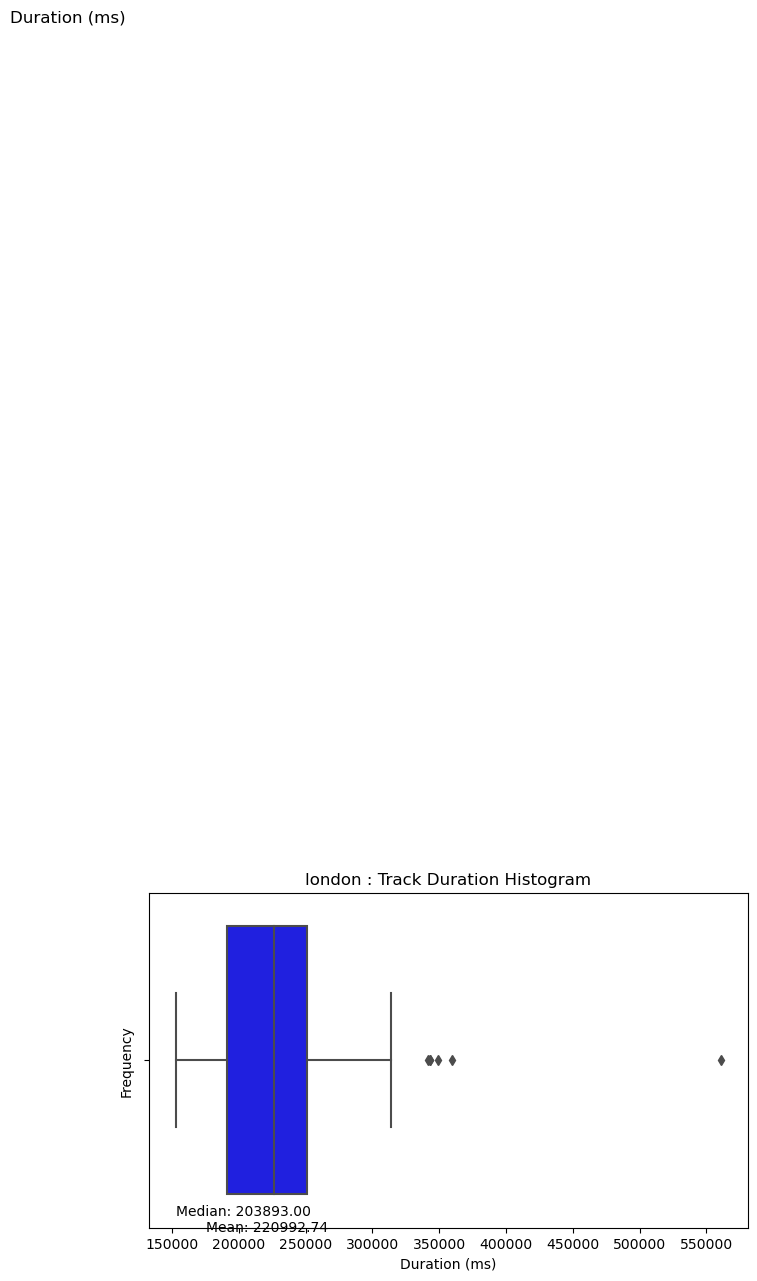

In [ ]:
plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Duration (ms)', y=0.92)

ax = plt.subplot(rows, cols, i+1)
ax.set_title(f"Feature: london", size=10)
sns.boxplot(london_snd_samp, x=london_snd_samp['duration_ms'], color='blue')  # Use specified color
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('london : Track Duration Histogram')
plt.ticklabel_format(style='plain', axis='x')

# Calculate mean and median
mean_value = sound['duration_ms'].mean()
median_value = sound['duration_ms'].median()

# Annotate the plot with mean and median values
ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

plt.show()

In [ ]:
# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

fig = go.Figure()

# Calculate mean and median
mean_value = london_snd_samp['duration_ms'].mean()
median_value = london_snd_samp['duration_ms'].median()

# Create box plot trace
box = go.Box(
    y=london_snd_samp['duration_ms'],
    name='london',
    marker=dict(color='blue'),
    text='Mean: {mean_value:.2f}<br>Median: {median_value:.2f}',  # Annotation text
    hoverinfo='text',
    boxmean=True  # Display mean line inside the box
)

fig.add_trace(box)

# Update layout
fig.update_layout(
    title='Duration (ms): Track Duration Boxplot',
    xaxis_title='Feature',
    yaxis_title='Duration (ms)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    height=600
)

fig.show()

In [ ]:

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

fig = go.Figure()

for sound, color, string in zip(sound_profile_list, colors, sound_profile_strings):
    # Calculate mean and median
    mean_value = sound['duration_ms'].mean()
    median_value = sound['duration_ms'].median()
    
    # Create box plot trace
    box = go.Box(
        y=sound['duration_ms'],
        name=f'{string} ({sound})',
        marker=dict(color=color),
        text=[f'Mean: {mean_value:.2f}<br>Median: {median_value:.2f}' for _ in range(len(sound))],  # Annotation text
        hoverinfo='text',
        boxmean=True  # Display mean line inside the box
    )
    
    fig.add_trace(box)

# Update layout
fig.update_layout(
    title='Duration (ms): Track Duration Boxplot',
    xaxis_title='Feature',
    yaxis_title='Duration (ms)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    height=600
)

fig.show()
print(f'london mean duration: {sound_profile_list[0]['duration_ms']}')

In [ ]:
sound_profile_list[0]['duration_ms']

213177    259387
213178    187040
213179    187680
213180    237733
213181    233373
213182    182293
213183    237653
138754    231427
213184    217360
213185    251800
213186    202735
198427    241893
44637     248595
30634     212440
70607     195373
213187    180267
213188    203733
99582     182387
185814    160280
213189    229840
100809    359930
30773     241505
213190    213622
213191    283067
46228     291019
144092    233733
213192    214947
213193    257187
213194    155413
213195    153173
213196    182707
213197    253720
213198    222933
213199    224133
213200    247011
213201    163240
213202    188240
213203    274027
213204    240560
213205    189973
203779    213733
12570     245427
213206    184520
213207    194667
213208    214933
213209    196827
127570    155067
213210    189827
148126    198507
213211    342000
213212    238427
213213    348973
213214    560681
213215    228514
213216    343506
29655     281371
213217    343342
213218    314185
Name: duration

In [ ]:

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

fig = go.Figure()

for sound, color, string in zip(sound_profile_list, colors, sound_profile_strings):
    # Calculate mean and median
    mean_value = sound['tempo'].mean()
    median_value = sound['tempo'].median()
    
    # Create box plot trace
    box = go.Box(
        y=sound['tempo'],
        name=f'{string} ({sound})',
        marker=dict(color=color),
        text=[f'Mean: {mean_value:.2f}<br>Median: {median_value:.2f}' for _ in range(len(sound))],  # Annotation text
        hoverinfo='text',
        boxmean=True  # Display mean line inside the box
    )
    
    fig.add_trace(box)

# Update layout
fig.update_layout(
    title='Tempo (bpm): Track Duration Boxplot',
    xaxis_title='Feature',
    yaxis_title='Tempo (bpm)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    height=600
)

fig.show()

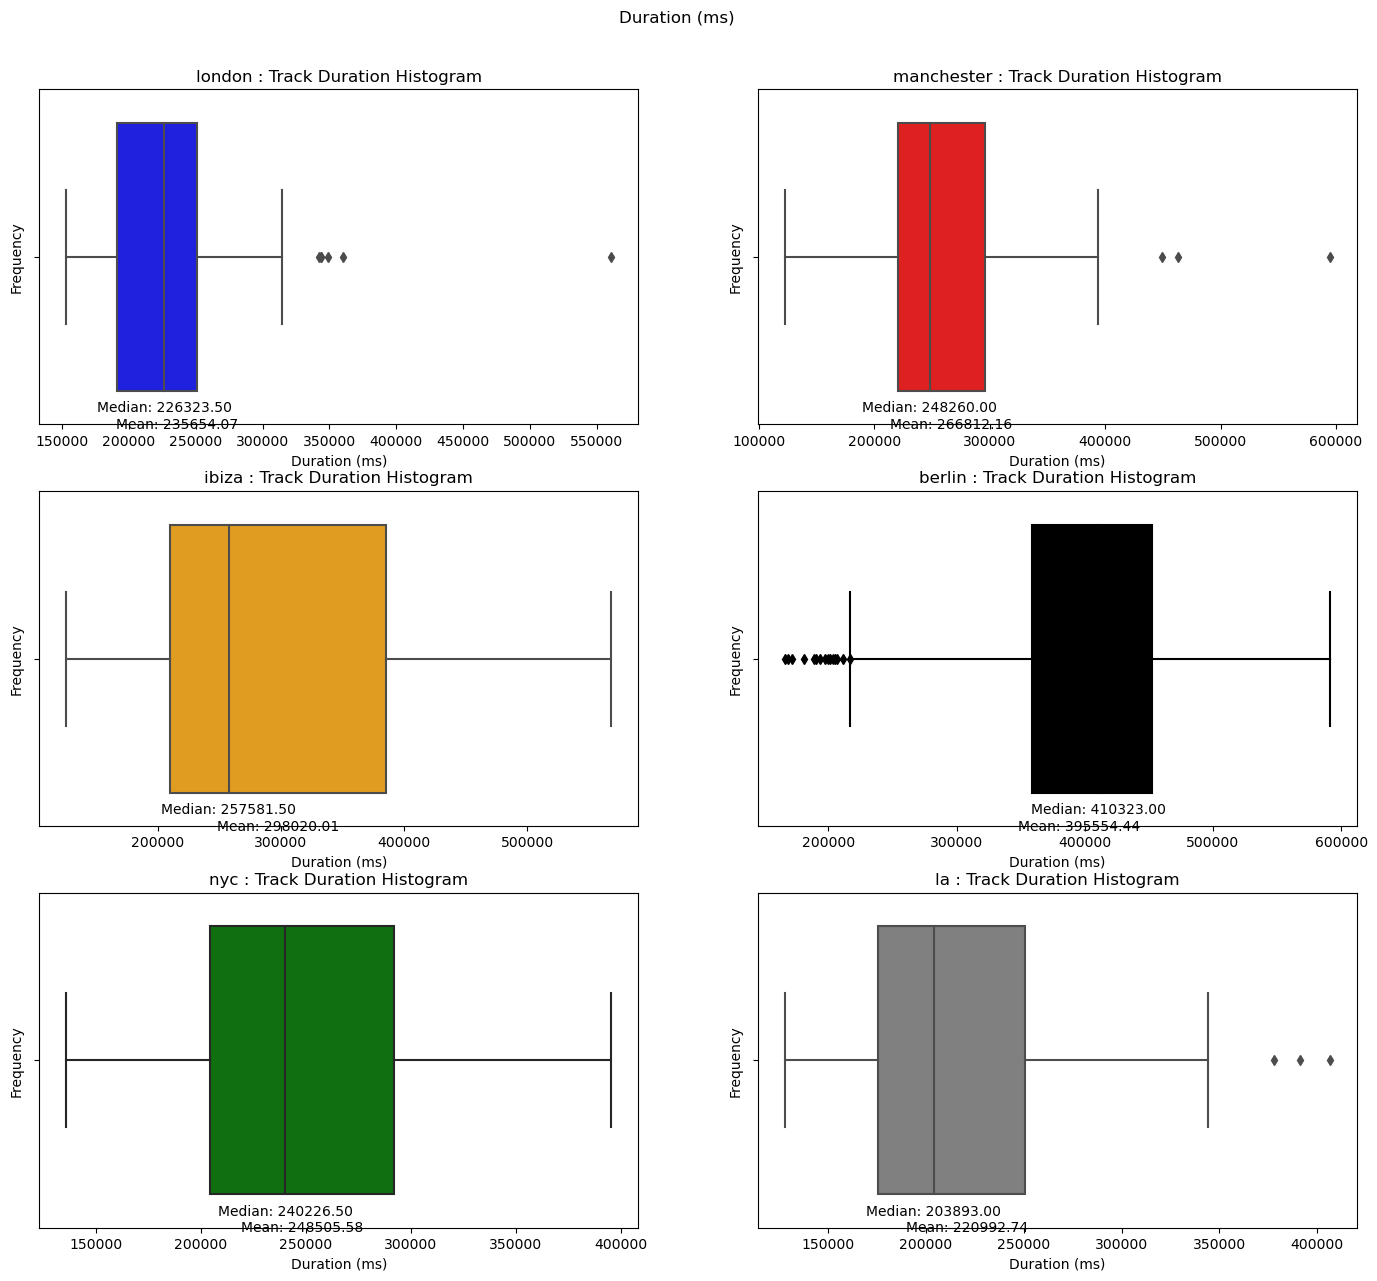

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Duration (ms)', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['duration_ms'], color=color)  # Use specified color
    plt.xlabel('Duration (ms)')
    plt.ylabel('Frequency')
    plt.title(f'{string} : Track Duration Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['duration_ms'].mean()
    median_value = sound['duration_ms'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


for i, (sound, string) in enumerate(zip(sound_profile_list, sound_profile_strings)):
    print(f"{string.upper()}")
    b3.df_numstats(sound[['duration_ms']])

#### Duration - PCA

#### Tempo.

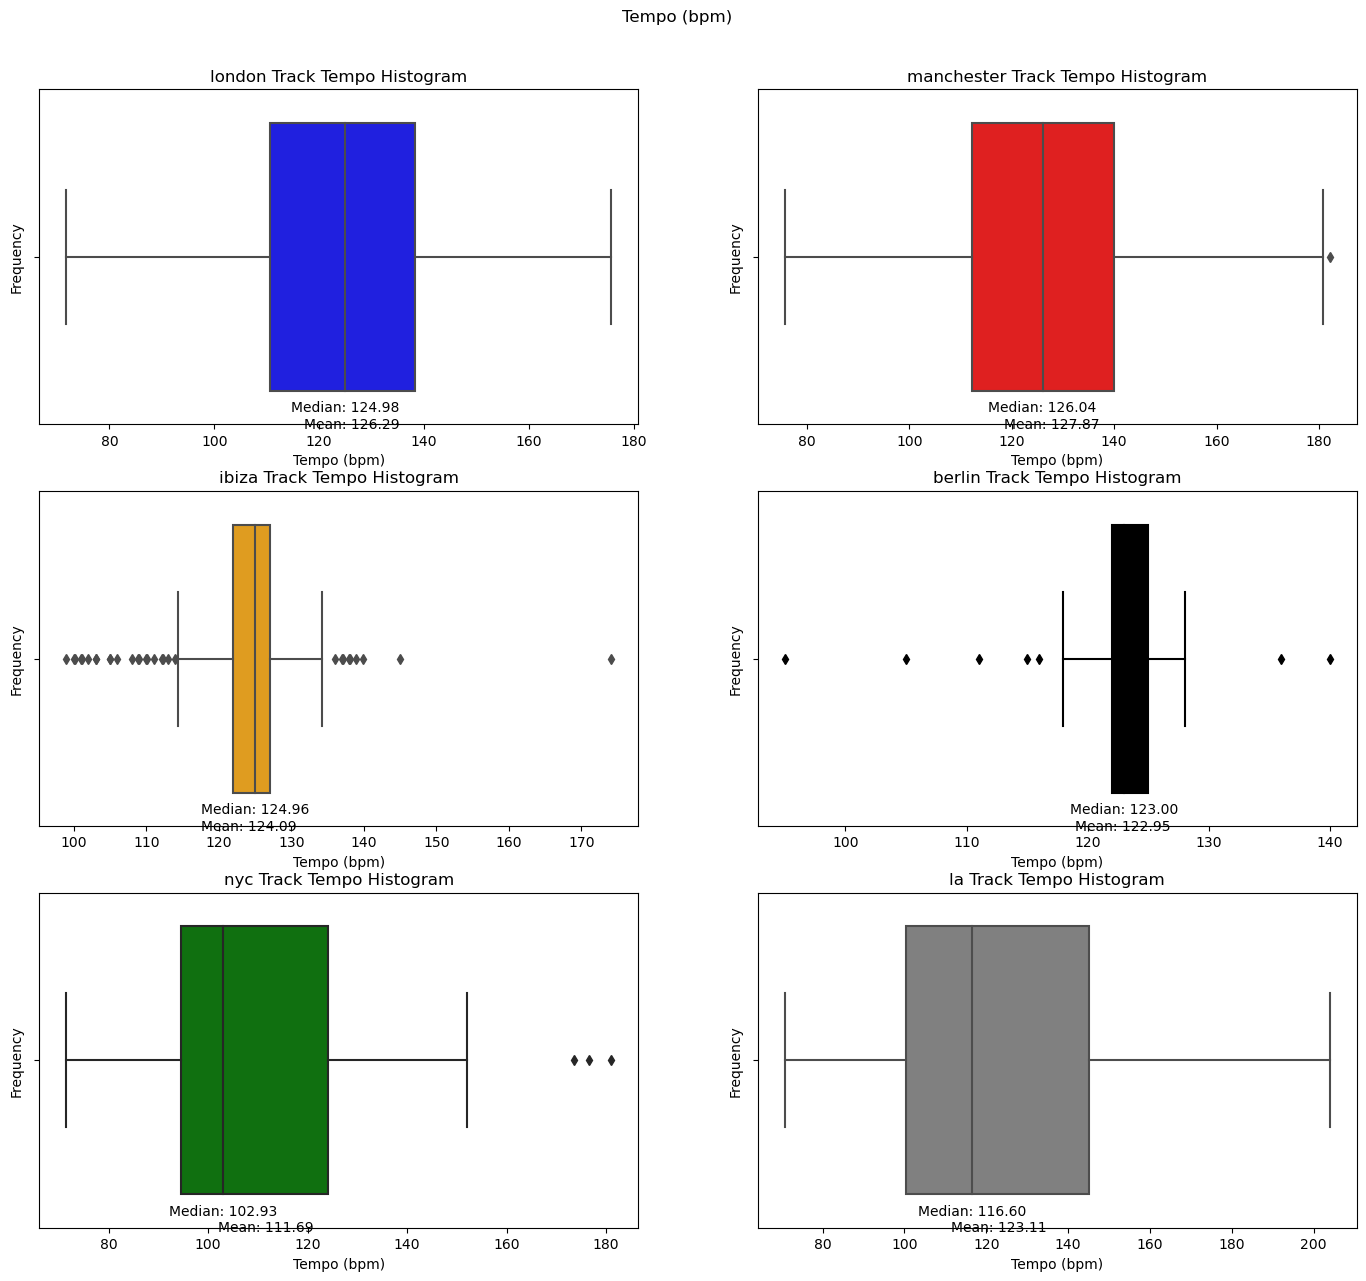

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Tempo (bpm)', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['tempo'], color=color)  # Use specified color
    plt.xlabel('Tempo (bpm)')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Tempo Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['tempo'].mean()
    median_value = sound['tempo'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


#### Loudness.

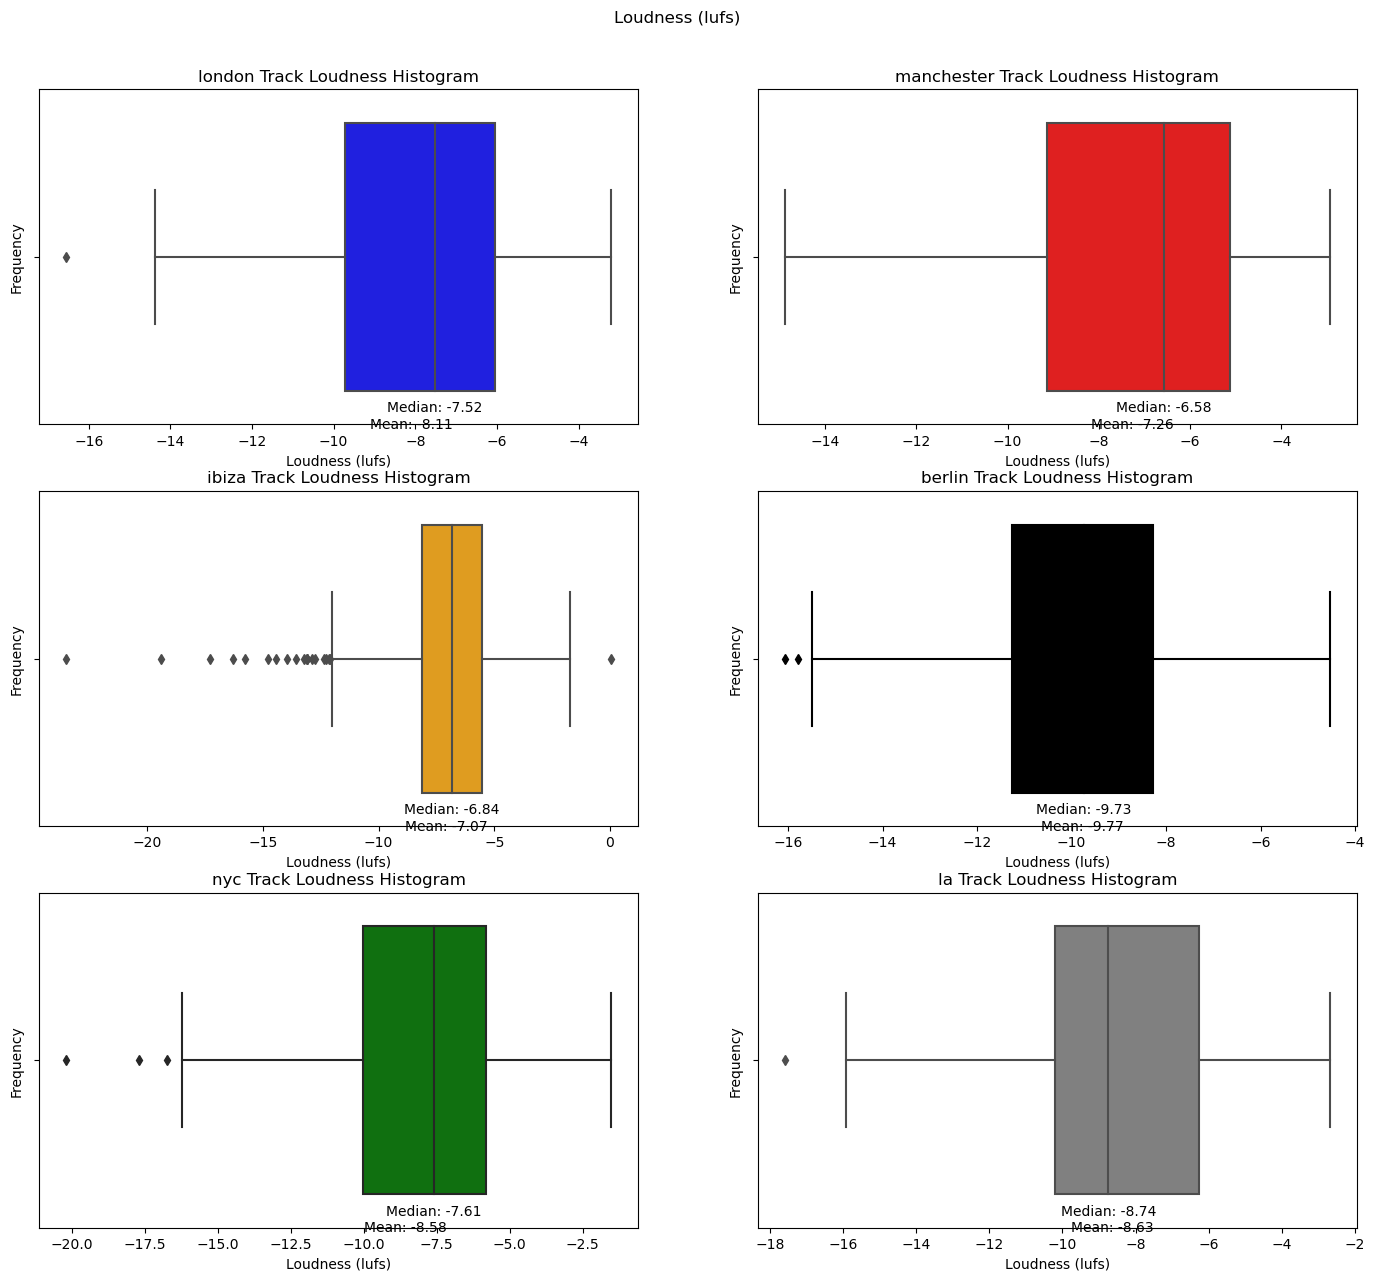

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Loudness (lufs)', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['loudness'], color=color)  # Use specified color
    plt.xlabel('Loudness (lufs)')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Loudness Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['loudness'].mean()
    median_value = sound['loudness'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


#### Energy.

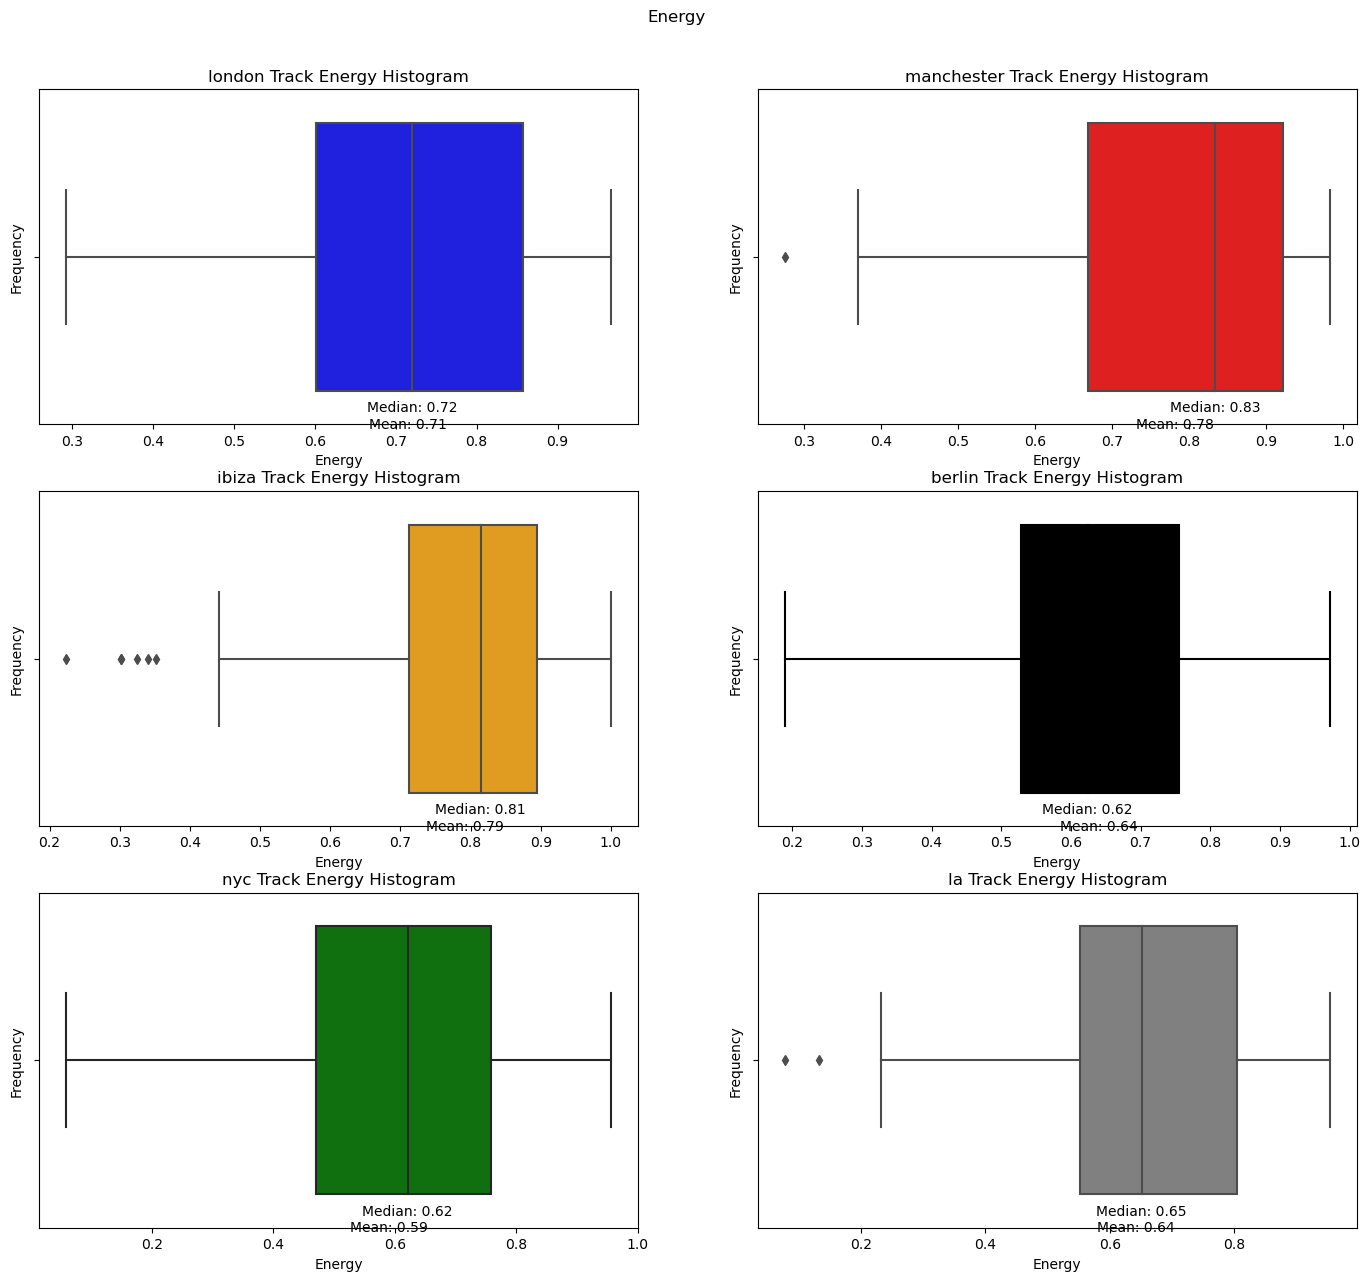

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Energy', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['energy'], color=color)  # Use specified color
    plt.xlabel('Energy')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Energy Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['energy'].mean()
    median_value = sound['energy'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


#### Valence

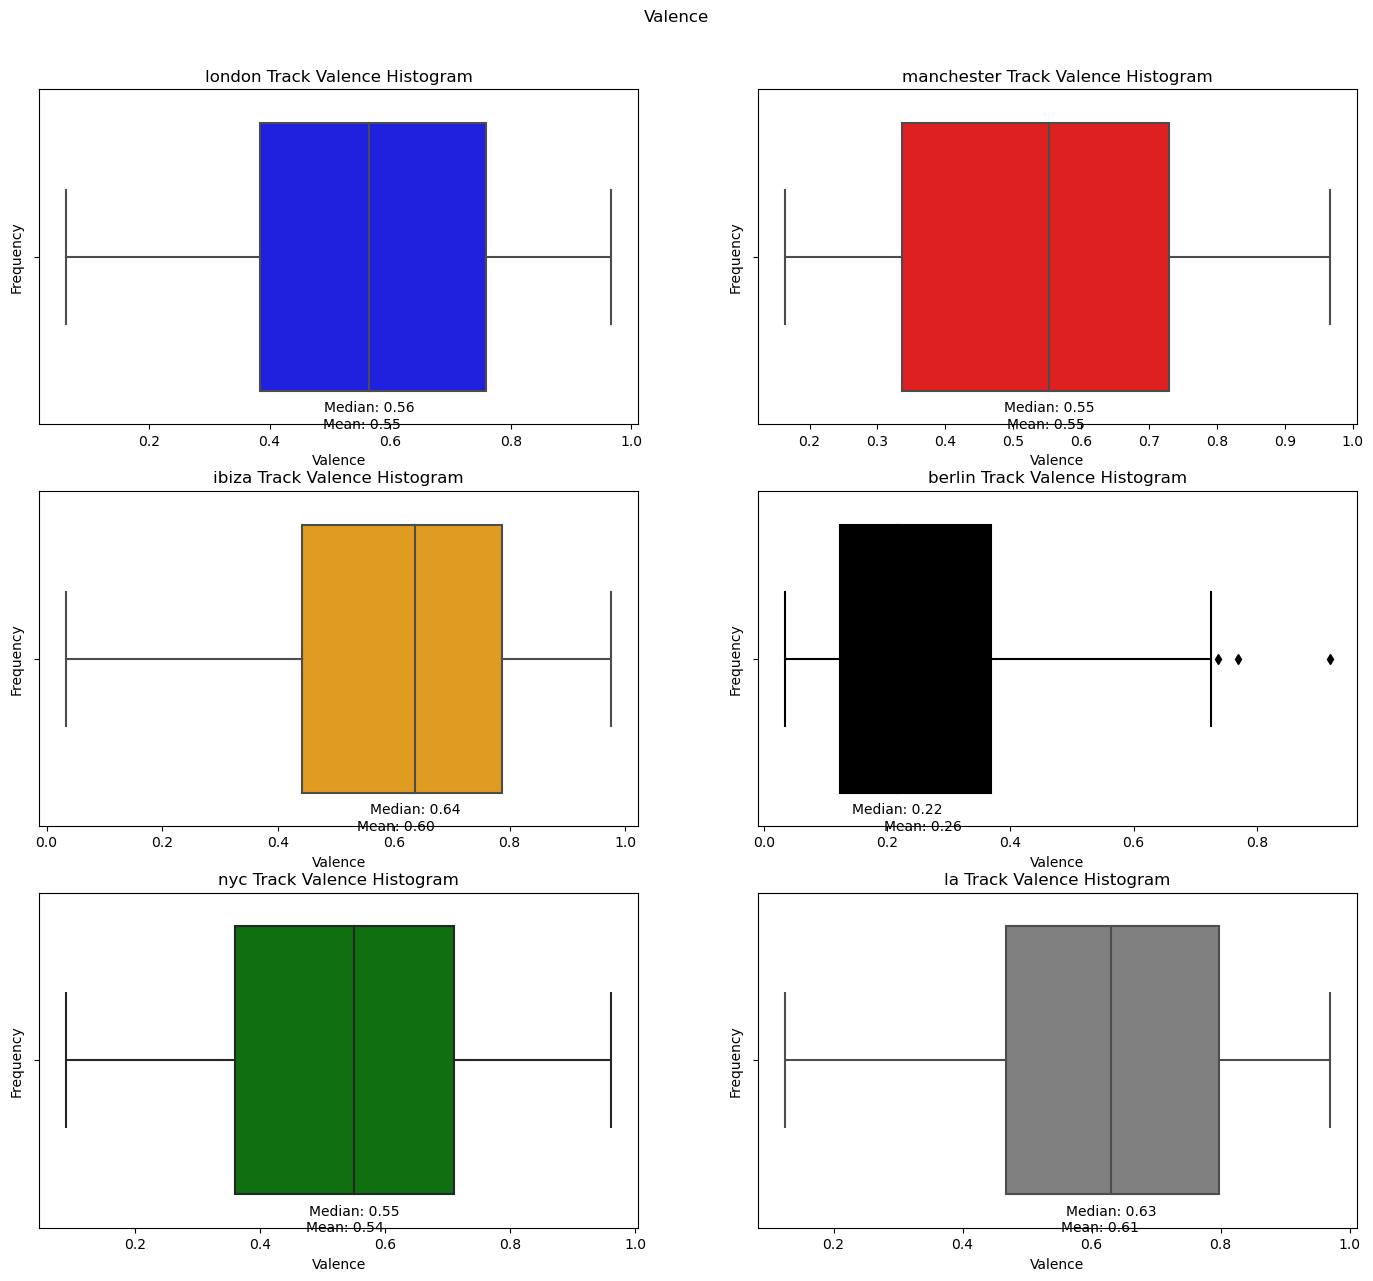

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Valence', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['valence'], color=color)  # Use specified color
    plt.xlabel('Valence')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Valence Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['valence'].mean()
    median_value = sound['valence'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


#### Danceability

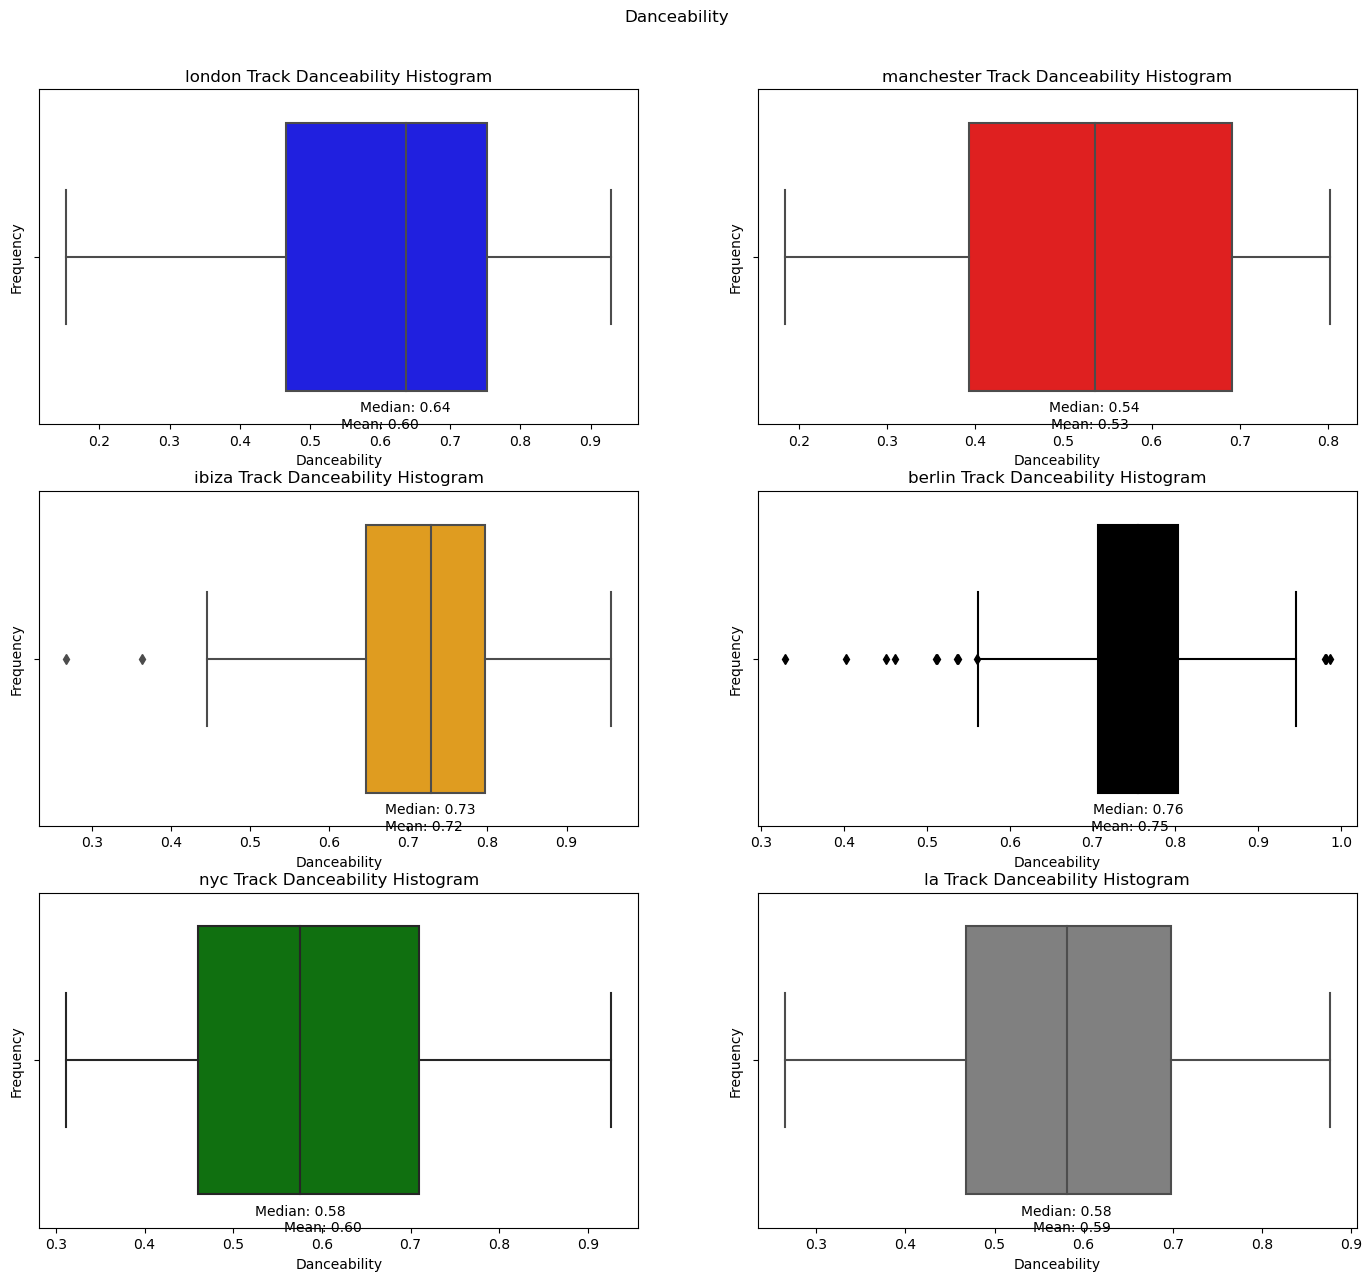

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Danceability', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['danceability'], color=color)  # Use specified color
    plt.xlabel('Danceability')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Danceability Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['danceability'].mean()
    median_value = sound['danceability'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


#### Speechiness

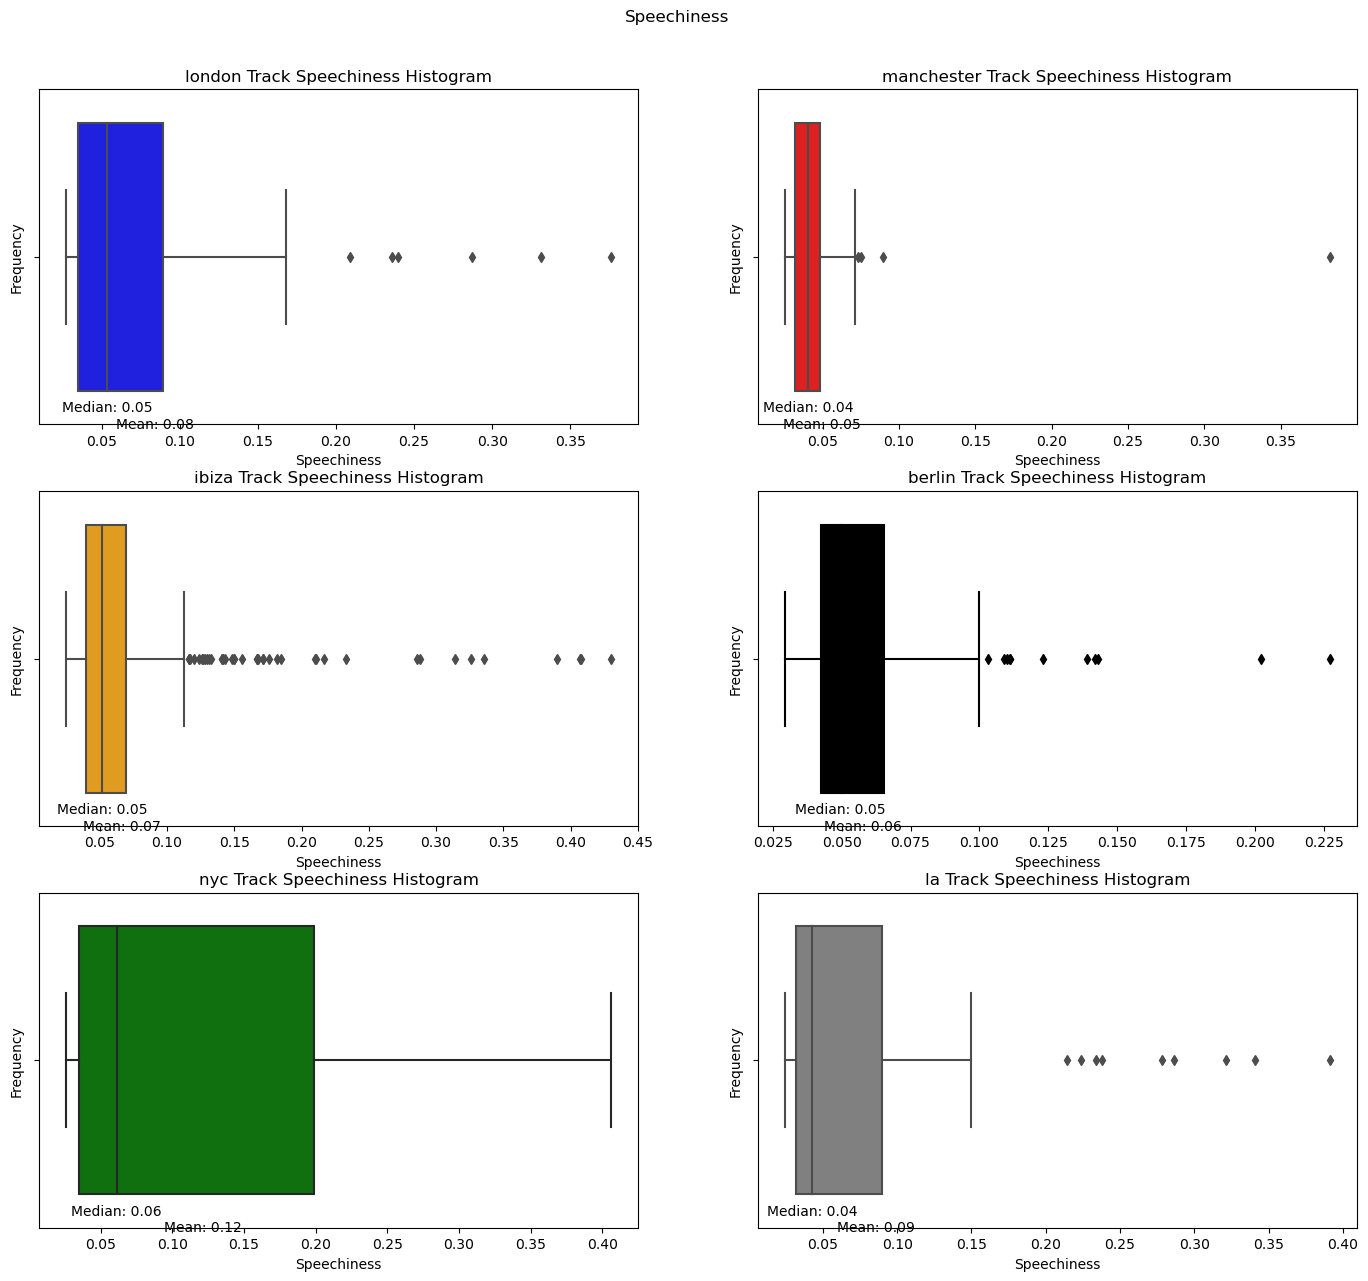

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Speechiness', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['speechiness'], color=color)  # Use specified color
    plt.xlabel('Speechiness')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Speechiness Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['speechiness'].mean()
    median_value = sound['speechiness'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


#### Instrumentalness

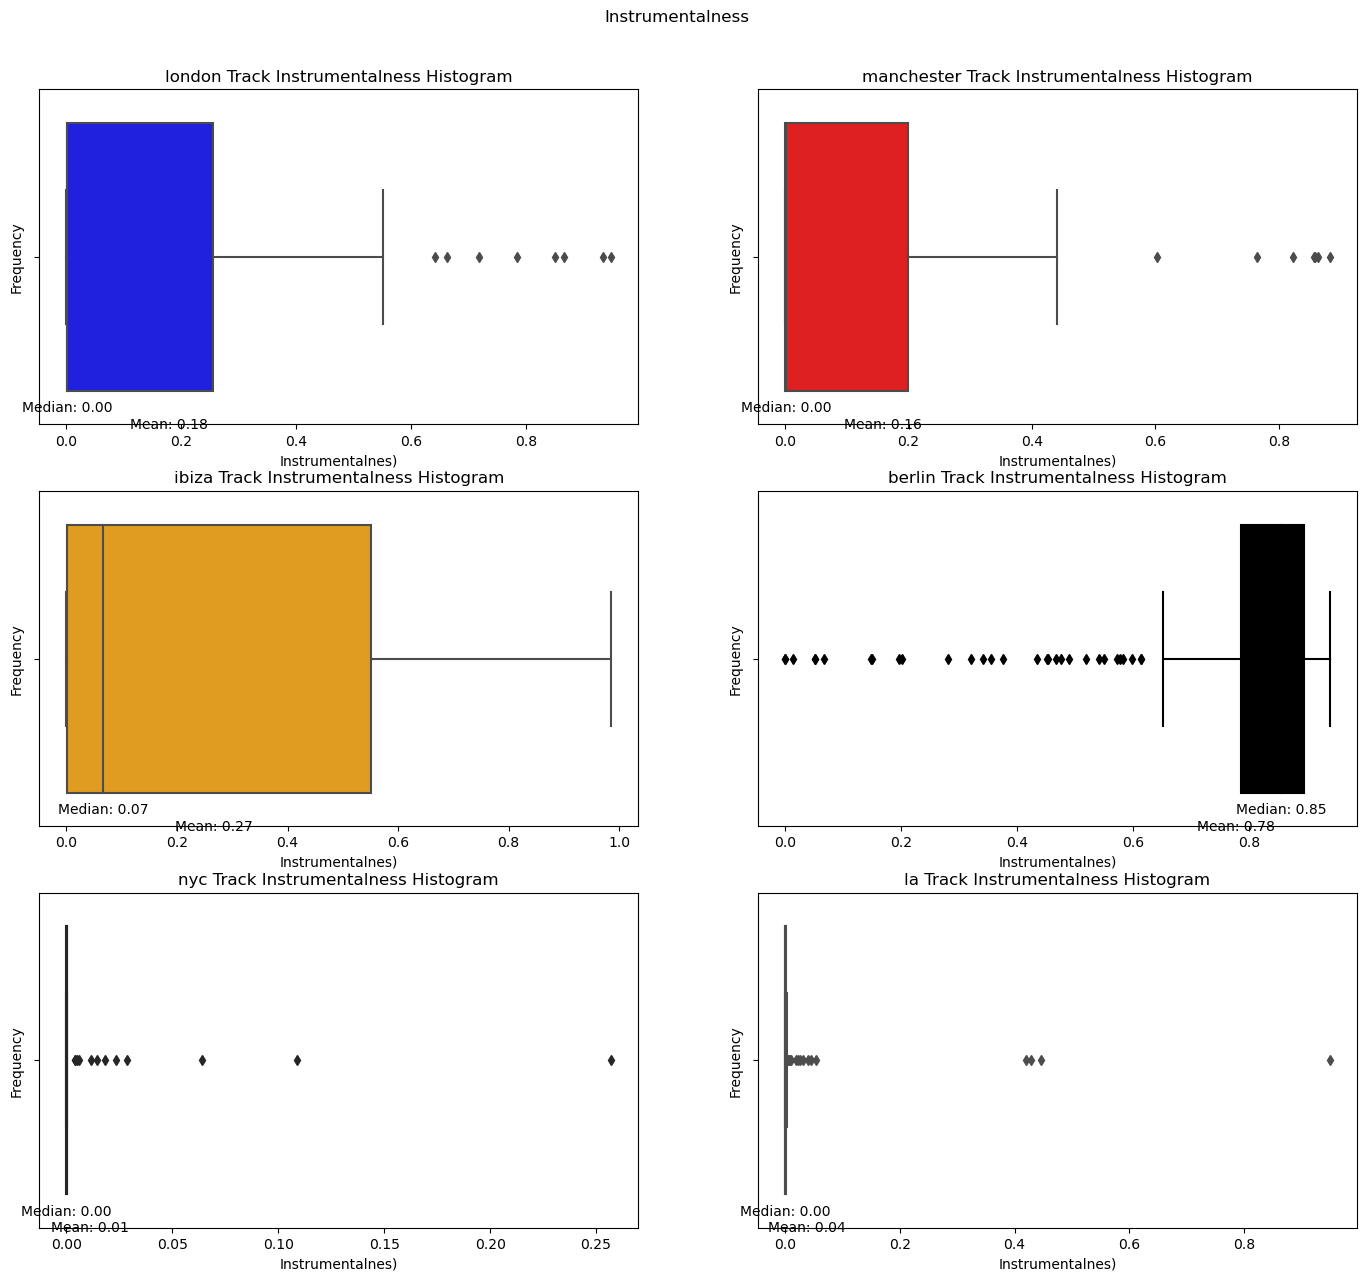

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Instrumentalness', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['instrumentalness'], color=color)  # Use specified color
    plt.xlabel('Instrumentalnes)')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Instrumentalness Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['instrumentalness'].mean()
    median_value = sound['instrumentalness'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


#### Acousticness

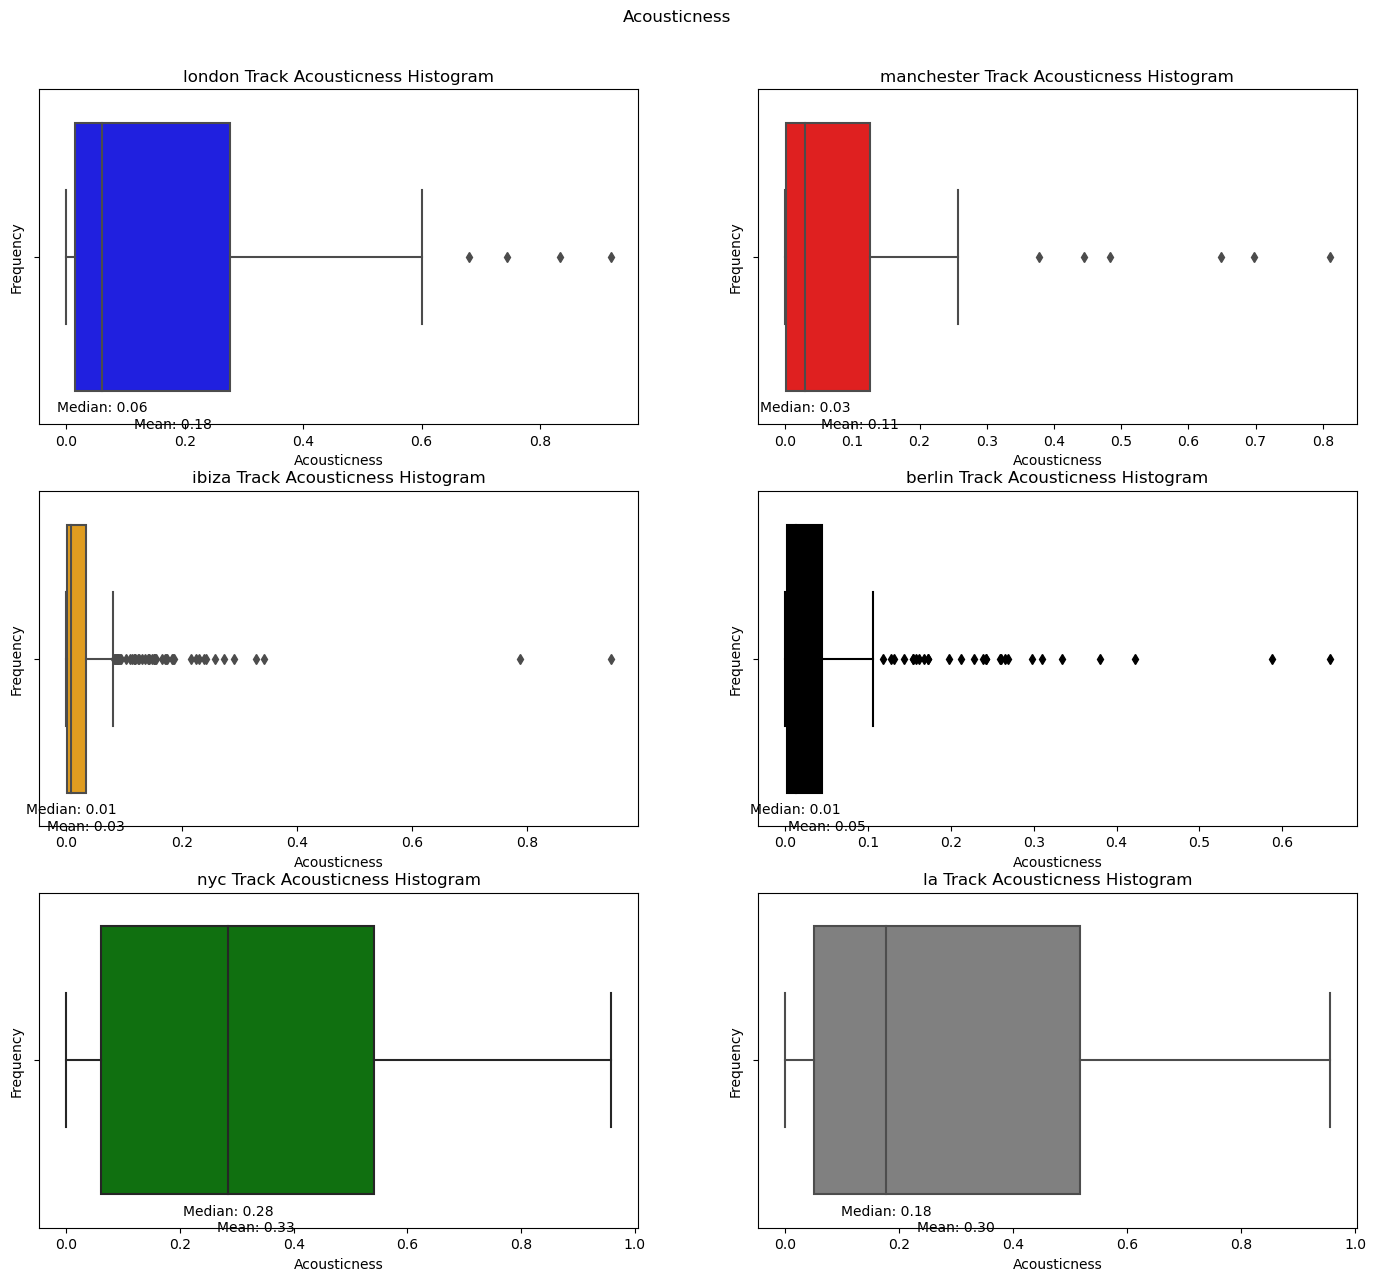

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Acousticness', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['acousticness'], color=color)  # Use specified color
    plt.xlabel('Acousticness')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Acousticness Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['acousticness'].mean()
    median_value = sound['acousticness'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


#### Liveness

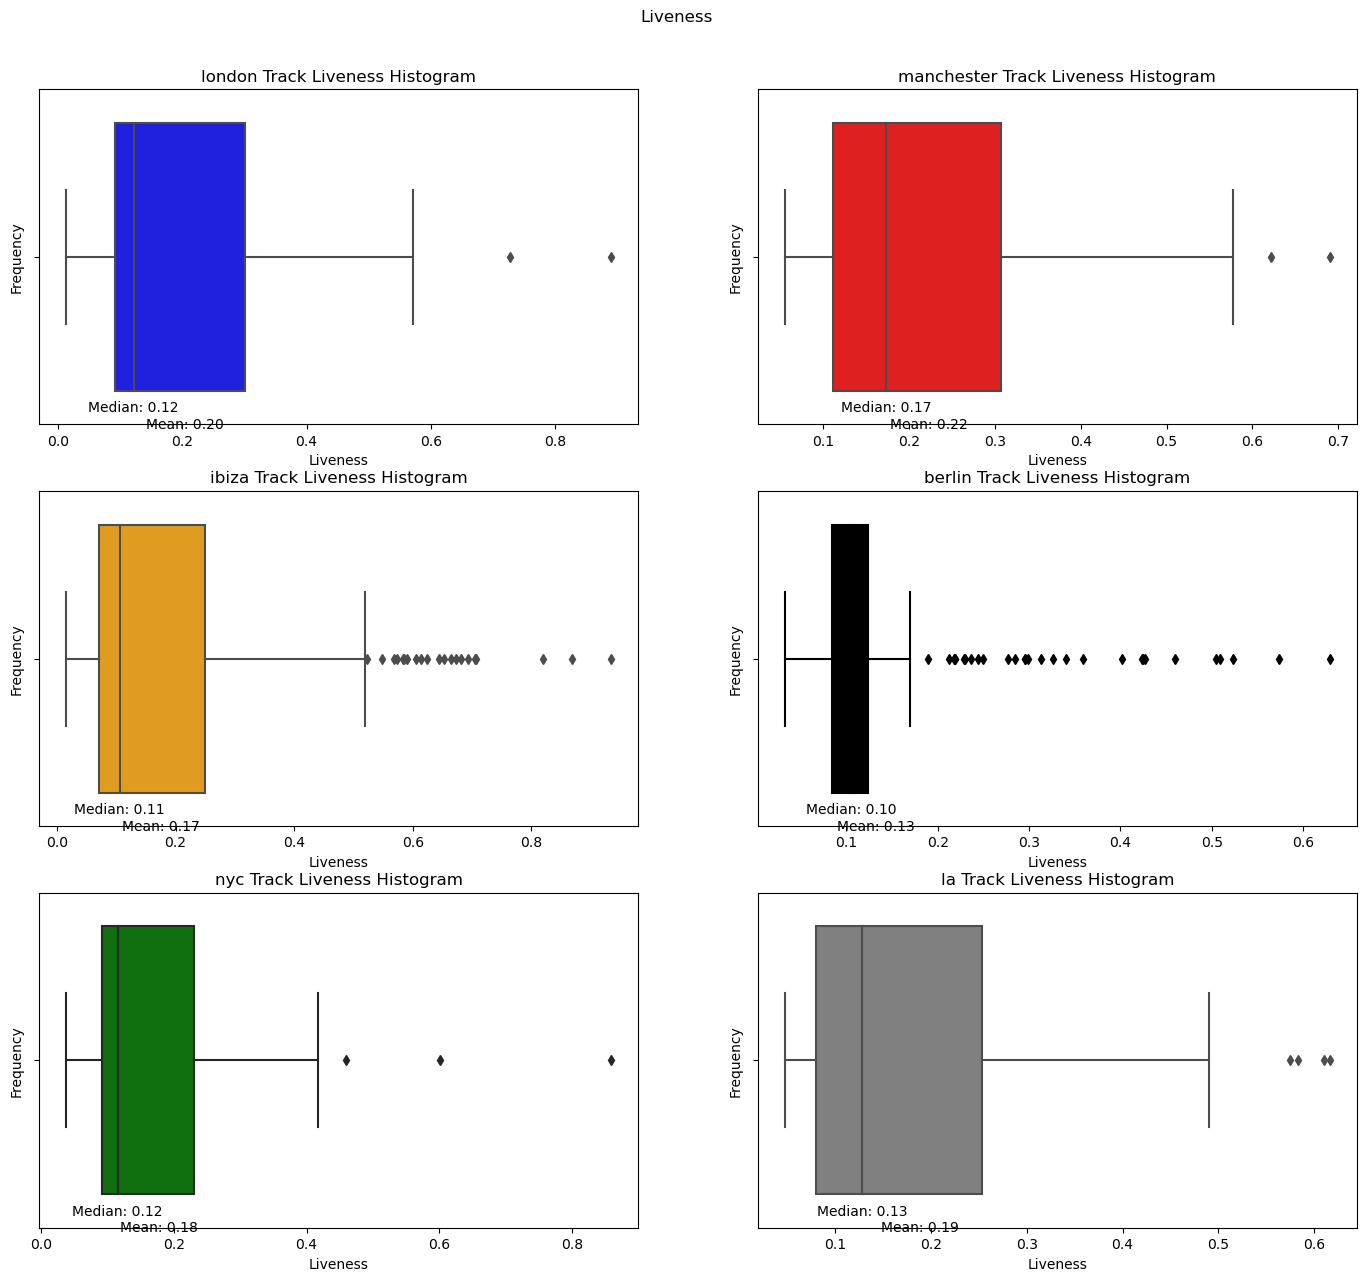

In [ ]:
import seaborn as sns

# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Liveness', y=0.92)

for i, (sound, color, string) in enumerate(zip(sound_profile_list, colors, sound_profile_strings)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['liveness'], color=color)  # Use specified color
    plt.xlabel('Liveness')
    plt.ylabel('Frequency')
    plt.title(f'{string} Track Liveness Histogram')
    plt.ticklabel_format(style='plain', axis='x')
    
    # Calculate mean and median
    mean_value = sound['liveness'].mean()
    median_value = sound['liveness'].median()
    
    # Annotate the plot with mean and median values
    ax.text(mean_value, 0.5, f'Mean: {mean_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    ax.text(median_value, 0.45, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    
plt.show()


In [ ]:
london_snd_samp

artist_name                                         track_name  \
232781                Blur                                       Girls & Boys   
232782                Blur                                           Parklife   
232783                Blur                                          Good Song   
232784                Blur                                      Country House   
232785                Blur                                        Out of Time   
232786         David Bowie                                    Valentine's Day   
232787         David Bowie                        Modern Love - 2002 Remaster   
151500         David Bowie                This Is Not America - 2002 Remaster   
232788         David Bowie             Heroes - Single Version; 2002 Remaster   
232789         David Bowie                               Fame - 1999 Remaster   
232790          Elton John                            Cold Heart - PNAU Remix   
216773          Elton John         Can You Feel The Love Tonight - Remastered   
48760           Elton John                  Hold Me Closer - Joel Corry Remix   
33515           Elton John               Are You Ready For Love? - Remastered   
77091           Elton John                              Cold Heart - Acoustic   
232791      The Libertines                       Don't Look Back into the Sun   
232792      The Libertines                                 Can't Stand Me Now   
108757      The Libertines                       Music When The Lights Go Out   
202916      The Libertines                                    Time for Heroes   
232793      The Libertines                                     What Katie Did   
110093            Jamie xx                          All Under One Roof Raving   
33665             Jamie xx                                               Girl   
232794            Jamie xx               I Know There's Gonna Be (Good Times)   
232795            Jamie xx                                        Loud Places   
50499             Jamie xx                                               Gosh   
157327       Amy Winehouse  Valerie - Live At BBC Radio 1 Live Lounge, Lon...   
232796       Amy Winehouse                                              Rehab   
232797       Amy Winehouse                               You Know I'm No Good   
232798       Amy Winehouse                              Love Is A Losing Game   
232799       Amy Winehouse                                      Me & Mr Jones   
232800  The Rolling Stones                                   Honky Tonk Women   
232801  The Rolling Stones                                    She's A Rainbow   
232802  The Rolling Stones                                 Jumpin' Jack Flash   
232803  The Rolling Stones   Paint It, Black - (Original Single Mono Version)   
232804  The Rolling Stones                             Living In A Ghost Town   
232805           The Clash                                   I Fought the Law   
232806           The Clash          Should I Stay or Should I Go - Remastered   
232807           The Clash                                         Bankrobber   
232808           The Clash                  (White Man) in Hammersmith Palais   
232809           The Clash           Train in Vain (Stand by Me) - Remastered   
222626         Sex Pistols                                  Anarchy In the UK   
13795          Sex Pistols                           My Way - Remastered 2012   
232810         Sex Pistols                        I'm Not Your Stepping Stone   
232811         Sex Pistols                                             My Way   
232812         Sex Pistols                                I Wanna Be Your Dog   
232813       Dizzee Rascal                                             Live O   
232814       Dizzee Rascal                    Fix Up, Look Sharp - Radio Edit   
139263       Dizzee Rascal                               I Luv U - Radio Edit   
232815       Dizzee Rascal                    

b3.df_numstats(df[['duration_ms']])

#### Genre

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1160378 non-null  object 
 1   track_name        1160378 non-null  object 
 2   genre             1160378 non-null  object 
 3   year              1160378 non-null  int64  
 4   duration_ms       1160378 non-null  int64  
 5   tempo             1160378 non-null  float64
 6   time_signature    1160378 non-null  int64  
 7   key               1160378 non-null  int64  
 8   mode              1160378 non-null  object 
 9   loudness          1160378 non-null  float64
 10  popularity        1160378 non-null  int64  
 11  liveness          1160378 non-null  float64
 12  acousticness      1160378 non-null  float64
 13  speechiness       1160378 non-null  float64
 14  instrumentalness  1160378 non-null  float64
 15  energy            1160378 non-null  float64
 16  

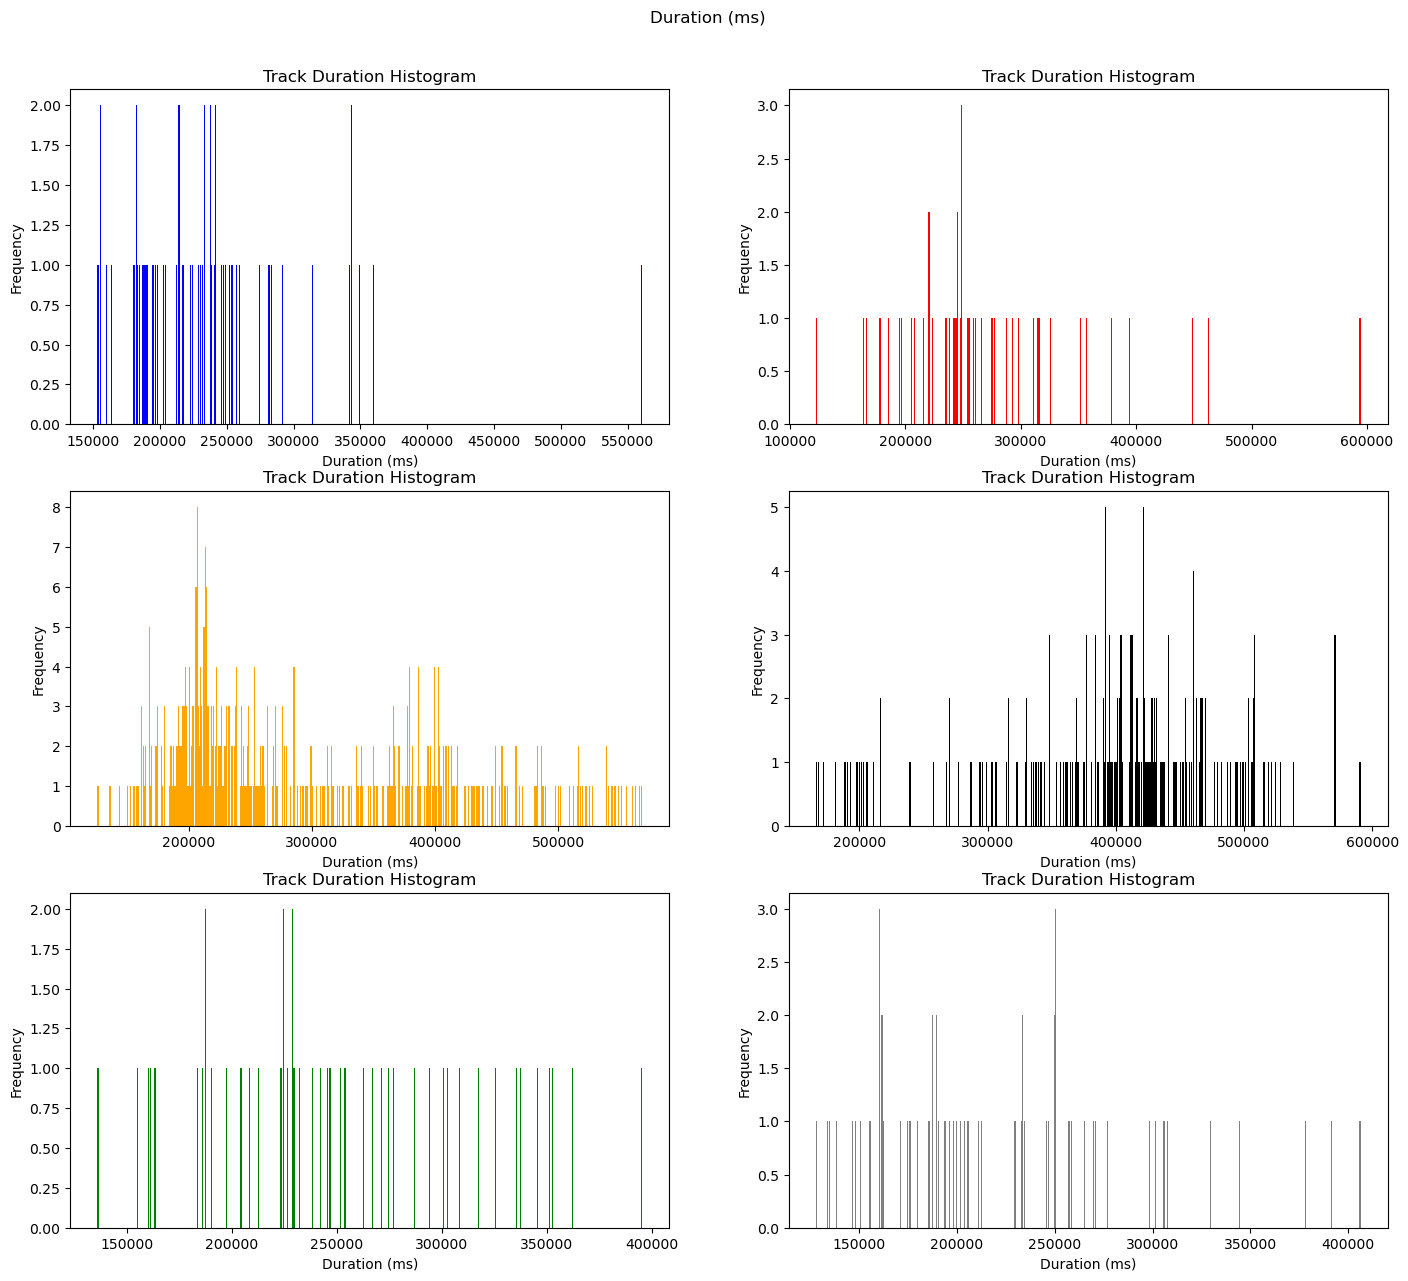

In [ ]:
# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Duration (ms)', y=0.92)

for i, (sound, color) in enumerate(zip(sound_profile_list, colors)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    plt.hist(sound['duration_ms'], bins=500, color=color)  # Use specified color
    plt.xlabel('Duration (ms)')
    plt.ylabel('Frequency')
    plt.title('Track Duration Histogram')
    plt.ticklabel_format(style='plain', axis='x')

plt.show()


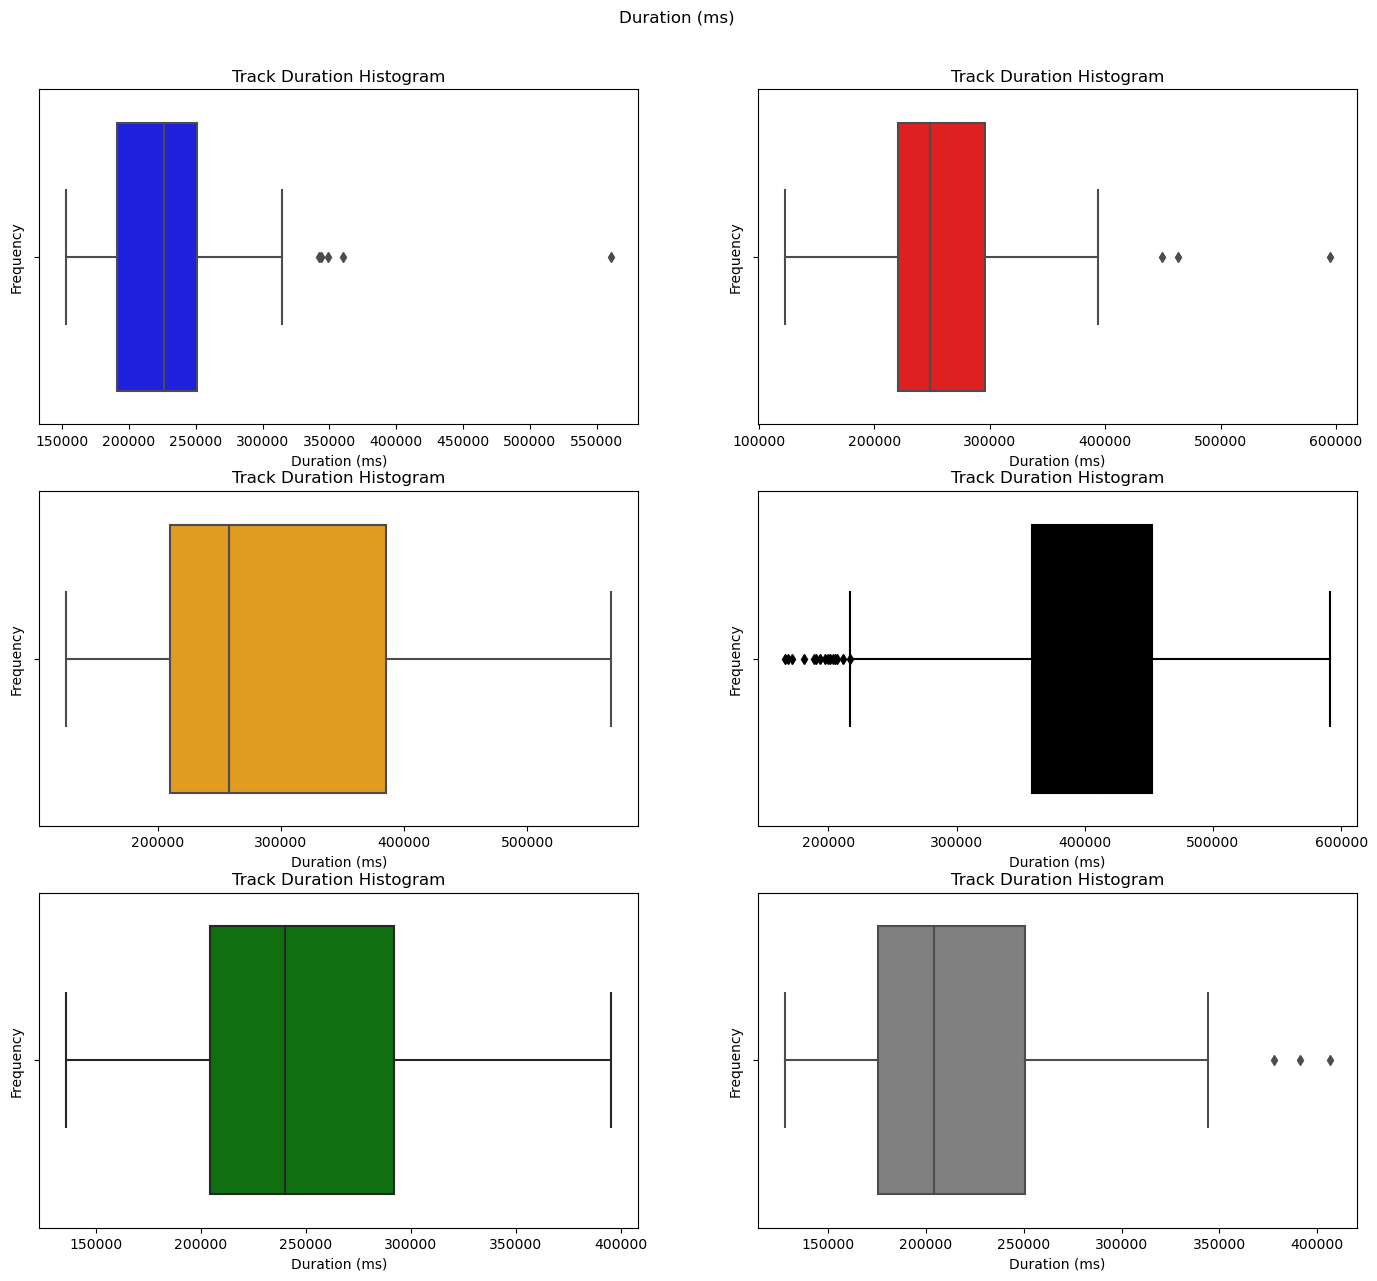

In [ ]:
# Define the colors for each plot
colors = ['blue', 'red', 'orange', 'black', 'green', 'grey', 'purple']  # Add more colors as needed

# create a subplots structure with 2 columns
cols = 2
rows = len(sound_profile_list)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.suptitle('Duration (ms)', y=0.92)

for i, (sound, color) in enumerate(zip(sound_profile_list, colors)):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {sound}", size=10)
    sns.boxplot(sound, x=sound['duration_ms'], color=color)  # Use specified color
    plt.xlabel('Duration (ms)')
    plt.ylabel('Frequency')
    plt.title('Track Duration Histogram')
    plt.ticklabel_format(style='plain', axis='x')

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160378 entries, 0 to 1160377
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1160378 non-null  object 
 1   track_name        1160378 non-null  object 
 2   genre             1160378 non-null  object 
 3   year              1160378 non-null  int64  
 4   duration_ms       1160378 non-null  int64  
 5   tempo             1160378 non-null  float64
 6   time_signature    1160378 non-null  int64  
 7   key               1160378 non-null  int64  
 8   mode              1160378 non-null  object 
 9   loudness          1160378 non-null  float64
 10  popularity        1160378 non-null  int64  
 11  liveness          1160378 non-null  float64
 12  acousticness      1160378 non-null  float64
 13  speechiness       1160378 non-null  float64
 14  instrumentalness  1160378 non-null  float64
 15  energy            1160378 non-null  float64
 16  

#### Get track archetype stats

In [ ]:
london_snd_samp_num

duration_ms    tempo  loudness  energy  valence  danceability  \
213177       259387  120.048    -8.354   0.875   0.8990         0.693   
213178       187040  138.391    -6.905   0.877   0.7490         0.632   
213179       187680  168.544    -9.113   0.493   0.7190         0.651   
213180       237733  174.987    -6.660   0.895   0.6770         0.341   
213181       233373  138.650    -8.581   0.456   0.3190         0.528   
213182       182293   95.964    -5.409   0.752   0.5100         0.563   
213183       237653   91.128    -8.214   0.915   0.9560         0.468   
138754       231427  115.284   -11.917   0.674   0.6500         0.715   
213184       217360  112.640    -8.242   0.766   0.6110         0.506   
213185       251800   95.755    -7.854   0.694   0.6270         0.783   
213186       202735  116.032    -6.312   0.798   0.9420         0.796   
198427       241893  123.958    -7.708   0.379   0.1480         0.299   
44637        248595  125.994    -5.439   0.887   0.1170         0.642   
30634        212440  116.511    -5.179   0.719   0.7720         0.799   
70607        195373  116.059    -4.935   0.512   0.3950         0.641   
213187       180267  175.616    -3.994   0.849   0.5900         0.211   
213188       203733  164.427    -3.207   0.936   0.5680         0.368   
99582        182387  111.088    -6.077   0.693   0.4880         0.419   
185814       160280  152.395    -4.157   0.925   0.7120         0.344   
213189       229840  169.350    -6.404   0.587   0.4510         0.452   
100809       359930  116.871   -11.173   0.797   0.0633         0.820   
30773        241505  101.601   -11.595   0.602   0.4510         0.359   
213190       213622   89.606    -9.919   0.597   0.4860         0.657   
213191       283067  109.018   -10.748   0.630   0.1640         0.646   
46228        291019  139.450   -12.285   0.459   0.3800         0.752   
144092       233733   96.574    -5.743   0.371   0.6840         0.772   
213192       214947   71.815   -13.609   0.558   0.7770         0.407   
213193       257187  103.372   -14.222   0.496   0.7990         0.694   
213194       155413  165.008   -16.544   0.293   0.5620         0.484   
213195       153173   87.837   -13.165   0.486   0.5130         0.583   
213196       182707  119.285    -6.669   0.721   0.9660         0.560   
213197       253720  109.298    -7.359   0.824   0.5390         0.464   
213198       222933  137.243    -7.688   0.885   0.6430         0.595   
213199       224133  159.694    -7.927   0.859   0.7680         0.496   
213200       247011  110.558    -5.369   0.697   0.7760         0.679   
213201       163240  151.279    -6.815   0.900   0.8830         0.526   
213202       188240  113.373    -6.442   0.838   0.8480         0.742   
213203       274027  140.275    -9.108   0.614   0.6130         0.622   
213204       240560  102.769    -6.398   0.694   0.8320         0.692   
213205       189973  122.758    -8.711   0.717   0.9620         0.764   
203779       213733  133.727    -5.827   0.832   0.1740         0.153   
12570        245427  174.766    -7.801   0.834   0.2390         0.251   
213206       184520  137.964    -7.034   0.868   0.3520         0.199   
213207       194667  139.171    -6.031   0.700   0.2810         0.316   
213208       214933  138.004    -4.388   0.966   0.5900         0.897   
213209       196827  104.789   -10.230   0.586   0.2900         0.921   
127570       155067  136.054    -3.768   0.902   0.9600         0.754   
213210       189827  134.996    -4.552   0.925   0.7450         0.895   
148126       198507  100.051    -6.085   0.713   0.5550         0.929   
213211       342000  127.991   -13.982   0.759   0.1290         0.675   
213212       238427  135.207   -10.184   0.852   0.5130         0.622   
213213       348973  117.316   -14.373   0.510   0.1870         0.466   
213214       560681  117.458   -13.917   0.607   0.4740         0.915   
213215       228514  131.039    -5.335   0.746   0.3970         0.

lon_snd_index_samp
man_snd_index_samp
bza_snd_index_samp
ber_snd_index_samp
kng_snd_index_samp
nyc_snd_index_samp
la_snd_index_samp
comb_snd_index_samp

london_snd_samp (58)
manchester_snd_samp (50)
ibiza_snd_samp (432)
berlin_snd_samp (199)
kingston_snd_samp (76)
nyc_snd_samp (50)
la_snd_samp (65)
combined_snd_samp (930)

### 4. **Preprocessing**

#### Mode.
- Here we'll need to one hot encode

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
mode = pd.DataFrame(df20["mode"])
encoded_y = ohe.fit_transform(mode)
encoded_y

<214956x2 sparse matrix of type '<class 'numpy.float64'>'
	with 214956 stored elements in Compressed Sparse Row format>

In [ ]:
# Convert from sparse matrix to dense
dense_array_y = encoded_y.toarray()
dense_array_y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
# Put into a dataframe to get column names
encoded_df_y = pd.DataFrame(dense_array_y, columns=[str(mode) for mode in list(ohe.categories_[0])], dtype=int)
encoded_df_y.head()

Major  Minor
0      0      1
1      1      0
2      1      0
3      0      1
4      1      0

In [ ]:
# Add prefix
encoded_df_y.columns = ["mode_"+str(mode) for mode in encoded_df_y.columns]
encoded_df_y.columns

Index(['mode_Major', 'mode_Minor'], dtype='object')

In [ ]:
# Add original back in (just to check)
encoded_df_y['mode_check'] = df20['mode']

# Show
encoded_df_y.head()

mode_Major  mode_Minor mode_check
0           0           1      Minor
1           1           0      Major
2           1           0      Major
3           0           1      Minor
4           1           0      Major

In [ ]:
encoded_df_y.drop(columns="mode_check", inplace=True)

In [ ]:
encoded_df_y.shape

(214956, 2)

In [ ]:
df20.shape

(214956, 21)

In [ ]:
df20.reset_index(drop=True, inplace=True)

In [ ]:
encoded_df_y.reset_index(drop=True, inplace=True)

In [ ]:
df20c = pd.concat([df20, encoded_df_y], axis = 1)

In [ ]:
df20c.shape

(214956, 23)

In [ ]:
df20c.isna().sum()

sound_profile       0
track_id            0
artist_name         0
track_name          0
genre               0
year                0
time_signature      0
key                 0
mode                0
duration_ms         0
tempo               0
loudness            0
popularity          0
energy              0
valence             0
danceability        0
speechiness         0
instrumentalness    0
acousticness        0
liveness            0
genre_map_v1        0
mode_Major          0
mode_Minor          0
dtype: int64

In [ ]:
df20c.drop(columns="mode", inplace=True)

In [ ]:
df20c.head()

sound_profile                track_id             artist_name  \
0    no_profile  76XIfZlNduQtecnblkuTcE       The Academy Is...   
1    no_profile  2BEIA5BtJqXKBRi366NDkO  Eddy and the Backfires   
2    no_profile  7AA6dtKdnro1Sf0XygKOdK              David Myhr   
3    no_profile  0JHLSiDskwpffNaZeGQtQ5         Anuradha Sriram   
4    no_profile  3RizmvN7BSmiLy19bTWmzF           Tom Rosenthal   

                track_name              genre  year  time_signature  key  \
0        Unexpected Places                emo  2007               4    1   
1         Hot Rods On Main             german  2007               4    4   
2               Never Mine          power-pop  2012               4    1   
3  Naan Oru Pombala Rajini           pop-film  2000               4   10   
4                P.A.S.T.A  singer-songwriter  2017               4    5   

   duration_ms    tempo  ...  energy  valence  danceability  speechiness  \
0       254773  125.024  ...   0.910    0.523         0.474       0.0538   
1       137133   94.793  ...   0.983    0.584         0.606       0.0450   
2       235307  120.080  ...   0.602    0.472         0.586       0.0271   
3       316000   85.217  ...   0.741    0.787         0.612       0.4400   
4       134485   99.295  ...   0.159    0.323         0.483       0.0322   

   instrumentalness  acousticness  liveness       genre_map_v1  mode_Major  \
0          0.000000       0.00309     0.320                emo           0   
1          0.035900       0.75100     0.205             german           1   
2          0.000000       0.08830     0.280                pop           1   
3          0.000143       0.46600     0.729                pop           0   
4          0.000009       0.95800     0.089  singer-songwriter           1   

  mode_Minor  
0          1  
1          0  
2          0  
3          1  
4          0  

[5 rows x 22 columns]

In [ ]:
df20c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214956 entries, 0 to 214955
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     214956 non-null  object 
 1   track_id          214956 non-null  object 
 2   artist_name       214956 non-null  object 
 3   track_name        214956 non-null  object 
 4   genre             214956 non-null  object 
 5   year              214956 non-null  int64  
 6   time_signature    214956 non-null  int64  
 7   key               214956 non-null  int64  
 8   duration_ms       214956 non-null  int64  
 9   tempo             214956 non-null  float64
 10  loudness          214956 non-null  float64
 11  popularity        214956 non-null  int64  
 12  energy            214956 non-null  float64
 13  valence           214956 non-null  float64
 14  danceability      214956 non-null  float64
 15  speechiness       214956 non-null  float64
 16  instrumentalness  21

#### Key.
- Having mapped earlier now we need to one hot encode so as not to imply ordinality. (Whilst there is a type of order it is a loop).

In [ ]:
df20c['key']

0          1
1          4
2          1
3         10
4          5
          ..
214951     6
214952     5
214953     0
214954     2
214955     6
Name: key, Length: 214956, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
key = pd.DataFrame(df20c["key"])
encoded_y = ohe.fit_transform(key)
encoded_y

<214956x12 sparse matrix of type '<class 'numpy.float64'>'
	with 214956 stored elements in Compressed Sparse Row format>

In [ ]:
# Convert from sparse matrix to dense
dense_array_y = encoded_y.toarray()
dense_array_y


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Put into a dataframe to get column names
encoded_df_y = pd.DataFrame(dense_array_y, columns=[str(key) for key in list(ohe.categories_[0])], dtype=int)
encoded_df_y.head()

0  1  2  3  4  5  6  7  8  9  10  11
0  0  1  0  0  0  0  0  0  0  0   0   0
1  0  0  0  0  1  0  0  0  0  0   0   0
2  0  1  0  0  0  0  0  0  0  0   0   0
3  0  0  0  0  0  0  0  0  0  0   1   0
4  0  0  0  0  0  1  0  0  0  0   0   0

In [ ]:
# Add prefix
encoded_df_y.columns = ["ky_"+str(key) for key in encoded_df_y.columns]
encoded_df_y.columns


Index(['ky_0', 'ky_1', 'ky_2', 'ky_3', 'ky_4', 'ky_5', 'ky_6', 'ky_7', 'ky_8',
       'ky_9', 'ky_10', 'ky_11'],
      dtype='object')

In [ ]:
# Add original back in (just to check)
encoded_df_y['key_check'] = df20c['key']

# Show
encoded_df_y.head()

ky_0  ky_1  ky_2  ky_3  ky_4  ky_5  ky_6  ky_7  ky_8  ky_9  ky_10  ky_11  \
0     0     1     0     0     0     0     0     0     0     0      0      0   
1     0     0     0     0     1     0     0     0     0     0      0      0   
2     0     1     0     0     0     0     0     0     0     0      0      0   
3     0     0     0     0     0     0     0     0     0     0      1      0   
4     0     0     0     0     0     1     0     0     0     0      0      0   

   key_check  
0          1  
1          4  
2          1  
3         10  
4          5

In [ ]:
encoded_df_y.drop(columns="key_check", inplace=True)

In [ ]:
encoded_df_y.shape

(214956, 12)

In [ ]:
df20c.shape

(214956, 22)

In [ ]:
df20c.reset_index(drop=True, inplace=True)

In [ ]:
encoded_df_y.reset_index(drop=True, inplace=True)

In [ ]:
df20c = pd.concat([df20c, encoded_df_y], axis = 1)

In [ ]:
df20c.shape

(214956, 34)

In [ ]:
df20c.isna().sum()

sound_profile       0
track_id            0
artist_name         0
track_name          0
genre               0
year                0
time_signature      0
key                 0
duration_ms         0
tempo               0
loudness            0
popularity          0
energy              0
valence             0
danceability        0
speechiness         0
instrumentalness    0
acousticness        0
liveness            0
genre_map_v1        0
mode_Major          0
mode_Minor          0
ky_0                0
ky_1                0
ky_2                0
ky_3                0
ky_4                0
ky_5                0
ky_6                0
ky_7                0
ky_8                0
ky_9                0
ky_10               0
ky_11               0
dtype: int64

In [ ]:
df20c.drop(columns=["key"], inplace=True)

In [ ]:
df20c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214956 entries, 0 to 214955
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     214956 non-null  object 
 1   track_id          214956 non-null  object 
 2   artist_name       214956 non-null  object 
 3   track_name        214956 non-null  object 
 4   genre             214956 non-null  object 
 5   year              214956 non-null  int64  
 6   time_signature    214956 non-null  int64  
 7   duration_ms       214956 non-null  int64  
 8   tempo             214956 non-null  float64
 9   loudness          214956 non-null  float64
 10  popularity        214956 non-null  int64  
 11  energy            214956 non-null  float64
 12  valence           214956 non-null  float64
 13  danceability      214956 non-null  float64
 14  speechiness       214956 non-null  float64
 15  instrumentalness  214956 non-null  float64
 16  acousticness      21

In [ ]:
df20c.head()

sound_profile                track_id             artist_name  \
0    no_profile  76XIfZlNduQtecnblkuTcE       The Academy Is...   
1    no_profile  2BEIA5BtJqXKBRi366NDkO  Eddy and the Backfires   
2    no_profile  7AA6dtKdnro1Sf0XygKOdK              David Myhr   
3    no_profile  0JHLSiDskwpffNaZeGQtQ5         Anuradha Sriram   
4    no_profile  3RizmvN7BSmiLy19bTWmzF           Tom Rosenthal   

                track_name              genre  year  time_signature  \
0        Unexpected Places                emo  2007               4   
1         Hot Rods On Main             german  2007               4   
2               Never Mine          power-pop  2012               4   
3  Naan Oru Pombala Rajini           pop-film  2000               4   
4                P.A.S.T.A  singer-songwriter  2017               4   

   duration_ms    tempo  loudness  ...  ky_2  ky_3  ky_4  ky_5  ky_6  ky_7  \
0       254773  125.024    -3.818  ...     0     0     0     0     0     0   
1       137133   94.793    -4.612  ...     0     0     1     0     0     0   
2       235307  120.080    -5.246  ...     0     0     0     0     0     0   
3       316000   85.217    -5.547  ...     0     0     0     0     0     0   
4       134485   99.295   -10.861  ...     0     0     0     1     0     0   

   ky_8  ky_9 ky_10  ky_11  
0     0     0     0      0  
1     0     0     0      0  
2     0     0     0      0  
3     0     0     1      0  
4     0     0     0      0  

[5 rows x 33 columns]

#### Genres.
- As with key, having sorted out our mappings earlier we now need to one hot endcode.

In [ ]:
df20c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214956 entries, 0 to 214955
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sound_profile     214956 non-null  object 
 1   track_id          214956 non-null  object 
 2   artist_name       214956 non-null  object 
 3   track_name        214956 non-null  object 
 4   genre             214956 non-null  object 
 5   year              214956 non-null  int64  
 6   time_signature    214956 non-null  int64  
 7   duration_ms       214956 non-null  int64  
 8   tempo             214956 non-null  float64
 9   loudness          214956 non-null  float64
 10  popularity        214956 non-null  int64  
 11  energy            214956 non-null  float64
 12  valence           214956 non-null  float64
 13  danceability      214956 non-null  float64
 14  speechiness       214956 non-null  float64
 15  instrumentalness  214956 non-null  float64
 16  acousticness      21

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
genre = pd.DataFrame(df20c["genre"])
encoded_y = ohe.fit_transform(genre)
encoded_y

<214956x259 sparse matrix of type '<class 'numpy.float64'>'
	with 214956 stored elements in Compressed Sparse Row format>

In [ ]:
# Convert from sparse matrix to dense
dense_array_y = encoded_y.toarray()
dense_array_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Put into a dataframe to get column names
encoded_df_y = pd.DataFrame(dense_array_y, columns=[str(genre) for genre in list(ohe.categories_[0])], dtype=int)
encoded_df_y.head()

2-step  acid house  acid techno  acoustic  acoustic blues  acoustic rock  \
0       0           0            0         0               0              0   
1       0           0            0         0               0              0   
2       0           0            0         0               0              0   
3       0           0            0         0               0              0   
4       0           0            0         0               0              0   

   adult standards  afro house  afro-funk  afrobeat  ...  trance  trip hop  \
0                0           0          0         0  ...       0         0   
1                0           0          0         0  ...       0         0   
2                0           0          0         0  ...       0         0   
3                0           0          0         0  ...       0         0   
4                0           0          0         0  ...       0         0   

   trip-hop  uk dance  uk garage  uk house  uk post-punk  uk reggae  \
0         0         0          0         0             0          0   
1         0         0          0         0             0          0   
2         0         0          0         0             0          0   
3         0         0          0         0             0          0   
4         0         0          0         0             0          0   

   vocal house  vocal trance  
0            0             0  
1            0             0  
2            0             0  
3            0             0  
4            0             0  

[5 rows x 259 columns]

In [ ]:
# Add prefix
encoded_df_y.columns = ["g_"+str(genre) for genre in encoded_df_y.columns]
encoded_df_y.columns

Index(['g_2-step', 'g_acid house', 'g_acid techno', 'g_acoustic',
       'g_acoustic blues', 'g_acoustic rock', 'g_adult standards',
       'g_afro house', 'g_afro-funk', 'g_afrobeat',
       ...
       'g_trance', 'g_trip hop', 'g_trip-hop', 'g_uk dance', 'g_uk garage',
       'g_uk house', 'g_uk post-punk', 'g_uk reggae', 'g_vocal house',
       'g_vocal trance'],
      dtype='object', length=259)

In [ ]:
# Add original back in (just to check)
encoded_df_y['genre_check'] = df20c['genre']

# Show
encoded_df_y.head()

g_2-step  g_acid house  g_acid techno  g_acoustic  g_acoustic blues  \
0         0             0              0           0                 0   
1         0             0              0           0                 0   
2         0             0              0           0                 0   
3         0             0              0           0                 0   
4         0             0              0           0                 0   

   g_acoustic rock  g_adult standards  g_afro house  g_afro-funk  g_afrobeat  \
0                0                  0             0            0           0   
1                0                  0             0            0           0   
2                0                  0             0            0           0   
3                0                  0             0            0           0   
4                0                  0             0            0           0   

   ...  g_trip hop  g_trip-hop  g_uk dance  g_uk garage  g_uk house  \
0  ...           0           0           0            0           0   
1  ...           0           0           0            0           0   
2  ...           0           0           0            0           0   
3  ...           0           0           0            0           0   
4  ...           0           0           0            0           0   

   g_uk post-punk  g_uk reggae  g_vocal house  g_vocal trance  \
0               0            0              0               0   
1               0            0              0               0   
2               0            0              0               0   
3               0            0              0               0   
4               0            0              0               0   

         genre_check  
0                emo  
1             german  
2          power-pop  
3           pop-film  
4  singer-songwriter  

[5 rows x 260 columns]

In [ ]:
encoded_df_y.drop(columns="genre_check", inplace=True)

In [ ]:
encoded_df_y.shape

(214956, 259)

In [ ]:
df20c.shape

(214956, 33)

In [ ]:
df20c.reset_index(drop=True, inplace=True)

In [ ]:
encoded_df_y.reset_index(drop=True, inplace=True)

In [ ]:
df20c = pd.concat([df20c, encoded_df_y], axis = 1)

In [ ]:
df20c.shape

(214956, 292)

In [ ]:
df20c.isna().sum()

sound_profile     0
track_id          0
artist_name       0
track_name        0
genre             0
                 ..
g_uk house        0
g_uk post-punk    0
g_uk reggae       0
g_vocal house     0
g_vocal trance    0
Length: 292, dtype: int64

In [ ]:
df20c.drop(columns=["genre"], inplace=True)

In [ ]:
df20c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214956 entries, 0 to 214955
Columns: 291 entries, sound_profile to g_vocal trance
dtypes: float64(9), int64(277), object(5)
memory usage: 477.2+ MB


#### Split numeric
- df20c_labels
- df20c_num
- ==
- london_snd_samp_labels
- manchester_snd_samp_labels
- ibiza_snd_samp_labels
- berlin_snd_samp_labels
- nyc_snd_samp_labels
- la_snd_samp_labels
- combined_snd_samp_labels
- london_snd_samp_num
- manchester_snd_samp_num
- ibiza_snd_samp_num
- berlin_snd_samp_num
- nyc_snd_samp_num 
- la_snd_samp_num
- combined_snd_samp_num

In [ ]:
df20c_labels, df20c_num = b3.df_numcat(df20c)

In [ ]:
df20c_labels

sound_profile                track_id             artist_name  \
0         no_profile  76XIfZlNduQtecnblkuTcE       The Academy Is...   
1         no_profile  2BEIA5BtJqXKBRi366NDkO  Eddy and the Backfires   
2         no_profile  7AA6dtKdnro1Sf0XygKOdK              David Myhr   
3         no_profile  0JHLSiDskwpffNaZeGQtQ5         Anuradha Sriram   
4         no_profile  3RizmvN7BSmiLy19bTWmzF           Tom Rosenthal   
...              ...                     ...                     ...   
214951        london  6zil6cE61Yo8fKkw9yxpz5                  Burial   
214952        london  4Z3RGx7Be5plLoIw7i83wX                Overmono   
214953        london  2oduSSwaKsqkOJssJo9Gxd                Overmono   
214954        london  7kAJWULoQUsWiiTJp2951Y                Overmono   
214955        london  4Nv1liSp522fuF1AGu6Yxs                Overmono   

                     track_name       genre_map_v1  
0             Unexpected Places                emo  
1              Hot Rods On Main             german  
2                    Never Mine                pop  
3       Naan Oru Pombala Rajini                pop  
4                     P.A.S.T.A  singer-songwriter  
...                         ...                ...  
214951                     Moth         electronic  
214952                     Is U            electro  
214953                 So U Kno            electro  
214954                      Bby         electronic  
214955                     Gunk         electronic  

[214956 rows x 5 columns]

In [ ]:
df20c_num

year  time_signature  duration_ms    tempo  loudness  popularity  \
0       2007               4       254773  125.024    -3.818          19   
1       2007               4       137133   94.793    -4.612          13   
2       2012               4       235307  120.080    -5.246           0   
3       2000               4       316000   85.217    -5.547           1   
4       2017               4       134485   99.295   -10.861          25   
...      ...             ...          ...      ...       ...         ...   
214951  2022               4       560681  117.458   -13.917          42   
214952  2023               4       228514  131.039    -5.335          57   
214953  2021               4       343506  129.980    -8.357          51   
214954  2021               4       343342  130.009    -8.792          46   
214955  2022               4       314185  129.023    -6.539          45   

        energy  valence  danceability  speechiness  ...  g_trance  g_trip hop  \
0        0.910   0.5230         0.474       0.0538  ...         0           0   
1        0.983   0.5840         0.606       0.0450  ...         0           0   
2        0.602   0.4720         0.586       0.0271  ...         0           0   
3        0.741   0.7870         0.612       0.4400  ...         0           0   
4        0.159   0.3230         0.483       0.0322  ...         0           0   
...        ...      ...           ...          ...  ...       ...         ...   
214951   0.607   0.4740         0.915       0.2400  ...         0           0   
214952   0.746   0.3970         0.719       0.0416  ...         0           0   
214953   0.605   0.5590         0.820       0.0482  ...         0           0   
214954   0.601   0.0944         0.561       0.0432  ...         0           0   
214955   0.941   0.7630         0.751       0.0526  ...         0           0   

        g_trip-hop  g_uk dance  g_uk garage  g_uk house  g_uk post-punk  \
0                0           0            0           0               0   
1                0           0            0           0               0   
2                0           0            0           0               0   
3                0           0            0           0               0   
4                0           0            0           0               0   
...            ...         ...          ...         ...             ...   
214951           0           0            0           0               0   
214952           0           0            0           0               0   
214953           0           0            0           0               0   
214954           0           0            0           0               0   
214955           0           0            0           0               0   

        g_uk reggae  g_vocal house  g_vocal trance  
0                 0              0               0  
1                 0              0               0  
2                 0              0               0  
3                 0              0               0  
4                 0              0               0  
...             ...            ...             ...  
214951            0              0               0  
214952            0              0               0  
214953            0              0               0  
214954            0              0               0  
214955            0              0               0  

[214956 rows x 286 columns]

#### Scale numeric - df20
- As we're working with distance-based algorithms, scaling is very important to ensure that different features are in the same units.

In [ ]:
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
scaler = StandardScaler()

# 3. fit the scaler
scaler.fit(df20c_num)

# 4. transform the data. note we get back a numpy array even if we put in a dataframe
scaled_df20c_num = scaler.transform(df20c_num)


Reassign column names.

In [ ]:
scaled_df20c_num = pd.DataFrame(columns=df20c_num.columns, data=scaled_df20c_num)
scaled_df20c_num.head()

year  time_signature  duration_ms     tempo  loudness  popularity  \
0 -0.725862        0.236614     0.047250  0.103368  0.908918    0.016057   
1 -0.725862        0.236614    -1.300691 -0.928031  0.761199   -0.357874   
2  0.005729        0.236614    -0.175795 -0.065308  0.643247   -1.168059   
3 -1.750091        0.236614     0.748800 -1.254738  0.587248   -1.105737   
4  0.737321        0.236614    -1.331032 -0.774435 -0.401388    0.389988   

     energy   valence  danceability  speechiness  ...  g_trance  g_trip hop  \
0  0.997342  0.235912     -0.396598    -0.297280  ... -0.091274   -0.002157   
1  1.274106  0.464736      0.332115    -0.373621  ... -0.091274   -0.002157   
2 -0.170377  0.044600      0.221704    -0.528906  ... -0.091274   -0.002157   
3  0.356613  1.226234      0.365238     3.053065  ... -0.091274   -0.002157   
4 -1.849921 -0.514332     -0.346913    -0.484663  ... -0.091274   -0.002157   

   g_trip-hop  g_uk dance  g_uk garage  g_uk house  g_uk post-punk  \
0   -0.099446   -0.002157    -0.002157    -0.00305        -0.00305   
1   -0.099446   -0.002157    -0.002157    -0.00305        -0.00305   
2   -0.099446   -0.002157    -0.002157    -0.00305        -0.00305   
3   -0.099446   -0.002157    -0.002157    -0.00305        -0.00305   
4   -0.099446   -0.002157    -0.002157    -0.00305        -0.00305   

   g_uk reggae  g_vocal house  g_vocal trance  
0    -0.002157       -0.00305        -0.00305  
1    -0.002157       -0.00305        -0.00305  
2    -0.002157       -0.00305        -0.00305  
3    -0.002157       -0.00305        -0.00305  
4    -0.002157       -0.00305        -0.00305  

[5 rows x 286 columns]

Check scaling.

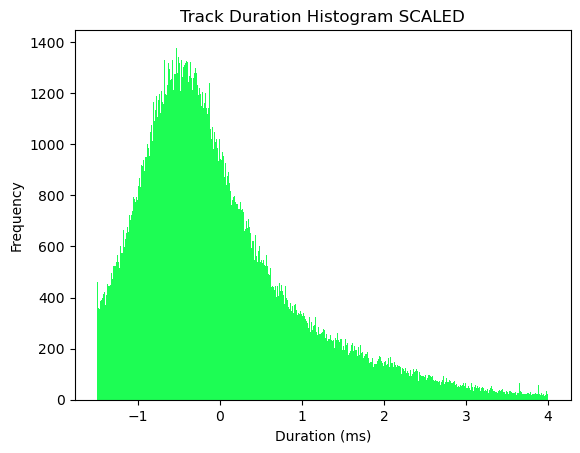

In [ ]:
# Check scaling.. SCALED
plt.hist(scaled_df20c_num['duration_ms'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Track Duration Histogram SCALED')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

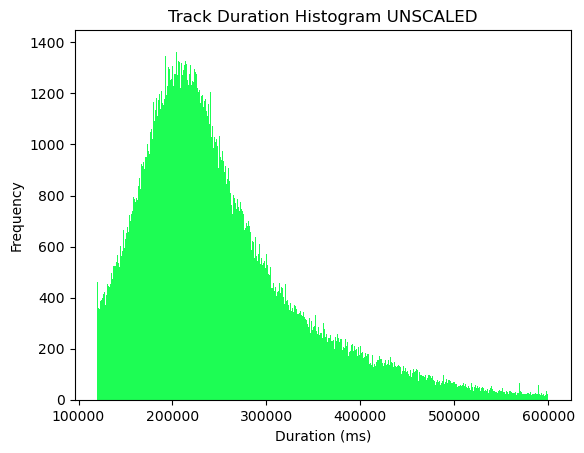

In [ ]:
# Check scaling.. UNSCALED
plt.hist(df20c['duration_ms'], bins=500, color='#1DFD54')  # edgecolor='black' - adjust edge color
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Track Duration Histogram UNSCALED')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [ ]:
scaled_df20c_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214956 entries, 0 to 214955
Columns: 286 entries, year to g_vocal trance
dtypes: float64(286)
memory usage: 469.0 MB


### 5. **Intitial Model Exploration**

#### PCA - Duration - London

In [ ]:
%%time

# PCA
from sklearn.decomposition import PCA

# Extract the first 2 principal components 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df20c_num.loc[lon_snd_index_samp])

KeyError: '[232781, 232782, 232783, 232784, 232785, 232786, 232787, 232788, 232789, 232790, 216773, 232791, 232792, 232793, 232794, 232795, 232796, 232797, 232798, 232799, 232800, 232801, 232802, 232803, 232804, 232805, 232806, 232807, 232808, 232809, 222626, 232810, 232811, 232812, 232813, 232814, 232815, 232816, 232817, 232818, 232819, 232820, 232821, 232822, 232823] not in index'

/opt/anaconda3/envs/b3ta/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



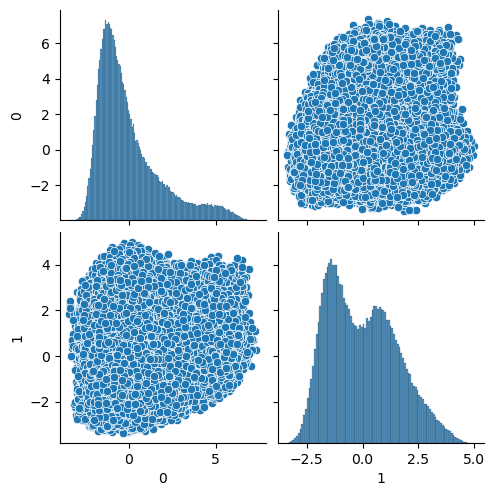

CPU times: user 1.64 s, sys: 311 ms, total: 1.95 s
Wall time: 2.4 s


In [ ]:
%%time

# Visualising 
sns.pairplot(pd.DataFrame(pca_data))
plt.show()

In [ ]:
scaled_df20c_num.loc[lon_snd_index_samp]
lon_snd_index_samp
man_snd_index_samp
bza_snd_index_samp
ber_snd_index_samp
kng_snd_index_samp
nyc_snd_index_samp
la_snd_index_samp
comb_snd_index_samp

KeyError: '[232781, 232782, 232783, 232784, 232785, 232786, 232787, 232788, 232789, 232790, 216773, 232791, 232792, 232793, 232794, 232795, 232796, 232797, 232798, 232799, 232800, 232801, 232802, 232803, 232804, 232805, 232806, 232807, 232808, 232809, 222626, 232810, 232811, 232812, 232813, 232814, 232815, 232816, 232817, 232818, 232819, 232820, 232821, 232822, 232823] not in index'

#### PCA.
- Visualising based on 2 PCAs.

In [ ]:
%%time

# PCA
from sklearn.decomposition import PCA

# Extract the first 2 principal components 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df20c_num)

CPU times: user 2min 26s, sys: 13.7 s, total: 2min 40s
Wall time: 3min 32s


/opt/anaconda3/envs/b3ta/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



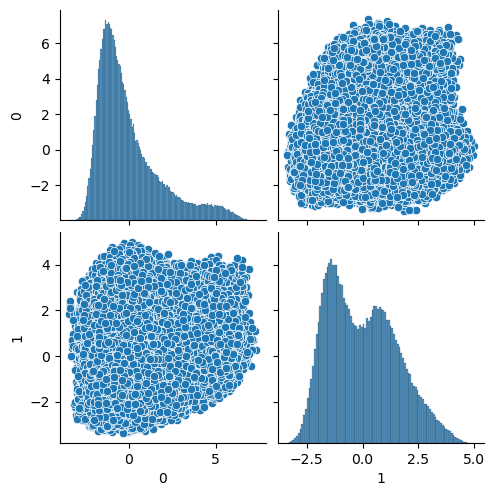

CPU times: user 2.08 s, sys: 244 ms, total: 2.33 s
Wall time: 2.36 s


In [ ]:
%%time

# Visualising 
sns.pairplot(pd.DataFrame(pca_data))
plt.show()

#### t-SNE.
- Visualising based on 2 PCAs.

In [ ]:
%%time

# t-SNE - 2 components
from sklearn.manifold import TSNE

# t-SNE is slow, so try running it on a small sample instead. 
sample = scaled_df20c_num.sample(frac=0.2, random_state=1)

# t-SNE is designed to work best with 2-3 components. 
# Using n_components > 3 will trigger an error which forces
# us to change the calculation method to brute force
tsne = TSNE(n_components=2, verbose=0, random_state=1)
tsne_data = tsne.fit_transform(sample)

In [ ]:
%%time

# Visualising 
sns.pairplot(pd.DataFrame(tsne_data))
plt.show()

In [ ]:
%%time

# t-SNE - 3 components

# t-SNE is slow, so try running it on a small sample instead. 
sample = scaled_df20c_num.sample(frac=0.2, random_state=1)

# t-SNE is designed to work best with 2-3 components. 
# Using n_components > 3 will trigger an error which forces
# us to change the calculation method to brute force
tsne = TSNE(n_components=3, verbose=5, random_state=1)
tsne_data = tsne.fit_transform(sample)

In [ ]:
%%time

# Visualising 
sns.pairplot(pd.DataFrame(tsne_data))
plt.show()

#### K-means.
- 

Inertia: The goal is to minimize inertia ie. the sum of squared distances of data points to their closest centroid

Silhouette: The goal is to maximize the silhouette score ie. compactness within clusters & separation between clusters.



In [ ]:
# Importing packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
%%time

# Fit K-means (+ loop through k values)

# Define values for k 
ks = np.arange(2, 11)

# Create empty lists to save inertia and silhouette scores 
inertia = []
silhouette_scores_kmeans = []

# Loop through different values of k 
for k in ks: 
    
    # Instantiate 
    my_kmeans = KMeans(n_clusters = k)

    # Fit (+ get y labels)
    y_labels = my_kmeans.fit_predict(scaled_df20c_num)

    # Append inertia 
    inertia.append(my_kmeans.inertia_)

    # Append silhouette
    silhouette = silhouette_score(scaled_df20c_num, y_labels)
    silhouette_scores_kmeans.append(silhouette)

    # Update progress 
    print(f'Computed score for k={k}')

In [ ]:
# Visualise inertia (elbow method) 
plt.figure()
plt.plot(ks, inertia, marker='o')
plt.xlabel('K - number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# Visualise silhouette scores
plt.figure()
plt.plot(ks, silhouette_scores_kmeans, marker='o')
plt.xlabel('K - number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(ks)
plt.show()

In [ ]:
# Fit final model
kmeans = KMeans(n_clusters=2)
kmeans_y_labels = kmeans.fit_predict(scaled_df20c_num)

# Add labels so that we can color different clusters 
cc_df_kmeans = scaled_df20c_num.copy()
cc_df_kmeans['kmeans_labels'] = kmeans_y_labels

In [ ]:
# Define function to create t-sne visualisation of clustered data

def tsne_visualise(result_df): 

    # Extract clustering column name
    column_names = result_df.columns
    label_column = column_names[column_names.str.contains('_labels')][0]

    # Take a smaller sample to decrease computational complexity
    sample = result_df.sample(frac=0.4, random_state=1)

    # Extract t-SNE
    tsne = TSNE(n_components=3, verbose=0, random_state=1)

    # We need to drop the labels so tSNE won't use them when computing distances
    tsne_data = tsne.fit_transform(sample.drop(label_column, axis=1)) 

    # Put everything in a dataframe
    tsne_df = pd.DataFrame(tsne_data, columns=[f'tSNE D{i+1}' for i in range(tsne_data.shape[1])])
    tsne_df[label_column] = sample[label_column].values.astype(str) 

    # Visualise 
    sns.pairplot(tsne_df, hue=label_column, plot_kws={'alpha': 0.5}) 
    plt.show()

In [ ]:
# Visualise results
tsne_visualise(cc_df_kmeans)

In [ ]:
scaled_df20c_num.shape

(213219, 85)

In [ ]:
df20c_num.shape

(213219, 85)

In [ ]:
df20c.shape

(213219, 89)

In [ ]:
df20c_labels.shape

(213219, 4)

In [ ]:
## //nb - Reverse Scaling (most transformers have an inverse method to undo centers)
#scaler.inverse_transform()

## //nb - Combined fitting and transformation - ONLY USE ON TRAINING DATA!!
#scaler.fit_transform()

### ***SUMMARY OF WORK TO DATE...***
***Main DataFrames***
- df (old)
- dfc
- dfc_num
- dfc_labels
- scaled_dfc_num

## //nb - Reverse Scaling (most transformers have an inverse method to undo centers)
scaler.inverse_transform()

## //nb - Combined fitting and transformation - ONLY USE ON TRAINING DATA!!
scaler.fit_transform()

## ***APPENDIX***

In [ ]:
genre_counts = df['genre'].value_counts()

# Convert NumPy array to dictionary
genre_counts = dict(genre_counts)

# Create lists for genre labels and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='#1DFD54')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Counts of Genres')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

genre_counts = df['genre'].value_counts()

# Convert NumPy array to dictionary
genre_counts = dict(genre_counts)

# Create lists for genre labels and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres, counts, color='#1DFD54')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Counts of Genres')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Key. (just df20 from hereon again)

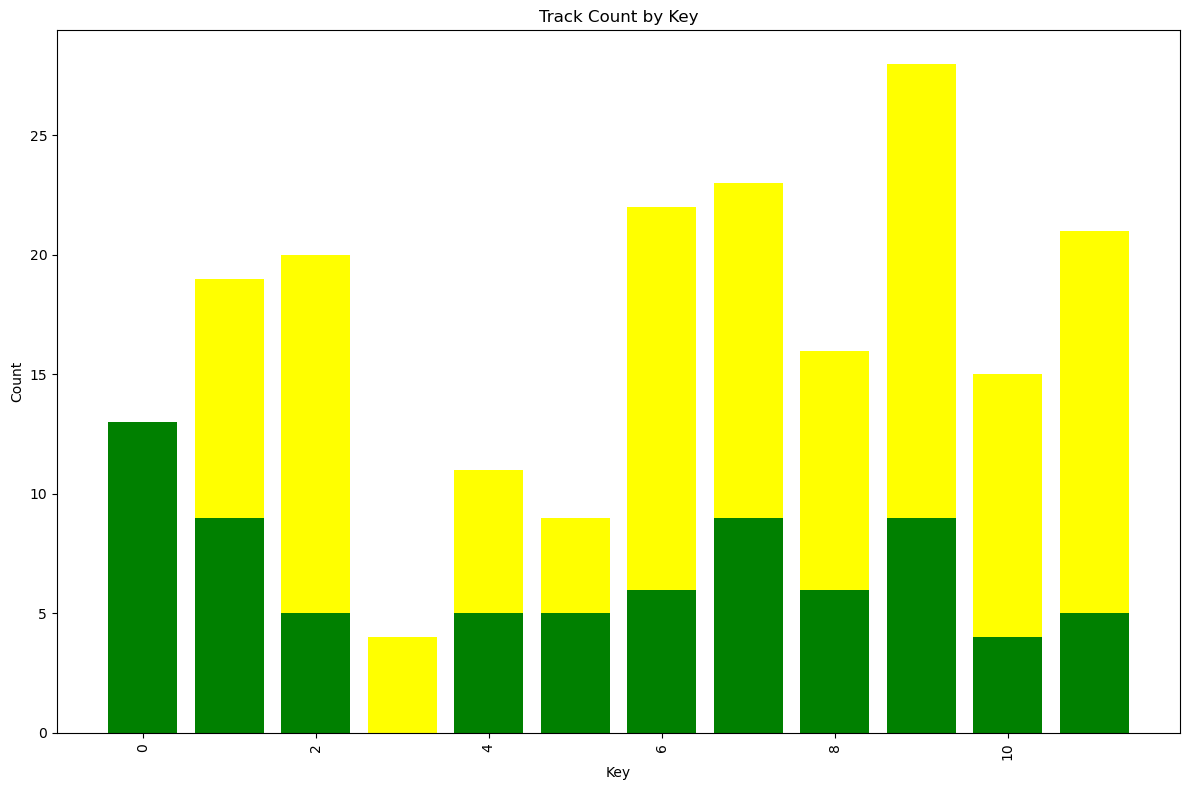

In [ ]:
key_counts_ldn = london_snd['key'].value_counts()
key_counts_ber = berlin_snd['key'].value_counts()
key_counts_kng = kingston_snd['key'].value_counts()


# Convert NumPy array to dictionary
key_counts_ldn = dict(key_counts_ldn)
key_counts_ber = dict(key_counts_ber)
key_counts_kng = dict(key_counts_kng)

# Create lists for genre labels and counts
keys_ldn = list(key_counts_ldn.keys())
counts_ldn = list(key_counts_ldn.values())

keys_ber = list(key_counts_ber.keys())
counts_ber = list(key_counts_ber.values())

keys_kng = list(key_counts_kng.keys())
counts_kng = list(key_counts_kng.values())


# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(keys_ldn, counts_ldn, color='blue')
plt.bar(keys_ber, counts_ber, color='yellow')
plt.bar(keys_kng, counts_kng, color='green')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Track Count by Key')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

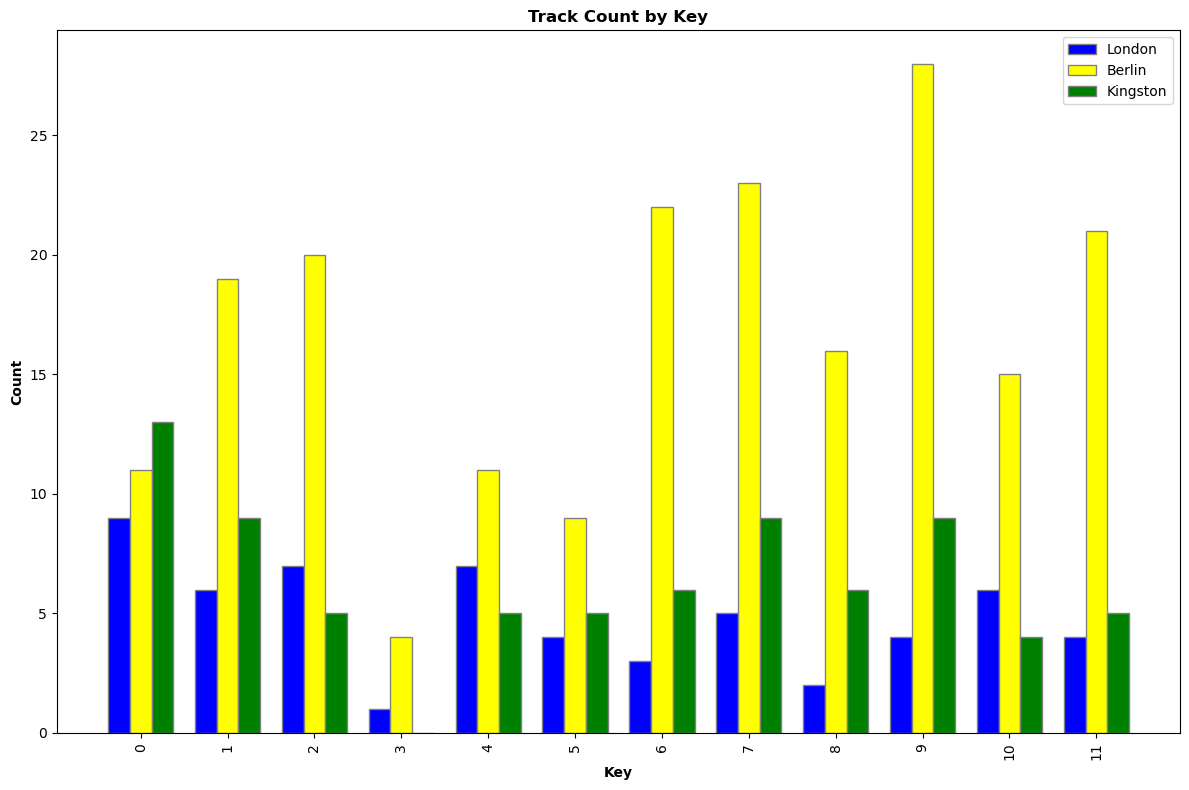

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have key counts for London, Berlin, and Kingston stored in key_counts_ldn, key_counts_ber, and key_counts_kng

# Convert NumPy array to dictionary
key_counts_ldn = dict(key_counts_ldn)
key_counts_ber = dict(key_counts_ber)
key_counts_kng = dict(key_counts_kng)

# Get unique keys from all dictionaries
all_keys = set(key_counts_ldn.keys()) | set(key_counts_ber.keys()) | set(key_counts_kng.keys())

# Create lists for genre labels and counts
keys_ldn = [key_counts_ldn.get(key, 0) for key in all_keys]
keys_ber = [key_counts_ber.get(key, 0) for key in all_keys]
keys_kng = [key_counts_kng.get(key, 0) for key in all_keys]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(all_keys))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(r1, keys_ldn, color='blue', width=bar_width, edgecolor='grey', label='London')
plt.bar(r2, keys_ber, color='yellow', width=bar_width, edgecolor='grey', label='Berlin')
plt.bar(r3, keys_kng, color='green', width=bar_width, edgecolor='grey', label='Kingston')

# Add xticks on the middle of the group bars
plt.xlabel('Key', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(all_keys))], all_keys, rotation=90)

# Add y label and title
plt.ylabel('Count', fontweight='bold')
plt.title('Track Count by Key', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()


#### Update sound profiles - old

In [ ]:
# Reset index - df
df.reset_index(drop=True, inplace=True)
# Reset index - df20
df20.reset_index(drop=True, inplace=True)

df.index

df20.index

In [139]:
# Redefine indices of sound profiles - df

# London
lon_snd_index = []
for i in range(len(list(london_snd['track_id']))):
    lon_snd_index.append(df[df["track_id"] == list(london_snd['track_id'])[i]].index[0])
len(lon_snd_index)

# Manchester
man_snd_index = []
for i in range(len(list(manchester_snd['track_id']))):
    man_snd_index.append(df[df["track_id"] == list(manchester_snd['track_id'])[i]].index[0])
len(man_snd_index)

# Ibiza
bza_snd_index = []
for i in range(len(list(ibiza_snd['track_id']))):
    bza_snd_index.append(df[df["track_id"] == list(ibiza_snd['track_id'])[i]].index[0])
len(bza_snd_index)

# Berlin
ber_snd_index = []
for i in range(len(list(berlin_snd['track_id']))):
    ber_snd_index.append(df[df["track_id"] == list(berlin_snd['track_id'])[i]].index[0])
len(ber_snd_index)

# Kingston
kng_snd_index = []
for i in range(len(list(kingston_snd['track_id']))):
    kng_snd_index.append(df[df["track_id"] == list(kingston_snd['track_id'])[i]].index[0])
len(kng_snd_index)

# NYC
nyc_snd_index = []
for i in range(len(list(nyc_snd['track_id']))):
    nyc_snd_index.append(df[df["track_id"] == list(nyc_snd['track_id'])[i]].index[0])
len(nyc_snd_index)

# LA
la_snd_index = []
for i in range(len(list(la_snd['track_id']))):
    la_snd_index.append(df[df["track_id"] == list(la_snd['track_id'])[i]].index[0])
len(la_snd_index)

# Combined sound profile indices
comb_snd_index = lon_snd_index + man_snd_index + bza_snd_index + ber_snd_index + kng_snd_index + nyc_snd_index + la_snd_index


In [151]:
df20[df20["track_id"] == list(london_snd_samp['track_id'])[0]].index[0]

232781

In [154]:
len(list(london_snd_samp['track_id']))

60

In [157]:
df20[df20["track_id"] == list(london_snd_samp['track_id'])[0]].index[0]

232781

In [159]:
df20[df20["track_id"] == list(london_snd_samp['track_id'])[0]].index[0]

232781

In [152]:
# Redefine indices of sound profiles - df20

# London
lon_snd_index_samp = []
for i in range(len(list(london_snd_samp['track_id']))):
    lon_snd_index_samp.append(df20[df20["track_id"] == list(london_snd_samp['track_id'])[i]].index[0])
len(lon_snd_index_samp)

# Manchester
man_snd_index_samp = []
for i in range(len(list(manchester_snd_samp['track_id']))):
    man_snd_index_samp.append(df20[df20["track_id"] == list(manchester_snd_samp['track_id'])[i]].index[0])
len(man_snd_index_samp)

# Ibiza
bza_snd_index_samp = []
for i in range(len(list(ibiza_snd_samp['track_id']))):
    bza_snd_index_samp.append(df20[df20["track_id"] == list(ibiza_snd_samp['track_id'])[i]].index[0])
len(bza_snd_index_samp)

# Berlin
ber_snd_index_samp = []
for i in range(len(list(berlin_snd_samp['track_id']))):
    ber_snd_index_samp.append(df20[df20["track_id"] == list(berlin_snd_samp['track_id'])[i]].index[0])
len(ber_snd_index_samp)

# Kingston
kng_snd_index_samp = []
for i in range(len(list(kingston_snd_samp['track_id']))):
    kng_snd_index_samp.append(df20[df20["track_id"] == list(kingston_snd_samp['track_id'])[i]].index[0])
len(kng_snd_index_samp)

# NYC
nyc_snd_index_samp = []
for i in range(len(list(nyc_snd_samp['track_id']))):
    nyc_snd_index_samp.append(df20[df20["track_id"] == list(nyc_snd_samp['track_id'])[i]].index[0])
len(nyc_snd_index_samp)

# LA
la_snd_index_samp = []
for i in range(len(list(la_snd_samp['track_id']))):
    la_snd_index_samp.append(df20[df20["track_id"] == list(la_snd_samp['track_id'])[i]].index[0])
len(la_snd_index_samp)

# Combined sound profile indices
comb_snd_index_samp = lon_snd_index_samp + man_snd_index_samp + bza_snd_index_samp + ber_snd_index_samp + kng_snd_index_samp + nyc_snd_index_samp + la_snd_index_samp


IndexError: index 0 is out of bounds for axis 0 with size 0

In [156]:
# df
print(len(lon_snd_index))
print(len(man_snd_index))
print(len(bza_snd_index))
print(len(ber_snd_index))
print(len(kng_snd_index))
print(len(nyc_snd_index))
print(len(la_snd_index))
print(len(comb_snd_index))
print("")
# df20
print(len(lon_snd_index_samp))
print(len(man_snd_index_samp))
print(len(bza_snd_index_samp))
print(len(ber_snd_index_samp))
print(len(kng_snd_index_samp))
print(len(nyc_snd_index_samp))
print(len(la_snd_index_samp))
print(len(comb_snd_index_samp))

58
50
432
199
76
50
65
930

58
50
432
199
76
50
65
930


In [ ]:
# Recreate dfs - df
london_snd = df.loc[lon_snd_index]
manchester_snd = df.loc[man_snd_index]
ibiza_snd = df.loc[bza_snd_index]
berlin_snd = df.loc[ber_snd_index]
kingston_snd = df.loc[kng_snd_index]
nyc_snd = df.loc[nyc_snd_index]
la_snd = df.loc[la_snd_index]
combined_snd = df.loc[comb_snd_index]
# Recreate dfs - df20
london_snd_samp = df.loc[lon_snd_index_samp]
manchester_snd_samp = df.loc[man_snd_index_samp]
ibiza_snd_samp = df.loc[bza_snd_index_samp]
berlin_snd_samp = df.loc[ber_snd_index_samp]
kingston_snd_samp = df.loc[kng_snd_index_samp]
nyc_snd_samp = df.loc[nyc_snd_index_samp]
la_snd_samp = df.loc[la_snd_index_samp]
combined_snd_samp = df.loc[comb_snd_index_samp]

In [ ]:
# Checks - df
print(len(london_snd))
print(len(manchester_snd))
print(len(ibiza_snd))
print(len(berlin_snd))
print(len(kingston_snd))
print(len(nyc_snd))
print(len(la_snd))
print(len(combined_snd))
print("")
# Checks - df20
print(len(london_snd_samp))
print(len(manchester_snd_samp))
print(len(ibiza_snd_samp))
print(len(berlin_snd_samp))
print(len(kingston_snd_samp))
print(len(nyc_snd_samp))
print(len(la_snd_samp))
print(len(combined_snd_samp))

58
50
432
199
76
50
65
930

58
50
432
199
76
50
65
930


In [ ]:
# Update sound